In [2]:
# use read_csv() function to read CSV file and print the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('cs-training.csv')

print(df.head())

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

In [3]:
#fill all null value and show the dataset
df=df.fillna(df.mean())
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [4]:
#show the null situation
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [5]:
#Divide the dataset to X(independent variable) and Y(dependent variable)
X, y = df.iloc[:, 2:], df.iloc[:, 1]
X
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [6]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
#print the results of split
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [139974  10026]
Labels count in y_train: [97982  7018]
Labels count in y_test: [41992  3008]


In [8]:
#scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[-0.02782243,  0.45906608, -0.10024738, ...,  0.86736852,
        -0.05763368,  0.22112617],
       [-0.02814975,  1.47494017, -0.10024738, ..., -0.01448764,
        -0.05763368, -0.68833319],
       [-0.02516044, -1.23405739, -0.10024738, ..., -0.89634379,
        -0.05763368, -0.68833319],
       ...,
       [-0.02797411, -0.556808  , -0.10024738, ..., -0.01448764,
        -0.05763368,  1.13058553],
       [-0.02642016, -0.28590825, -0.10024738, ..., -0.89634379,
        -0.05763368,  1.13058553],
       [-0.02769648, -0.35363319, -0.10024738, ..., -0.89634379,
        -0.05763368, -0.68833319]])

In [9]:
#creat PCA projecct and get the explained_variance_ratio
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.299508  , 0.15298528, 0.12264522, 0.10135793, 0.09955797,
       0.09372894, 0.07353648, 0.05430048, 0.00170546, 0.00067425])

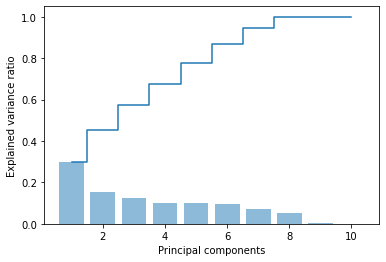

In [10]:
#plot the picture of explained variance ratio
import matplotlib.pyplot as plt

plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

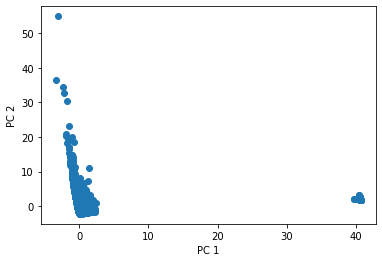

In [11]:
#choose 3 features and plot the scatter
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [12]:
#define plot_decision_regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [13]:
###

from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7392\3884330389.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


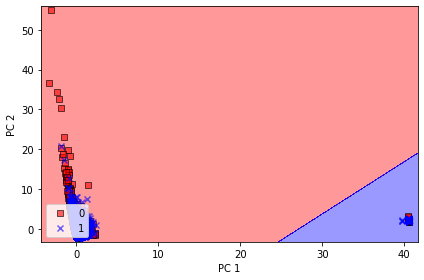

In [14]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7392\3884330389.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


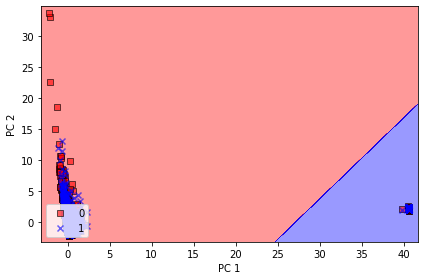

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train_std, y_train)
y_pred = pipe_lr.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_std, y_test))

Test Accuracy: 0.933


In [17]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=5,shuffle=True,
                        random_state=1).split(X_train_std, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train_std[train], y_train[train])
    score = pipe_lr.score(X_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
        np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


KeyError: '[1, 6, 8, 10, 18, 21, 30, 31, 37, 39, 41, 45, 46, 47, 50, 53, 60, 61, 65, 74, 79, 81, 86, 87, 89, 93, 97, 119, 129, 130, 134, 135, 137, 140, 145, 148, 152, 153, 163, 165, 170, 171, 174, 178, 179, 186, 188, 191, 203, 207, 220, 224, 228, 231, 232, 239, 243, 244, 249, 255, 260, 264, 266, 282, 283, 288, 293, 294, 302, 304, 314, 315, 316, 334, 337, 341, 342, 345, 347, 358, 359, 360, 363, 370, 374, 377, 382, 384, 386, 394, 395, 398, 403, 413, 418, 422, 426, 430, 447, 450, 451, 457, 458, 467, 468, 469, 471, 473, 476, 481, 486, 487, 492, 494, 495, 499, 503, 509, 515, 516, 518, 519, 521, 525, 527, 532, 536, 550, 553, 555, 556, 557, 559, 561, 562, 566, 567, 572, 594, 595, 597, 598, 599, 600, 605, 606, 607, 611, 613, 616, 618, 619, 620, 622, 626, 628, 629, 630, 640, 643, 645, 651, 671, 674, 675, 677, 681, 686, 690, 691, 695, 698, 699, 711, 713, 716, 730, 731, 732, 736, 740, 750, 758, 768, 776, 777, 778, 782, 784, 789, 800, 804, 808, 811, 827, 828, 831, 834, 844, 846, 848, 851, 853, 855, 863, 865, 869, 872, 873, 875, 885, 888, 897, 905, 906, 908, 915, 918, 920, 926, 930, 933, 939, 944, 955, 959, 962, 977, 981, 987, 988, 994, 998, 1008, 1009, 1012, 1015, 1016, 1018, 1020, 1024, 1030, 1037, 1041, 1042, 1047, 1049, 1051, 1054, 1056, 1059, 1063, 1066, 1068, 1075, 1076, 1078, 1079, 1089, 1090, 1091, 1099, 1104, 1106, 1107, 1109, 1111, 1112, 1119, 1120, 1121, 1123, 1127, 1130, 1137, 1143, 1144, 1149, 1154, 1158, 1161, 1167, 1168, 1173, 1176, 1179, 1183, 1188, 1190, 1194, 1204, 1207, 1208, 1209, 1211, 1217, 1218, 1240, 1241, 1245, 1256, 1271, 1273, 1274, 1278, 1280, 1281, 1282, 1283, 1284, 1286, 1312, 1319, 1326, 1329, 1331, 1346, 1350, 1351, 1354, 1360, 1361, 1366, 1368, 1376, 1384, 1388, 1391, 1395, 1399, 1405, 1409, 1414, 1415, 1427, 1428, 1429, 1431, 1432, 1438, 1441, 1443, 1445, 1448, 1449, 1454, 1456, 1458, 1462, 1464, 1473, 1476, 1480, 1485, 1486, 1499, 1502, 1509, 1518, 1524, 1527, 1530, 1534, 1536, 1537, 1538, 1541, 1543, 1544, 1546, 1551, 1553, 1560, 1567, 1577, 1583, 1587, 1594, 1595, 1600, 1616, 1618, 1619, 1620, 1621, 1624, 1625, 1628, 1629, 1642, 1646, 1650, 1671, 1680, 1682, 1684, 1687, 1703, 1709, 1719, 1724, 1731, 1735, 1737, 1738, 1742, 1743, 1744, 1745, 1747, 1750, 1754, 1755, 1762, 1764, 1765, 1766, 1768, 1770, 1771, 1774, 1776, 1778, 1779, 1782, 1784, 1789, 1790, 1795, 1796, 1802, 1803, 1808, 1811, 1814, 1817, 1819, 1823, 1824, 1829, 1832, 1837, 1838, 1839, 1844, 1847, 1849, 1859, 1861, 1867, 1871, 1874, 1875, 1877, 1878, 1883, 1884, 1887, 1888, 1899, 1904, 1907, 1908, 1926, 1936, 1939, 1943, 1960, 1966, 1972, 1978, 1980, 1988, 1989, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 2000, 2001, 2009, 2011, 2018, 2028, 2039, 2046, 2050, 2054, 2055, 2057, 2065, 2067, 2072, 2075, 2076, 2087, 2093, 2100, 2107, 2109, 2131, 2137, 2138, 2141, 2142, 2144, 2147, 2161, 2169, 2175, 2180, 2181, 2184, 2189, 2195, 2201, 2203, 2206, 2209, 2213, 2214, 2218, 2232, 2240, 2243, 2246, 2253, 2257, 2265, 2274, 2276, 2280, 2281, 2287, 2291, 2292, 2293, 2297, 2302, 2303, 2307, 2309, 2310, 2312, 2317, 2318, 2319, 2324, 2325, 2333, 2334, 2335, 2338, 2340, 2341, 2347, 2348, 2356, 2358, 2359, 2374, 2378, 2382, 2391, 2396, 2401, 2405, 2410, 2414, 2420, 2422, 2423, 2427, 2429, 2432, 2435, 2440, 2441, 2444, 2446, 2447, 2449, 2455, 2456, 2460, 2461, 2468, 2474, 2480, 2481, 2484, 2486, 2495, 2506, 2515, 2517, 2519, 2520, 2521, 2523, 2526, 2528, 2530, 2531, 2533, 2538, 2541, 2542, 2544, 2545, 2550, 2552, 2555, 2556, 2559, 2574, 2583, 2590, 2595, 2606, 2611, 2613, 2616, 2618, 2622, 2627, 2644, 2645, 2650, 2652, 2655, 2656, 2657, 2659, 2661, 2662, 2666, 2667, 2668, 2670, 2678, 2689, 2691, 2694, 2701, 2703, 2719, 2720, 2723, 2727, 2748, 2754, 2757, 2759, 2762, 2763, 2764, 2765, 2771, 2779, 2783, 2784, 2788, 2797, 2808, 2809, 2816, 2817, 2822, 2827, 2832, 2836, 2837, 2845, 2846, 2848, 2850, 2855, 2857, 2860, 2868, 2869, 2871, 2877, 2879, 2881, 2887, 2903, 2907, 2908, 2914, 2915, 2921, 2924, 2928, 2933, 2942, 2943, 2944, 2956, 2960, 2963, 2965, 2972, 2973, 2976, 2983, 2985, 2991, 2995, 2999, 3001, 3006, 3007, 3008, 3010, 3017, 3024, 3027, 3031, 3036, 3038, 3042, 3048, 3052, 3054, 3055, 3058, 3067, 3074, 3081, 3086, 3092, 3096, 3099, 3101, 3103, 3110, 3114, 3123, 3126, 3127, 3128, 3129, 3131, 3140, 3141, 3142, 3143, 3149, 3155, 3165, 3168, 3169, 3173, 3174, 3180, 3182, 3186, 3187, 3191, 3197, 3204, 3206, 3211, 3215, 3218, 3223, 3224, 3231, 3236, 3240, 3242, 3243, 3246, 3248, 3259, 3266, 3269, 3285, 3289, 3293, 3294, 3297, 3300, 3304, 3307, 3308, 3310, 3315, 3318, 3322, 3327, 3330, 3333, 3336, 3338, 3339, 3344, 3346, 3347, 3365, 3366, 3370, 3371, 3378, 3381, 3382, 3387, 3391, 3405, 3408, 3412, 3414, 3419, 3423, 3428, 3429, 3432, 3436, 3438, 3440, 3447, 3452, 3464, 3466, 3468, 3470, 3473, 3500, 3537, 3539, 3547, 3551, 3557, 3563, 3565, 3571, 3577, 3579, 3581, 3584, 3594, 3596, 3599, 3601, 3603, 3604, 3607, 3613, 3618, 3620, 3621, 3622, 3628, 3629, 3633, 3634, 3636, 3637, 3639, 3650, 3654, 3656, 3661, 3667, 3668, 3669, 3670, 3672, 3680, 3682, 3683, 3686, 3691, 3692, 3695, 3701, 3709, 3710, 3723, 3725, 3730, 3733, 3740, 3742, 3746, 3749, 3753, 3761, 3762, 3766, 3767, 3772, 3773, 3780, 3781, 3782, 3786, 3788, 3789, 3798, 3803, 3807, 3809, 3810, 3815, 3816, 3821, 3824, 3831, 3834, 3835, 3836, 3837, 3838, 3842, 3844, 3848, 3849, 3852, 3853, 3868, 3871, 3876, 3884, 3886, 3892, 3894, 3899, 3907, 3908, 3915, 3919, 3920, 3925, 3929, 3951, 3954, 3957, 3960, 3970, 3975, 3976, 3980, 3987, 3988, 3989, 3997, 4008, 4011, 4013, 4017, 4019, 4021, 4029, 4032, 4034, 4043, 4047, 4052, 4061, 4063, 4071, 4074, 4075, 4082, 4084, 4088, 4093, 4108, 4113, 4115, 4119, 4120, 4121, 4123, 4128, 4137, 4138, 4143, 4147, 4149, 4156, 4157, 4163, 4165, 4176, 4188, 4193, 4195, 4198, 4207, 4211, 4212, 4219, 4220, 4221, 4223, 4239, 4241, 4242, 4243, 4246, 4251, 4259, 4264, 4269, 4272, 4278, 4279, 4281, 4284, 4287, 4293, 4303, 4311, 4313, 4315, 4316, 4319, 4325, 4326, 4331, 4333, 4334, 4335, 4343, 4345, 4348, 4354, 4355, 4357, 4365, 4371, 4372, 4374, 4378, 4383, 4387, 4393, 4396, 4397, 4399, 4404, 4407, 4412, 4418, 4424, 4454, 4458, 4461, 4465, 4472, 4473, 4481, 4492, 4493, 4497, 4512, 4514, 4520, 4522, 4526, 4533, 4543, 4549, 4552, 4559, 4561, 4562, 4565, 4567, 4569, 4580, 4581, 4589, 4591, 4592, 4594, 4598, 4604, 4607, 4610, 4611, 4614, 4622, 4624, 4626, 4627, 4628, 4629, 4631, 4632, 4638, 4646, 4648, 4651, 4655, 4658, 4666, 4690, 4692, 4693, 4701, 4706, 4713, 4715, 4717, 4724, 4725, 4726, 4732, 4734, 4735, 4738, 4740, 4741, 4749, 4758, 4761, 4769, 4770, 4772, 4775, 4782, 4789, 4795, 4806, 4813, 4815, 4822, 4824, 4828, 4830, 4831, 4834, 4839, 4842, 4843, 4845, 4847, 4850, 4854, 4857, 4859, 4863, 4865, 4872, 4890, 4891, 4897, 4899, 4900, 4903, 4907, 4909, 4914, 4917, 4925, 4928, 4930, 4932, 4933, 4935, 4936, 4937, 4938, 4958, 4961, 4962, 4965, 4966, 4967, 4969, 4973, 4976, 4978, 4980, 4983, 4991, 4998, 5011, 5013, 5015, 5025, 5027, 5031, 5037, 5050, 5051, 5057, 5067, 5078, 5084, 5085, 5086, 5087, 5091, 5102, 5104, 5107, 5113, 5125, 5128, 5129, 5134, 5144, 5147, 5152, 5154, 5158, 5162, 5163, 5164, 5166, 5173, 5175, 5176, 5180, 5181, 5186, 5189, 5197, 5201, 5203, 5206, 5208, 5209, 5213, 5218, 5222, 5227, 5233, 5234, 5240, 5241, 5245, 5258, 5261, 5262, 5272, 5273, 5275, 5299, 5304, 5305, 5311, 5313, 5316, 5321, 5324, 5331, 5332, 5342, 5361, 5374, 5386, 5388, 5390, 5394, 5401, 5404, 5405, 5407, 5420, 5422, 5423, 5431, 5436, 5442, 5444, 5446, 5448, 5450, 5454, 5457, 5458, 5461, 5488, 5489, 5502, 5507, 5508, 5509, 5512, 5516, 5518, 5521, 5522, 5529, 5532, 5534, 5540, 5549, 5550, 5556, 5557, 5566, 5571, 5576, 5578, 5580, 5585, 5590, 5591, 5593, 5594, 5597, 5599, 5600, 5602, 5604, 5605, 5612, 5614, 5616, 5620, 5622, 5625, 5630, 5631, 5644, 5651, 5652, 5656, 5657, 5660, 5669, 5672, 5679, 5684, 5688, 5689, 5692, 5694, 5695, 5700, 5703, 5707, 5711, 5719, 5728, 5733, 5735, 5740, 5750, 5756, 5757, 5759, 5763, 5764, 5769, 5774, 5779, 5783, 5788, 5790, 5791, 5795, 5797, 5799, 5801, 5807, 5816, 5822, 5826, 5827, 5829, 5841, 5850, 5854, 5858, 5861, 5864, 5871, 5872, 5894, 5896, 5898, 5905, 5907, 5922, 5933, 5935, 5936, 5944, 5954, 5959, 5963, 5969, 5971, 5979, 5980, 5987, 5988, 5995, 5997, 5999, 6000, 6004, 6005, 6008, 6013, 6032, 6037, 6043, 6051, 6053, 6057, 6059, 6060, 6074, 6078, 6080, 6085, 6089, 6095, 6096, 6097, 6100, 6102, 6104, 6108, 6114, 6120, 6128, 6129, 6130, 6132, 6140, 6147, 6148, 6152, 6153, 6157, 6160, 6163, 6164, 6167, 6171, 6180, 6188, 6189, 6190, 6192, 6193, 6194, 6198, 6207, 6212, 6217, 6221, 6223, 6224, 6240, 6244, 6252, 6258, 6259, 6263, 6264, 6271, 6280, 6281, 6290, 6291, 6297, 6298, 6299, 6300, 6304, 6308, 6309, 6311, 6318, 6320, 6323, 6325, 6328, 6338, 6343, 6345, 6347, 6349, 6358, 6364, 6377, 6381, 6383, 6385, 6391, 6397, 6398, 6402, 6403, 6404, 6409, 6418, 6420, 6425, 6427, 6433, 6434, 6438, 6439, 6451, 6452, 6453, 6462, 6463, 6477, 6479, 6486, 6487, 6489, 6494, 6499, 6503, 6504, 6516, 6518, 6522, 6524, 6546, 6560, 6567, 6569, 6571, 6577, 6578, 6580, 6583, 6584, 6596, 6598, 6600, 6601, 6604, 6608, 6617, 6621, 6626, 6627, 6628, 6632, 6634, 6637, 6641, 6647, 6648, 6651, 6666, 6667, 6670, 6684, 6694, 6698, 6719, 6728, 6737, 6743, 6751, 6758, 6762, 6764, 6766, 6770, 6771, 6774, 6777, 6778, 6785, 6792, 6796, 6814, 6819, 6824, 6829, 6831, 6839, 6845, 6846, 6850, 6852, 6859, 6861, 6862, 6876, 6877, 6885, 6890, 6892, 6895, 6900, 6901, 6905, 6911, 6913, 6915, 6918, 6926, 6931, 6933, 6936, 6937, 6938, 6940, 6943, 6945, 6947, 6950, 6957, 6971, 6972, 6974, 6981, 6982, 6983, 6984, 6989, 6993, 6995, 6996, 6997, 6999, 7002, 7007, 7008, 7009, 7011, 7013, 7015, 7016, 7017, 7019, 7026, 7027, 7032, 7034, 7040, 7041, 7042, 7044, 7045, 7050, 7052, 7054, 7058, 7059, 7060, 7062, 7069, 7070, 7071, 7075, 7078, 7079, 7085, 7086, 7088, 7089, 7091, 7092, 7094, 7095, 7098, 7100, 7101, 7103, 7109, 7111, 7115, 7118, 7124, 7126, 7127, 7130, 7131, 7132, 7141, 7142, 7145, 7154, 7167, 7170, 7171, 7174, 7175, 7176, 7179, 7180, 7189, 7195, 7201, 7209, 7215, 7218, 7225, 7227, 7229, 7230, 7233, 7241, 7247, 7248, 7250, 7252, 7253, 7255, 7256, 7259, 7266, 7269, 7270, 7271, 7275, 7276, 7278, 7279, 7284, 7287, 7297, 7304, 7306, 7311, 7317, 7323, 7330, 7331, 7341, 7343, 7346, 7350, 7351, 7355, 7363, 7373, 7376, 7379, 7385, 7387, 7389, 7391, 7401, 7405, 7409, 7411, 7415, 7419, 7431, 7434, 7438, 7440, 7454, 7460, 7461, 7465, 7475, 7477, 7480, 7482, 7483, 7492, 7493, 7498, 7502, 7503, 7511, 7513, 7516, 7521, 7526, 7533, 7536, 7543, 7545, 7548, 7549, 7552, 7553, 7554, 7556, 7563, 7564, 7566, 7568, 7571, 7572, 7573, 7575, 7577, 7582, 7587, 7592, 7596, 7605, 7609, 7612, 7621, 7623, 7625, 7637, 7640, 7651, 7652, 7654, 7658, 7660, 7662, 7663, 7668, 7671, 7672, 7680, 7682, 7685, 7687, 7689, 7690, 7694, 7702, 7703, 7704, 7706, 7707, 7713, 7718, 7719, 7720, 7727, 7731, 7738, 7739, 7743, 7745, 7751, 7755, 7756, 7759, 7763, 7768, 7769, 7776, 7778, 7780, 7785, 7791, 7795, 7804, 7805, 7806, 7809, 7812, 7816, 7821, 7822, 7826, 7828, 7831, 7837, 7844, 7851, 7856, 7860, 7863, 7869, 7870, 7871, 7882, 7883, 7884, 7889, 7896, 7913, 7915, 7935, 7937, 7938, 7941, 7945, 7948, 7952, 7955, 7957, 7961, 7963, 7965, 7968, 7982, 7989, 7996, 8000, 8002, 8010, 8013, 8016, 8018, 8019, 8021, 8022, 8028, 8032, 8042, 8046, 8047, 8048, 8056, 8061, 8071, 8072, 8073, 8082, 8090, 8094, 8097, 8103, 8107, 8117, 8120, 8121, 8123, 8137, 8143, 8146, 8147, 8148, 8153, 8155, 8159, 8161, 8162, 8163, 8164, 8165, 8167, 8172, 8177, 8179, 8181, 8186, 8191, 8193, 8197, 8210, 8213, 8221, 8223, 8227, 8232, 8233, 8234, 8240, 8248, 8252, 8255, 8260, 8271, 8273, 8276, 8281, 8282, 8285, 8291, 8292, 8296, 8301, 8304, 8305, 8307, 8311, 8314, 8316, 8318, 8319, 8321, 8329, 8332, 8335, 8341, 8342, 8357, 8362, 8364, 8365, 8369, 8378, 8380, 8382, 8393, 8394, 8396, 8397, 8399, 8406, 8409, 8410, 8413, 8416, 8417, 8418, 8423, 8426, 8443, 8448, 8452, 8459, 8461, 8462, 8467, 8468, 8469, 8472, 8473, 8475, 8480, 8482, 8483, 8486, 8489, 8493, 8503, 8505, 8508, 8509, 8511, 8513, 8514, 8523, 8524, 8528, 8531, 8532, 8537, 8542, 8548, 8549, 8550, 8564, 8566, 8569, 8575, 8578, 8581, 8586, 8600, 8601, 8602, 8605, 8606, 8618, 8620, 8623, 8624, 8629, 8635, 8637, 8638, 8639, 8641, 8642, 8643, 8647, 8650, 8652, 8653, 8654, 8656, 8662, 8663, 8666, 8677, 8680, 8683, 8686, 8689, 8697, 8700, 8702, 8709, 8710, 8725, 8728, 8740, 8742, 8746, 8749, 8751, 8753, 8757, 8762, 8767, 8775, 8776, 8780, 8787, 8809, 8814, 8816, 8820, 8830, 8834, 8838, 8840, 8843, 8849, 8860, 8862, 8867, 8871, 8888, 8891, 8892, 8894, 8897, 8900, 8904, 8909, 8911, 8915, 8918, 8927, 8932, 8935, 8940, 8950, 8953, 8959, 8965, 8967, 8969, 8970, 8977, 8981, 8988, 8989, 8990, 8997, 9000, 9005, 9010, 9014, 9018, 9019, 9023, 9028, 9036, 9037, 9042, 9050, 9051, 9055, 9059, 9067, 9068, 9071, 9073, 9074, 9083, 9086, 9088, 9092, 9099, 9100, 9102, 9104, 9110, 9119, 9122, 9126, 9129, 9134, 9142, 9143, 9146, 9153, 9156, 9164, 9165, 9172, 9179, 9181, 9182, 9186, 9192, 9197, 9203, 9208, 9209, 9210, 9211, 9212, 9219, 9223, 9234, 9236, 9238, 9240, 9242, 9252, 9273, 9274, 9276, 9280, 9289, 9291, 9297, 9309, 9319, 9323, 9328, 9330, 9331, 9334, 9335, 9338, 9339, 9340, 9348, 9351, 9354, 9365, 9366, 9369, 9371, 9374, 9377, 9378, 9379, 9384, 9386, 9390, 9395, 9400, 9403, 9407, 9414, 9415, 9419, 9420, 9422, 9425, 9427, 9431, 9434, 9438, 9441, 9446, 9449, 9453, 9457, 9458, 9461, 9471, 9472, 9481, 9482, 9486, 9488, 9489, 9490, 9496, 9503, 9504, 9507, 9510, 9512, 9518, 9519, 9522, 9526, 9529, 9533, 9536, 9539, 9547, 9548, 9549, 9568, 9570, 9571, 9574, 9579, 9582, 9585, 9586, 9587, 9596, 9598, 9599, 9610, 9612, 9624, 9626, 9631, 9634, 9636, 9637, 9639, 9644, 9650, 9652, 9657, 9659, 9666, 9668, 9679, 9682, 9684, 9686, 9702, 9717, 9723, 9724, 9726, 9727, 9728, 9730, 9732, 9734, 9735, 9736, 9746, 9750, 9760, 9761, 9763, 9768, 9772, 9774, 9775, 9776, 9777, 9781, 9788, 9789, 9790, 9801, 9805, 9825, 9827, 9831, 9837, 9847, 9848, 9850, 9852, 9853, 9858, 9863, 9866, 9870, 9872, 9873, 9874, 9877, 9880, 9882, 9884, 9888, 9889, 9893, 9895, 9900, 9901, 9905, 9908, 9912, 9939, 9941, 9945, 9950, 9951, 9963, 9964, 9971, 9977, 9979, 10002, 10003, 10005, 10016, 10021, 10027, 10028, 10031, 10032, 10034, 10041, 10044, 10056, 10061, 10063, 10066, 10067, 10068, 10069, 10070, 10075, 10079, 10083, 10087, 10089, 10093, 10095, 10099, 10100, 10104, 10108, 10113, 10115, 10117, 10123, 10124, 10125, 10143, 10145, 10147, 10151, 10154, 10157, 10166, 10167, 10172, 10175, 10176, 10178, 10183, 10189, 10193, 10195, 10198, 10215, 10217, 10220, 10227, 10229, 10230, 10231, 10234, 10245, 10246, 10251, 10254, 10257, 10265, 10266, 10267, 10270, 10272, 10273, 10279, 10282, 10286, 10300, 10304, 10307, 10310, 10317, 10319, 10320, 10321, 10331, 10332, 10337, 10339, 10341, 10343, 10345, 10346, 10351, 10352, 10353, 10356, 10357, 10362, 10366, 10373, 10383, 10387, 10392, 10393, 10394, 10397, 10398, 10405, 10409, 10413, 10415, 10416, 10418, 10428, 10434, 10435, 10440, 10453, 10455, 10456, 10462, 10466, 10467, 10470, 10472, 10480, 10481, 10482, 10483, 10484, 10485, 10488, 10492, 10495, 10499, 10505, 10512, 10513, 10517, 10520, 10522, 10523, 10525, 10526, 10533, 10534, 10538, 10543, 10548, 10553, 10555, 10557, 10559, 10564, 10570, 10578, 10579, 10583, 10584, 10594, 10601, 10606, 10607, 10613, 10620, 10625, 10634, 10635, 10648, 10658, 10659, 10666, 10668, 10682, 10684, 10688, 10689, 10693, 10700, 10713, 10716, 10721, 10723, 10724, 10725, 10735, 10740, 10744, 10752, 10761, 10763, 10765, 10766, 10768, 10775, 10776, 10781, 10790, 10793, 10801, 10813, 10816, 10820, 10835, 10839, 10840, 10841, 10849, 10850, 10851, 10852, 10856, 10857, 10859, 10860, 10861, 10864, 10865, 10875, 10876, 10878, 10888, 10891, 10900, 10901, 10903, 10907, 10909, 10914, 10924, 10930, 10931, 10932, 10940, 10942, 10946, 10947, 10964, 10968, 10985, 10991, 10997, 10999, 11003, 11005, 11011, 11012, 11015, 11017, 11020, 11026, 11032, 11033, 11037, 11040, 11047, 11050, 11052, 11054, 11058, 11059, 11063, 11066, 11075, 11081, 11091, 11092, 11098, 11103, 11105, 11111, 11113, 11115, 11116, 11119, 11124, 11129, 11140, 11146, 11153, 11160, 11177, 11187, 11189, 11190, 11197, 11199, 11205, 11209, 11216, 11220, 11227, 11229, 11230, 11232, 11234, 11235, 11238, 11246, 11250, 11261, 11263, 11269, 11272, 11274, 11276, 11286, 11290, 11293, 11294, 11303, 11313, 11321, 11328, 11329, 11338, 11340, 11341, 11345, 11354, 11365, 11366, 11373, 11376, 11377, 11387, 11389, 11394, 11398, 11403, 11409, 11413, 11416, 11418, 11420, 11421, 11425, 11430, 11433, 11434, 11435, 11436, 11446, 11453, 11460, 11463, 11465, 11466, 11467, 11468, 11469, 11480, 11481, 11483, 11491, 11496, 11498, 11500, 11502, 11506, 11514, 11522, 11528, 11530, 11531, 11532, 11537, 11538, 11542, 11544, 11546, 11549, 11550, 11554, 11561, 11563, 11572, 11576, 11578, 11580, 11583, 11590, 11598, 11622, 11627, 11633, 11639, 11642, 11647, 11651, 11653, 11654, 11656, 11659, 11664, 11682, 11683, 11684, 11686, 11693, 11694, 11696, 11697, 11701, 11719, 11727, 11728, 11729, 11735, 11738, 11739, 11741, 11742, 11748, 11750, 11763, 11778, 11782, 11789, 11790, 11797, 11805, 11811, 11813, 11823, 11826, 11827, 11828, 11832, 11834, 11835, 11840, 11843, 11844, 11845, 11847, 11853, 11866, 11883, 11884, 11885, 11888, 11890, 11891, 11893, 11894, 11902, 11903, 11904, 11911, 11921, 11929, 11935, 11942, 11945, 11947, 11952, 11953, 11954, 11955, 11957, 11960, 11964, 11974, 11975, 11988, 11992, 11993, 12000, 12001, 12005, 12007, 12010, 12014, 12019, 12021, 12025, 12027, 12029, 12030, 12034, 12049, 12056, 12066, 12074, 12075, 12076, 12079, 12083, 12084, 12085, 12086, 12088, 12096, 12100, 12102, 12103, 12107, 12109, 12111, 12115, 12116, 12117, 12119, 12123, 12125, 12130, 12139, 12144, 12146, 12152, 12155, 12164, 12167, 12171, 12174, 12186, 12187, 12193, 12213, 12216, 12223, 12225, 12229, 12230, 12233, 12238, 12239, 12240, 12251, 12253, 12254, 12260, 12263, 12278, 12294, 12309, 12314, 12317, 12318, 12319, 12323, 12326, 12328, 12331, 12335, 12349, 12350, 12355, 12357, 12360, 12369, 12373, 12379, 12392, 12398, 12401, 12405, 12412, 12415, 12416, 12417, 12419, 12421, 12429, 12432, 12436, 12437, 12439, 12441, 12447, 12458, 12462, 12465, 12473, 12477, 12484, 12491, 12492, 12498, 12505, 12511, 12514, 12516, 12517, 12520, 12526, 12530, 12542, 12544, 12548, 12549, 12551, 12552, 12556, 12560, 12570, 12572, 12575, 12576, 12580, 12581, 12584, 12586, 12594, 12596, 12601, 12607, 12613, 12614, 12616, 12618, 12624, 12625, 12631, 12632, 12637, 12642, 12645, 12648, 12652, 12654, 12658, 12667, 12674, 12677, 12679, 12680, 12683, 12691, 12699, 12703, 12705, 12706, 12708, 12709, 12710, 12711, 12729, 12730, 12731, 12735, 12745, 12748, 12750, 12751, 12755, 12758, 12770, 12774, 12779, 12783, 12792, 12793, 12794, 12797, 12799, 12803, 12811, 12813, 12817, 12834, 12840, 12852, 12870, 12873, 12880, 12883, 12886, 12891, 12893, 12895, 12897, 12898, 12906, 12919, 12920, 12922, 12924, 12927, 12929, 12934, 12937, 12945, 12946, 12947, 12948, 12950, 12959, 12966, 12973, 12975, 12979, 12981, 12989, 12990, 12991, 12993, 12995, 12997, 13014, 13019, 13022, 13030, 13035, 13036, 13038, 13044, 13045, 13051, 13055, 13062, 13068, 13077, 13083, 13087, 13089, 13099, 13100, 13101, 13104, 13105, 13106, 13118, 13121, 13129, 13139, 13144, 13145, 13149, 13153, 13155, 13157, 13164, 13165, 13167, 13171, 13175, 13185, 13187, 13188, 13189, 13190, 13191, 13194, 13197, 13198, 13201, 13203, 13209, 13218, 13219, 13220, 13228, 13230, 13233, 13236, 13240, 13243, 13246, 13249, 13259, 13266, 13269, 13271, 13275, 13298, 13303, 13305, 13306, 13312, 13316, 13328, 13329, 13340, 13342, 13355, 13356, 13358, 13363, 13366, 13368, 13373, 13384, 13392, 13394, 13397, 13400, 13403, 13406, 13413, 13416, 13417, 13422, 13424, 13426, 13428, 13429, 13438, 13439, 13445, 13450, 13453, 13456, 13457, 13466, 13474, 13480, 13481, 13482, 13485, 13488, 13490, 13498, 13499, 13504, 13505, 13506, 13510, 13512, 13515, 13519, 13521, 13522, 13525, 13536, 13538, 13541, 13547, 13554, 13558, 13561, 13571, 13573, 13574, 13575, 13577, 13589, 13590, 13594, 13595, 13600, 13608, 13610, 13618, 13619, 13626, 13636, 13638, 13645, 13656, 13663, 13664, 13666, 13673, 13678, 13685, 13686, 13691, 13695, 13707, 13719, 13726, 13727, 13729, 13736, 13741, 13743, 13758, 13763, 13764, 13767, 13770, 13773, 13781, 13786, 13790, 13796, 13803, 13805, 13811, 13813, 13816, 13817, 13822, 13834, 13837, 13839, 13840, 13846, 13849, 13857, 13859, 13864, 13870, 13873, 13879, 13882, 13883, 13888, 13891, 13911, 13918, 13919, 13922, 13923, 13925, 13928, 13930, 13936, 13941, 13944, 13946, 13955, 13956, 13957, 13963, 13966, 13972, 13980, 13982, 13984, 13988, 13989, 13994, 13995, 14008, 14010, 14012, 14015, 14021, 14026, 14030, 14032, 14035, 14045, 14054, 14055, 14066, 14071, 14073, 14076, 14082, 14083, 14085, 14091, 14093, 14094, 14107, 14111, 14112, 14119, 14125, 14131, 14132, 14148, 14149, 14158, 14182, 14183, 14186, 14187, 14200, 14210, 14213, 14220, 14224, 14225, 14227, 14230, 14239, 14240, 14242, 14243, 14249, 14252, 14254, 14264, 14268, 14272, 14278, 14283, 14285, 14286, 14287, 14288, 14292, 14297, 14299, 14300, 14303, 14313, 14314, 14316, 14326, 14329, 14337, 14338, 14348, 14356, 14363, 14364, 14366, 14367, 14368, 14370, 14378, 14381, 14383, 14384, 14386, 14387, 14395, 14397, 14417, 14420, 14422, 14431, 14437, 14444, 14451, 14453, 14457, 14461, 14469, 14471, 14472, 14480, 14481, 14482, 14486, 14488, 14489, 14492, 14502, 14504, 14507, 14509, 14523, 14529, 14531, 14535, 14538, 14542, 14545, 14547, 14555, 14559, 14567, 14576, 14580, 14581, 14582, 14583, 14590, 14593, 14595, 14600, 14601, 14607, 14614, 14615, 14616, 14632, 14639, 14646, 14647, 14662, 14666, 14667, 14677, 14678, 14680, 14682, 14684, 14687, 14688, 14691, 14692, 14698, 14699, 14701, 14704, 14709, 14715, 14716, 14720, 14722, 14723, 14724, 14730, 14732, 14737, 14738, 14747, 14748, 14749, 14752, 14755, 14762, 14763, 14769, 14772, 14773, 14774, 14775, 14778, 14781, 14784, 14786, 14788, 14790, 14793, 14794, 14796, 14799, 14801, 14802, 14804, 14806, 14812, 14823, 14828, 14830, 14836, 14840, 14841, 14843, 14844, 14845, 14850, 14855, 14856, 14857, 14860, 14861, 14867, 14872, 14875, 14876, 14877, 14880, 14881, 14882, 14898, 14901, 14902, 14907, 14910, 14916, 14933, 14934, 14935, 14937, 14941, 14948, 14956, 14959, 14960, 14962, 14966, 14977, 14981, 14982, 14995, 14998, 15006, 15007, 15011, 15022, 15024, 15027, 15028, 15029, 15048, 15049, 15053, 15054, 15060, 15061, 15062, 15081, 15086, 15088, 15094, 15100, 15103, 15104, 15106, 15110, 15111, 15115, 15124, 15127, 15128, 15135, 15136, 15143, 15147, 15148, 15151, 15156, 15157, 15158, 15159, 15161, 15162, 15164, 15179, 15186, 15189, 15195, 15197, 15198, 15204, 15206, 15208, 15210, 15212, 15216, 15217, 15223, 15224, 15226, 15237, 15238, 15242, 15249, 15252, 15263, 15264, 15266, 15267, 15272, 15273, 15275, 15281, 15283, 15286, 15290, 15293, 15295, 15304, 15307, 15308, 15314, 15315, 15322, 15328, 15338, 15339, 15344, 15347, 15356, 15358, 15360, 15362, 15365, 15366, 15368, 15369, 15376, 15380, 15383, 15385, 15391, 15394, 15404, 15406, 15427, 15429, 15431, 15434, 15458, 15459, 15460, 15461, 15463, 15464, 15466, 15474, 15479, 15481, 15486, 15495, 15498, 15499, 15505, 15508, 15512, 15513, 15514, 15519, 15520, 15521, 15522, 15529, 15530, 15532, 15533, 15534, 15536, 15546, 15549, 15552, 15560, 15561, 15562, 15567, 15571, 15578, 15583, 15588, 15591, 15593, 15600, 15611, 15614, 15620, 15621, 15625, 15630, 15633, 15640, 15641, 15642, 15645, 15652, 15653, 15665, 15669, 15678, 15684, 15685, 15691, 15696, 15704, 15709, 15711, 15719, 15721, 15723, 15727, 15730, 15732, 15735, 15736, 15743, 15744, 15746, 15750, 15751, 15752, 15776, 15779, 15780, 15781, 15782, 15789, 15790, 15800, 15809, 15819, 15828, 15832, 15833, 15834, 15835, 15836, 15843, 15850, 15851, 15852, 15854, 15857, 15858, 15865, 15866, 15868, 15869, 15883, 15887, 15889, 15902, 15904, 15906, 15910, 15911, 15914, 15917, 15918, 15921, 15923, 15926, 15927, 15929, 15931, 15932, 15933, 15936, 15939, 15941, 15946, 15947, 15948, 15960, 15961, 15962, 15964, 15977, 15978, 15979, 15980, 15981, 15984, 15985, 15986, 15987, 15993, 15998, 15999, 16002, 16006, 16007, 16012, 16013, 16021, 16023, 16029, 16039, 16044, 16054, 16058, 16062, 16063, 16064, 16065, 16071, 16074, 16077, 16081, 16082, 16087, 16089, 16095, 16096, 16125, 16126, 16130, 16132, 16134, 16135, 16138, 16150, 16152, 16154, 16164, 16167, 16168, 16174, 16176, 16179, 16182, 16185, 16186, 16191, 16194, 16199, 16205, 16206, 16212, 16213, 16222, 16223, 16224, 16227, 16238, 16240, 16242, 16243, 16244, 16248, 16252, 16254, 16256, 16257, 16258, 16259, 16267, 16268, 16273, 16275, 16279, 16285, 16286, 16287, 16289, 16292, 16298, 16304, 16305, 16313, 16316, 16323, 16325, 16333, 16334, 16336, 16337, 16343, 16344, 16348, 16354, 16359, 16366, 16370, 16372, 16378, 16383, 16391, 16395, 16405, 16413, 16416, 16417, 16421, 16423, 16428, 16429, 16436, 16437, 16440, 16441, 16450, 16453, 16458, 16459, 16474, 16475, 16481, 16487, 16488, 16496, 16500, 16501, 16503, 16504, 16511, 16513, 16533, 16535, 16540, 16548, 16551, 16552, 16571, 16574, 16575, 16589, 16590, 16597, 16598, 16599, 16601, 16602, 16613, 16615, 16616, 16625, 16628, 16629, 16646, 16652, 16655, 16658, 16661, 16669, 16674, 16683, 16685, 16687, 16690, 16693, 16694, 16697, 16698, 16707, 16713, 16719, 16720, 16723, 16725, 16728, 16731, 16732, 16735, 16742, 16744, 16746, 16752, 16756, 16757, 16759, 16760, 16761, 16764, 16767, 16769, 16781, 16784, 16785, 16801, 16802, 16803, 16805, 16810, 16819, 16820, 16827, 16830, 16836, 16840, 16843, 16849, 16851, 16852, 16860, 16862, 16876, 16877, 16878, 16881, 16885, 16887, 16888, 16894, 16897, 16903, 16904, 16906, 16908, 16909, 16911, 16917, 16918, 16921, 16928, 16936, 16939, 16948, 16949, 16958, 16960, 16961, 16964, 16965, 16966, 16968, 16972, 16982, 16986, 16991, 16996, 17000, 17007, 17009, 17010, 17012, 17013, 17014, 17016, 17017, 17021, 17023, 17030, 17045, 17049, 17050, 17052, 17053, 17054, 17057, 17058, 17100, 17102, 17107, 17114, 17115, 17117, 17119, 17120, 17131, 17143, 17146, 17147, 17148, 17157, 17158, 17164, 17167, 17171, 17185, 17188, 17195, 17196, 17211, 17218, 17227, 17232, 17234, 17235, 17237, 17238, 17242, 17246, 17249, 17254, 17255, 17257, 17261, 17270, 17274, 17280, 17281, 17282, 17283, 17297, 17303, 17306, 17322, 17325, 17326, 17328, 17330, 17333, 17334, 17337, 17341, 17346, 17347, 17348, 17350, 17355, 17359, 17362, 17364, 17365, 17371, 17377, 17383, 17393, 17395, 17396, 17403, 17405, 17408, 17413, 17418, 17421, 17422, 17424, 17428, 17430, 17437, 17439, 17445, 17448, 17451, 17455, 17457, 17460, 17469, 17480, 17482, 17490, 17495, 17499, 17501, 17507, 17514, 17518, 17520, 17524, 17526, 17529, 17535, 17541, 17548, 17550, 17553, 17556, 17557, 17581, 17582, 17589, 17591, 17594, 17614, 17624, 17627, 17629, 17631, 17633, 17637, 17640, 17644, 17650, 17654, 17658, 17665, 17667, 17669, 17670, 17673, 17674, 17679, 17681, 17691, 17697, 17699, 17701, 17702, 17707, 17709, 17710, 17714, 17715, 17719, 17720, 17721, 17726, 17730, 17734, 17736, 17737, 17741, 17744, 17750, 17776, 17782, 17783, 17788, 17790, 17791, 17796, 17799, 17801, 17803, 17807, 17808, 17810, 17814, 17827, 17828, 17833, 17837, 17839, 17840, 17849, 17852, 17854, 17859, 17868, 17869, 17871, 17872, 17873, 17874, 17878, 17880, 17882, 17887, 17888, 17889, 17895, 17896, 17900, 17903, 17906, 17915, 17925, 17928, 17930, 17939, 17946, 17956, 17958, 17965, 17966, 17967, 17970, 17971, 17974, 17986, 17992, 17995, 17996, 18001, 18003, 18007, 18010, 18011, 18013, 18018, 18020, 18021, 18025, 18028, 18036, 18038, 18053, 18054, 18056, 18058, 18061, 18062, 18064, 18080, 18081, 18087, 18090, 18091, 18102, 18103, 18106, 18108, 18109, 18116, 18117, 18122, 18132, 18134, 18135, 18136, 18137, 18151, 18159, 18164, 18175, 18182, 18189, 18194, 18195, 18200, 18203, 18209, 18211, 18213, 18218, 18220, 18224, 18225, 18232, 18235, 18236, 18239, 18245, 18246, 18252, 18262, 18263, 18265, 18268, 18271, 18275, 18277, 18278, 18284, 18287, 18292, 18296, 18297, 18305, 18306, 18310, 18312, 18316, 18318, 18324, 18328, 18329, 18331, 18337, 18341, 18345, 18346, 18348, 18349, 18355, 18358, 18359, 18366, 18368, 18369, 18372, 18377, 18382, 18389, 18393, 18397, 18409, 18417, 18431, 18440, 18441, 18446, 18450, 18464, 18467, 18481, 18483, 18486, 18488, 18495, 18496, 18498, 18504, 18506, 18507, 18508, 18512, 18517, 18521, 18529, 18531, 18535, 18539, 18541, 18542, 18545, 18551, 18556, 18560, 18562, 18576, 18578, 18579, 18583, 18585, 18586, 18593, 18601, 18603, 18604, 18609, 18615, 18618, 18621, 18631, 18635, 18642, 18650, 18652, 18654, 18659, 18666, 18669, 18679, 18682, 18688, 18689, 18698, 18700, 18708, 18714, 18716, 18726, 18727, 18728, 18731, 18735, 18746, 18753, 18754, 18766, 18767, 18770, 18771, 18772, 18773, 18774, 18775, 18780, 18784, 18787, 18789, 18795, 18804, 18806, 18810, 18812, 18821, 18823, 18829, 18837, 18838, 18855, 18869, 18873, 18877, 18878, 18894, 18896, 18898, 18904, 18905, 18912, 18922, 18930, 18939, 18940, 18945, 18946, 18947, 18950, 18953, 18955, 18960, 18964, 18966, 18968, 18972, 18975, 18988, 18996, 18999, 19001, 19005, 19006, 19009, 19025, 19026, 19040, 19041, 19046, 19049, 19054, 19056, 19057, 19059, 19066, 19070, 19074, 19089, 19090, 19091, 19094, 19096, 19100, 19101, 19103, 19107, 19109, 19113, 19116, 19118, 19121, 19126, 19140, 19144, 19160, 19173, 19174, 19178, 19179, 19180, 19184, 19191, 19193, 19200, 19202, 19203, 19208, 19216, 19222, 19226, 19228, 19233, 19234, 19245, 19249, 19254, 19260, 19267, 19269, 19272, 19273, 19275, 19276, 19279, 19290, 19292, 19294, 19297, 19299, 19300, 19303, 19307, 19308, 19320, 19323, 19325, 19326, 19328, 19337, 19345, 19351, 19357, 19360, 19361, 19366, 19369, 19378, 19386, 19390, 19394, 19406, 19407, 19411, 19421, 19428, 19430, 19434, 19436, 19448, 19454, 19463, 19466, 19467, 19470, 19477, 19479, 19483, 19486, 19491, 19496, 19501, 19503, 19508, 19509, 19511, 19512, 19514, 19516, 19517, 19518, 19522, 19523, 19524, 19525, 19527, 19530, 19534, 19535, 19538, 19541, 19542, 19544, 19545, 19547, 19551, 19552, 19556, 19557, 19561, 19562, 19568, 19570, 19575, 19584, 19587, 19595, 19597, 19609, 19610, 19613, 19616, 19623, 19626, 19633, 19638, 19639, 19643, 19644, 19650, 19651, 19657, 19659, 19663, 19670, 19673, 19677, 19691, 19693, 19697, 19709, 19710, 19711, 19715, 19717, 19718, 19719, 19734, 19737, 19740, 19741, 19743, 19744, 19748, 19749, 19750, 19758, 19760, 19772, 19774, 19778, 19784, 19791, 19798, 19805, 19806, 19808, 19818, 19828, 19830, 19832, 19834, 19836, 19842, 19846, 19849, 19852, 19853, 19854, 19858, 19860, 19861, 19867, 19871, 19873, 19875, 19876, 19884, 19886, 19892, 19894, 19902, 19903, 19906, 19913, 19919, 19925, 19930, 19935, 19943, 19945, 19952, 19960, 19965, 19969, 19970, 19979, 19981, 19983, 19987, 19993, 19994, 19997, 19999, 20002, 20005, 20006, 20009, 20011, 20013, 20017, 20021, 20027, 20028, 20035, 20038, 20041, 20042, 20044, 20051, 20057, 20061, 20062, 20068, 20069, 20072, 20078, 20087, 20095, 20097, 20101, 20103, 20108, 20116, 20117, 20118, 20119, 20122, 20127, 20128, 20133, 20135, 20137, 20143, 20171, 20177, 20179, 20181, 20186, 20189, 20191, 20192, 20193, 20195, 20196, 20206, 20208, 20214, 20215, 20218, 20219, 20224, 20226, 20236, 20243, 20252, 20256, 20263, 20264, 20265, 20271, 20276, 20277, 20282, 20286, 20288, 20289, 20291, 20298, 20302, 20316, 20326, 20337, 20342, 20344, 20346, 20349, 20359, 20362, 20386, 20387, 20396, 20397, 20414, 20424, 20426, 20436, 20437, 20438, 20439, 20447, 20452, 20456, 20466, 20469, 20472, 20477, 20483, 20487, 20488, 20492, 20496, 20500, 20502, 20505, 20509, 20510, 20511, 20512, 20516, 20518, 20520, 20523, 20525, 20527, 20530, 20531, 20533, 20534, 20538, 20540, 20549, 20550, 20551, 20552, 20556, 20557, 20561, 20562, 20574, 20576, 20586, 20591, 20593, 20602, 20603, 20605, 20608, 20609, 20613, 20614, 20615, 20619, 20622, 20630, 20638, 20640, 20649, 20657, 20666, 20672, 20674, 20675, 20677, 20690, 20695, 20698, 20699, 20700, 20701, 20702, 20708, 20719, 20721, 20723, 20725, 20734, 20737, 20741, 20745, 20750, 20752, 20760, 20764, 20765, 20770, 20778, 20779, 20780, 20784, 20793, 20794, 20798, 20799, 20805, 20809, 20817, 20826, 20840, 20843, 20847, 20853, 20855, 20858, 20867, 20869, 20876, 20889, 20892, 20893, 20899, 20900, 20901, 20906, 20914, 20919, 20920, 20924, 20929, 20933, 20936, 20937, 20942, 20947, 20948, 20949, 20952, 20953, 20956, 20963, 20976, 20984, 20985, 20986, 20994, 20999, 21001, 21002, 21003, 21005, 21007, 21011, 21013, 21014, 21017, 21018, 21030, 21039, 21052, 21062, 21064, 21066, 21073, 21075, 21077, 21079, 21081, 21083, 21084, 21087, 21093, 21096, 21099, 21102, 21109, 21123, 21127, 21131, 21134, 21135, 21137, 21147, 21149, 21154, 21155, 21161, 21162, 21171, 21175, 21180, 21182, 21185, 21189, 21192, 21196, 21200, 21205, 21208, 21210, 21212, 21217, 21218, 21220, 21221, 21230, 21231, 21235, 21244, 21246, 21248, 21253, 21260, 21269, 21274, 21277, 21279, 21285, 21288, 21290, 21297, 21298, 21304, 21309, 21310, 21313, 21316, 21339, 21347, 21357, 21360, 21366, 21367, 21389, 21390, 21396, 21400, 21401, 21407, 21411, 21422, 21424, 21427, 21433, 21435, 21441, 21445, 21450, 21453, 21459, 21460, 21461, 21466, 21469, 21478, 21484, 21488, 21496, 21498, 21503, 21512, 21513, 21515, 21516, 21520, 21529, 21534, 21535, 21540, 21543, 21545, 21547, 21548, 21552, 21557, 21558, 21559, 21560, 21561, 21563, 21569, 21570, 21579, 21581, 21585, 21586, 21605, 21608, 21612, 21614, 21616, 21619, 21621, 21624, 21627, 21630, 21632, 21639, 21643, 21650, 21672, 21673, 21674, 21678, 21679, 21681, 21686, 21688, 21696, 21699, 21701, 21704, 21708, 21713, 21716, 21726, 21730, 21735, 21736, 21737, 21739, 21743, 21744, 21748, 21750, 21752, 21753, 21755, 21761, 21765, 21772, 21773, 21780, 21782, 21786, 21798, 21801, 21806, 21807, 21808, 21816, 21817, 21819, 21820, 21822, 21824, 21828, 21835, 21838, 21840, 21841, 21844, 21851, 21853, 21855, 21856, 21858, 21862, 21863, 21867, 21870, 21873, 21875, 21882, 21886, 21887, 21894, 21900, 21901, 21903, 21907, 21909, 21911, 21929, 21930, 21947, 21954, 21961, 21962, 21974, 21977, 21978, 21996, 21998, 22003, 22004, 22010, 22012, 22015, 22032, 22039, 22043, 22048, 22051, 22053, 22057, 22072, 22077, 22078, 22091, 22093, 22095, 22096, 22099, 22103, 22111, 22114, 22116, 22125, 22126, 22130, 22131, 22147, 22150, 22152, 22158, 22162, 22163, 22174, 22177, 22180, 22187, 22193, 22196, 22197, 22199, 22200, 22208, 22209, 22216, 22217, 22222, 22225, 22226, 22229, 22232, 22236, 22237, 22238, 22240, 22241, 22245, 22252, 22253, 22254, 22255, 22256, 22258, 22262, 22266, 22267, 22269, 22270, 22288, 22294, 22303, 22304, 22305, 22306, 22314, 22318, 22328, 22333, 22347, 22352, 22353, 22355, 22356, 22357, 22358, 22360, 22364, 22367, 22371, 22372, 22373, 22374, 22385, 22386, 22389, 22391, 22394, 22395, 22398, 22402, 22407, 22408, 22410, 22411, 22417, 22431, 22433, 22440, 22445, 22447, 22448, 22457, 22463, 22472, 22475, 22478, 22484, 22486, 22493, 22494, 22495, 22503, 22506, 22509, 22512, 22516, 22517, 22519, 22520, 22521, 22527, 22529, 22539, 22543, 22544, 22546, 22548, 22550, 22554, 22557, 22565, 22568, 22573, 22574, 22575, 22578, 22588, 22593, 22596, 22609, 22610, 22623, 22624, 22628, 22640, 22643, 22647, 22649, 22652, 22658, 22663, 22664, 22670, 22673, 22675, 22676, 22680, 22683, 22685, 22686, 22697, 22700, 22702, 22706, 22716, 22718, 22719, 22721, 22723, 22726, 22739, 22745, 22750, 22751, 22752, 22758, 22761, 22762, 22765, 22768, 22777, 22779, 22784, 22787, 22788, 22796, 22797, 22807, 22809, 22810, 22812, 22814, 22818, 22820, 22825, 22827, 22836, 22837, 22838, 22840, 22847, 22853, 22855, 22859, 22871, 22872, 22894, 22897, 22901, 22908, 22915, 22916, 22919, 22939, 22940, 22942, 22945, 22949, 22951, 22954, 22957, 22966, 22968, 22970, 22971, 22976, 22980, 22984, 22986, 22989, 23007, 23008, 23013, 23014, 23016, 23028, 23029, 23031, 23032, 23033, 23035, 23038, 23049, 23054, 23061, 23064, 23065, 23085, 23086, 23091, 23094, 23097, 23102, 23103, 23111, 23112, 23114, 23116, 23123, 23127, 23128, 23130, 23136, 23139, 23148, 23151, 23157, 23159, 23165, 23167, 23172, 23175, 23176, 23179, 23186, 23188, 23190, 23191, 23195, 23209, 23215, 23227, 23228, 23238, 23241, 23250, 23253, 23254, 23260, 23269, 23273, 23275, 23277, 23278, 23279, 23290, 23292, 23293, 23300, 23305, 23306, 23308, 23311, 23312, 23316, 23318, 23321, 23328, 23331, 23334, 23339, 23352, 23356, 23359, 23364, 23379, 23382, 23388, 23398, 23402, 23405, 23407, 23408, 23413, 23416, 23420, 23424, 23428, 23430, 23431, 23432, 23436, 23441, 23442, 23444, 23447, 23448, 23449, 23453, 23455, 23457, 23465, 23474, 23478, 23479, 23483, 23488, 23491, 23493, 23498, 23501, 23502, 23503, 23506, 23514, 23519, 23527, 23529, 23536, 23537, 23538, 23542, 23551, 23552, 23556, 23560, 23564, 23567, 23571, 23572, 23576, 23580, 23581, 23583, 23595, 23599, 23601, 23602, 23603, 23604, 23606, 23612, 23617, 23618, 23619, 23621, 23626, 23627, 23634, 23636, 23637, 23640, 23641, 23644, 23647, 23651, 23659, 23661, 23664, 23676, 23688, 23691, 23701, 23711, 23718, 23719, 23723, 23724, 23727, 23728, 23731, 23734, 23737, 23740, 23741, 23744, 23750, 23754, 23757, 23759, 23770, 23772, 23782, 23785, 23787, 23792, 23795, 23796, 23803, 23806, 23813, 23817, 23818, 23819, 23823, 23824, 23834, 23835, 23837, 23844, 23848, 23850, 23851, 23862, 23863, 23869, 23873, 23877, 23878, 23879, 23880, 23882, 23886, 23889, 23890, 23899, 23900, 23919, 23922, 23923, 23924, 23929, 23930, 23931, 23934, 23938, 23942, 23955, 23960, 23961, 23962, 23963, 23965, 23969, 23977, 23980, 23981, 23984, 23988, 23995, 24000, 24001, 24004, 24010, 24011, 24012, 24017, 24019, 24025, 24031, 24032, 24033, 24035, 24038, 24049, 24056, 24061, 24068, 24069, 24076, 24081, 24082, 24087, 24089, 24092, 24094, 24095, 24107, 24110, 24114, 24125, 24128, 24130, 24137, 24148, 24160, 24161, 24167, 24170, 24175, 24178, 24181, 24183, 24184, 24192, 24201, 24212, 24225, 24229, 24230, 24233, 24243, 24254, 24257, 24258, 24263, 24266, 24267, 24270, 24272, 24273, 24274, 24277, 24279, 24280, 24282, 24295, 24299, 24301, 24304, 24306, 24310, 24321, 24322, 24330, 24349, 24350, 24351, 24353, 24354, 24357, 24361, 24365, 24373, 24378, 24382, 24383, 24391, 24396, 24400, 24402, 24403, 24404, 24406, 24407, 24409, 24413, 24418, 24419, 24423, 24428, 24430, 24433, 24442, 24455, 24459, 24463, 24465, 24468, 24473, 24475, 24479, 24482, 24483, 24497, 24510, 24514, 24517, 24528, 24534, 24536, 24540, 24545, 24548, 24549, 24557, 24558, 24563, 24570, 24572, 24573, 24585, 24587, 24595, 24596, 24606, 24607, 24608, 24609, 24612, 24613, 24614, 24625, 24629, 24631, 24634, 24646, 24652, 24657, 24660, 24661, 24662, 24668, 24679, 24681, 24695, 24697, 24698, 24702, 24717, 24723, 24725, 24734, 24737, 24741, 24745, 24752, 24753, 24758, 24764, 24770, 24775, 24778, 24781, 24783, 24785, 24787, 24792, 24793, 24804, 24808, 24811, 24818, 24821, 24823, 24824, 24826, 24827, 24832, 24837, 24841, 24844, 24848, 24852, 24856, 24866, 24875, 24876, 24884, 24888, 24891, 24898, 24907, 24908, 24910, 24921, 24931, 24934, 24936, 24940, 24942, 24950, 24951, 24955, 24967, 24968, 24970, 24976, 24982, 24984, 24990, 24991, 24995, 24997, 25000, 25003, 25009, 25012, 25014, 25015, 25023, 25024, 25029, 25036, 25037, 25043, 25046, 25050, 25051, 25060, 25062, 25071, 25074, 25075, 25076, 25084, 25087, 25092, 25097, 25107, 25111, 25113, 25115, 25120, 25124, 25137, 25140, 25141, 25147, 25150, 25151, 25154, 25163, 25169, 25173, 25174, 25181, 25187, 25191, 25195, 25213, 25223, 25224, 25233, 25236, 25237, 25245, 25247, 25263, 25273, 25274, 25279, 25281, 25282, 25283, 25286, 25290, 25293, 25297, 25299, 25300, 25303, 25304, 25308, 25311, 25313, 25315, 25317, 25323, 25338, 25342, 25345, 25346, 25350, 25366, 25369, 25371, 25372, 25378, 25382, 25383, 25387, 25390, 25408, 25411, 25424, 25427, 25428, 25433, 25434, 25436, 25438, 25442, 25443, 25448, 25449, 25450, 25454, 25458, 25459, 25461, 25462, 25464, 25469, 25472, 25473, 25481, 25482, 25487, 25491, 25495, 25498, 25501, 25503, 25508, 25510, 25517, 25521, 25530, 25547, 25549, 25552, 25553, 25554, 25555, 25556, 25561, 25565, 25569, 25574, 25575, 25579, 25583, 25584, 25589, 25593, 25596, 25597, 25600, 25602, 25603, 25604, 25606, 25611, 25616, 25627, 25634, 25638, 25640, 25644, 25645, 25647, 25649, 25651, 25657, 25670, 25671, 25676, 25679, 25688, 25694, 25696, 25698, 25702, 25706, 25710, 25713, 25715, 25732, 25745, 25748, 25751, 25759, 25760, 25763, 25764, 25767, 25768, 25776, 25788, 25790, 25791, 25794, 25798, 25800, 25802, 25803, 25807, 25811, 25812, 25814, 25823, 25826, 25829, 25835, 25836, 25853, 25854, 25855, 25860, 25872, 25889, 25890, 25894, 25897, 25898, 25902, 25905, 25907, 25909, 25913, 25920, 25937, 25938, 25943, 25951, 25953, 25958, 25959, 25961, 25962, 25963, 25966, 25972, 25978, 25980, 25981, 25982, 25988, 25991, 25992, 26000, 26001, 26002, 26005, 26008, 26009, 26010, 26011, 26017, 26021, 26022, 26023, 26026, 26028, 26030, 26037, 26039, 26040, 26045, 26049, 26058, 26063, 26066, 26068, 26079, 26083, 26085, 26087, 26088, 26090, 26093, 26100, 26111, 26114, 26133, 26137, 26141, 26146, 26158, 26160, 26163, 26164, 26170, 26181, 26186, 26187, 26200, 26201, 26204, 26215, 26218, 26220, 26223, 26224, 26235, 26237, 26245, 26251, 26253, 26255, 26256, 26258, 26263, 26264, 26271, 26284, 26285, 26292, 26296, 26306, 26309, 26313, 26317, 26322, 26333, 26346, 26350, 26351, 26359, 26361, 26363, 26366, 26373, 26376, 26377, 26381, 26385, 26386, 26388, 26390, 26392, 26396, 26402, 26405, 26412, 26415, 26417, 26419, 26422, 26423, 26427, 26429, 26430, 26435, 26437, 26438, 26443, 26444, 26445, 26447, 26449, 26455, 26460, 26463, 26464, 26466, 26468, 26474, 26475, 26476, 26478, 26479, 26484, 26485, 26486, 26490, 26492, 26495, 26498, 26503, 26505, 26510, 26514, 26517, 26524, 26528, 26529, 26531, 26543, 26546, 26549, 26551, 26552, 26555, 26556, 26562, 26567, 26575, 26576, 26579, 26582, 26583, 26584, 26595, 26596, 26606, 26610, 26611, 26613, 26614, 26627, 26629, 26634, 26637, 26641, 26648, 26650, 26653, 26654, 26659, 26663, 26666, 26667, 26668, 26671, 26675, 26678, 26683, 26685, 26693, 26696, 26698, 26699, 26702, 26704, 26706, 26709, 26713, 26715, 26721, 26723, 26735, 26736, 26740, 26745, 26748, 26759, 26769, 26774, 26777, 26779, 26781, 26786, 26788, 26790, 26791, 26792, 26801, 26805, 26811, 26815, 26819, 26820, 26823, 26825, 26830, 26836, 26840, 26844, 26845, 26846, 26849, 26850, 26852, 26854, 26856, 26860, 26861, 26863, 26864, 26866, 26878, 26880, 26882, 26886, 26887, 26888, 26889, 26894, 26899, 26902, 26923, 26924, 26928, 26940, 26945, 26952, 26971, 26972, 26987, 26991, 26993, 26995, 26997, 26998, 26999, 27000, 27001, 27020, 27021, 27024, 27031, 27032, 27036, 27040, 27042, 27050, 27055, 27059, 27060, 27061, 27065, 27068, 27077, 27084, 27086, 27089, 27094, 27100, 27101, 27114, 27118, 27120, 27124, 27130, 27131, 27137, 27140, 27142, 27143, 27148, 27149, 27151, 27153, 27154, 27158, 27161, 27162, 27166, 27167, 27171, 27172, 27174, 27177, 27181, 27185, 27190, 27197, 27201, 27215, 27221, 27227, 27230, 27231, 27232, 27234, 27243, 27247, 27251, 27252, 27253, 27254, 27258, 27263, 27266, 27270, 27272, 27275, 27276, 27286, 27291, 27302, 27303, 27305, 27307, 27309, 27310, 27316, 27318, 27325, 27332, 27333, 27338, 27353, 27359, 27375, 27377, 27380, 27398, 27399, 27401, 27402, 27410, 27411, 27413, 27414, 27416, 27425, 27427, 27429, 27430, 27435, 27436, 27438, 27439, 27440, 27441, 27448, 27459, 27463, 27464, 27466, 27468, 27474, 27475, 27476, 27485, 27486, 27493, 27495, 27502, 27503, 27510, 27511, 27515, 27516, 27520, 27521, 27523, 27530, 27535, 27538, 27539, 27546, 27554, 27556, 27562, 27564, 27566, 27567, 27582, 27587, 27589, 27598, 27601, 27610, 27622, 27626, 27631, 27634, 27652, 27653, 27654, 27660, 27661, 27673, 27676, 27681, 27687, 27692, 27698, 27701, 27705, 27706, 27707, 27708, 27713, 27720, 27723, 27729, 27736, 27740, 27743, 27745, 27748, 27753, 27754, 27760, 27761, 27768, 27769, 27779, 27783, 27790, 27802, 27804, 27809, 27811, 27814, 27818, 27821, 27824, 27826, 27830, 27831, 27832, 27834, 27836, 27838, 27840, 27848, 27852, 27855, 27860, 27861, 27871, 27873, 27875, 27876, 27879, 27880, 27881, 27888, 27892, 27895, 27903, 27904, 27905, 27907, 27911, 27916, 27925, 27927, 27929, 27930, 27944, 27949, 27953, 27964, 27969, 27970, 27976, 27985, 27986, 27994, 28000, 28002, 28005, 28012, 28016, 28026, 28027, 28029, 28039, 28045, 28047, 28052, 28058, 28060, 28061, 28066, 28068, 28070, 28074, 28075, 28079, 28080, 28081, 28083, 28086, 28089, 28091, 28094, 28095, 28104, 28105, 28110, 28114, 28117, 28127, 28128, 28130, 28135, 28137, 28140, 28145, 28150, 28152, 28154, 28156, 28159, 28170, 28188, 28191, 28192, 28193, 28194, 28196, 28199, 28209, 28220, 28223, 28227, 28228, 28230, 28235, 28241, 28242, 28246, 28249, 28263, 28266, 28270, 28275, 28277, 28278, 28279, 28280, 28282, 28285, 28288, 28299, 28304, 28305, 28306, 28311, 28312, 28313, 28319, 28328, 28329, 28333, 28338, 28350, 28356, 28359, 28362, 28369, 28372, 28379, 28390, 28400, 28402, 28406, 28414, 28415, 28416, 28418, 28419, 28422, 28427, 28429, 28432, 28438, 28440, 28441, 28451, 28454, 28457, 28462, 28468, 28476, 28479, 28480, 28484, 28490, 28493, 28495, 28498, 28500, 28501, 28505, 28506, 28509, 28512, 28527, 28529, 28534, 28540, 28542, 28546, 28549, 28550, 28566, 28584, 28586, 28597, 28605, 28609, 28610, 28611, 28627, 28631, 28633, 28635, 28636, 28642, 28643, 28644, 28652, 28666, 28670, 28683, 28685, 28686, 28690, 28695, 28698, 28706, 28709, 28714, 28718, 28723, 28727, 28732, 28743, 28755, 28758, 28759, 28763, 28764, 28765, 28767, 28776, 28782, 28783, 28786, 28797, 28806, 28807, 28808, 28809, 28810, 28814, 28817, 28825, 28826, 28833, 28837, 28839, 28844, 28847, 28848, 28852, 28861, 28863, 28868, 28872, 28879, 28882, 28887, 28894, 28898, 28899, 28902, 28912, 28917, 28922, 28928, 28932, 28939, 28945, 28952, 28962, 28968, 28969, 28971, 28982, 28991, 28998, 28999, 29001, 29005, 29006, 29011, 29023, 29024, 29027, 29029, 29030, 29031, 29034, 29037, 29047, 29050, 29055, 29062, 29064, 29066, 29067, 29069, 29076, 29077, 29084, 29089, 29091, 29092, 29093, 29097, 29098, 29099, 29108, 29109, 29119, 29124, 29125, 29130, 29136, 29146, 29152, 29154, 29161, 29162, 29168, 29179, 29180, 29187, 29189, 29190, 29193, 29197, 29204, 29211, 29218, 29230, 29235, 29236, 29237, 29242, 29243, 29246, 29262, 29265, 29270, 29283, 29287, 29300, 29306, 29308, 29311, 29323, 29324, 29329, 29332, 29333, 29334, 29342, 29345, 29351, 29354, 29359, 29360, 29361, 29364, 29366, 29368, 29372, 29376, 29377, 29381, 29382, 29384, 29391, 29394, 29395, 29401, 29404, 29405, 29413, 29417, 29420, 29421, 29425, 29427, 29435, 29437, 29441, 29446, 29448, 29451, 29454, 29456, 29457, 29459, 29463, 29464, 29468, 29476, 29481, 29492, 29494, 29504, 29505, 29515, 29519, 29521, 29525, 29526, 29528, 29538, 29544, 29547, 29551, 29552, 29554, 29555, 29560, 29561, 29563, 29567, 29569, 29570, 29574, 29578, 29592, 29594, 29597, 29598, 29599, 29600, 29606, 29609, 29611, 29614, 29615, 29618, 29623, 29624, 29632, 29637, 29639, 29643, 29644, 29653, 29658, 29660, 29671, 29677, 29678, 29684, 29685, 29688, 29693, 29695, 29699, 29704, 29707, 29710, 29711, 29716, 29719, 29722, 29731, 29732, 29739, 29743, 29746, 29754, 29760, 29763, 29764, 29767, 29769, 29771, 29772, 29778, 29781, 29782, 29783, 29790, 29818, 29824, 29834, 29838, 29840, 29847, 29859, 29860, 29863, 29864, 29866, 29873, 29875, 29879, 29881, 29892, 29897, 29898, 29905, 29923, 29925, 29926, 29932, 29939, 29941, 29942, 29943, 29955, 29965, 29970, 29972, 29975, 29983, 29986, 29987, 29996, 29997, 30003, 30004, 30007, 30010, 30016, 30030, 30037, 30040, 30047, 30048, 30050, 30059, 30061, 30064, 30065, 30066, 30073, 30076, 30082, 30086, 30087, 30089, 30094, 30095, 30099, 30109, 30110, 30116, 30119, 30121, 30132, 30139, 30142, 30148, 30153, 30157, 30176, 30178, 30182, 30185, 30188, 30189, 30191, 30193, 30199, 30200, 30202, 30204, 30213, 30214, 30218, 30225, 30236, 30238, 30244, 30247, 30251, 30255, 30256, 30257, 30258, 30261, 30262, 30270, 30271, 30272, 30273, 30279, 30282, 30283, 30297, 30309, 30311, 30313, 30314, 30326, 30327, 30331, 30344, 30347, 30350, 30354, 30368, 30370, 30371, 30373, 30374, 30376, 30379, 30380, 30382, 30389, 30393, 30394, 30400, 30402, 30404, 30407, 30409, 30411, 30414, 30418, 30420, 30422, 30425, 30427, 30438, 30440, 30447, 30450, 30452, 30453, 30457, 30464, 30465, 30473, 30475, 30481, 30488, 30492, 30493, 30501, 30511, 30515, 30517, 30520, 30526, 30528, 30530, 30531, 30533, 30538, 30540, 30541, 30543, 30546, 30549, 30552, 30554, 30557, 30559, 30564, 30566, 30567, 30571, 30572, 30575, 30578, 30579, 30581, 30584, 30589, 30591, 30593, 30608, 30610, 30612, 30616, 30620, 30621, 30623, 30624, 30625, 30631, 30639, 30647, 30648, 30651, 30652, 30655, 30658, 30659, 30660, 30662, 30673, 30678, 30679, 30680, 30686, 30691, 30694, 30703, 30705, 30706, 30710, 30711, 30712, 30718, 30720, 30725, 30727, 30729, 30734, 30738, 30742, 30746, 30747, 30752, 30763, 30770, 30771, 30773, 30775, 30779, 30784, 30787, 30791, 30793, 30797, 30802, 30803, 30806, 30808, 30817, 30818, 30819, 30824, 30831, 30834, 30841, 30846, 30850, 30852, 30855, 30866, 30868, 30871, 30873, 30874, 30882, 30886, 30890, 30898, 30904, 30908, 30917, 30920, 30925, 30934, 30939, 30946, 30948, 30953, 30955, 30959, 30968, 30974, 31004, 31005, 31008, 31009, 31010, 31012, 31013, 31018, 31020, 31021, 31029, 31031, 31034, 31037, 31041, 31044, 31055, 31057, 31058, 31063, 31065, 31068, 31081, 31082, 31088, 31094, 31102, 31105, 31110, 31114, 31116, 31119, 31123, 31132, 31136, 31138, 31140, 31149, 31165, 31169, 31172, 31174, 31184, 31185, 31186, 31188, 31194, 31202, 31211, 31216, 31221, 31222, 31225, 31227, 31229, 31230, 31232, 31239, 31242, 31243, 31245, 31246, 31251, 31252, 31253, 31254, 31258, 31261, 31262, 31263, 31267, 31272, 31276, 31277, 31286, 31295, 31296, 31299, 31303, 31309, 31321, 31324, 31334, 31336, 31337, 31340, 31349, 31358, 31359, 31360, 31361, 31363, 31364, 31369, 31370, 31371, 31380, 31382, 31385, 31386, 31389, 31393, 31401, 31408, 31409, 31412, 31420, 31421, 31427, 31433, 31438, 31443, 31446, 31459, 31467, 31470, 31480, 31483, 31485, 31489, 31490, 31496, 31498, 31501, 31512, 31516, 31522, 31524, 31527, 31529, 31531, 31533, 31535, 31538, 31539, 31547, 31549, 31556, 31561, 31565, 31566, 31570, 31571, 31572, 31579, 31580, 31591, 31592, 31595, 31601, 31606, 31607, 31609, 31611, 31612, 31615, 31616, 31626, 31628, 31635, 31644, 31647, 31650, 31659, 31660, 31663, 31664, 31665, 31667, 31671, 31674, 31675, 31676, 31678, 31680, 31686, 31688, 31692, 31695, 31699, 31701, 31702, 31708, 31714, 31715, 31716, 31719, 31734, 31737, 31748, 31749, 31752, 31754, 31759, 31761, 31763, 31768, 31770, 31776, 31779, 31780, 31784, 31790, 31791, 31796, 31803, 31806, 31807, 31812, 31813, 31816, 31823, 31826, 31833, 31836, 31845, 31847, 31861, 31862, 31864, 31868, 31870, 31873, 31875, 31878, 31880, 31881, 31889, 31897, 31906, 31916, 31917, 31921, 31923, 31928, 31930, 31931, 31934, 31935, 31938, 31956, 31962, 31965, 31975, 31979, 31981, 31989, 31991, 31992, 31995, 31998, 31999, 32001, 32008, 32009, 32012, 32013, 32019, 32020, 32021, 32025, 32029, 32033, 32037, 32041, 32045, 32046, 32055, 32057, 32058, 32067, 32069, 32070, 32071, 32077, 32084, 32087, 32088, 32097, 32098, 32100, 32101, 32106, 32112, 32113, 32116, 32118, 32120, 32121, 32133, 32140, 32143, 32145, 32149, 32152, 32155, 32157, 32161, 32162, 32163, 32175, 32177, 32180, 32182, 32184, 32191, 32195, 32199, 32201, 32203, 32204, 32205, 32210, 32217, 32219, 32222, 32226, 32229, 32233, 32234, 32241, 32242, 32252, 32253, 32256, 32261, 32264, 32266, 32271, 32293, 32304, 32307, 32308, 32310, 32315, 32316, 32319, 32320, 32323, 32324, 32326, 32327, 32331, 32332, 32333, 32334, 32335, 32343, 32345, 32346, 32347, 32363, 32366, 32367, 32371, 32375, 32376, 32382, 32384, 32390, 32392, 32395, 32397, 32400, 32404, 32409, 32410, 32426, 32431, 32433, 32435, 32438, 32439, 32441, 32443, 32449, 32450, 32453, 32460, 32465, 32469, 32473, 32475, 32477, 32479, 32481, 32490, 32492, 32493, 32499, 32504, 32512, 32513, 32514, 32516, 32517, 32525, 32532, 32542, 32543, 32553, 32555, 32560, 32561, 32562, 32563, 32564, 32565, 32580, 32581, 32582, 32585, 32592, 32593, 32595, 32597, 32604, 32605, 32610, 32614, 32620, 32625, 32627, 32629, 32630, 32640, 32643, 32647, 32649, 32651, 32653, 32659, 32668, 32675, 32681, 32683, 32684, 32689, 32702, 32703, 32708, 32711, 32718, 32720, 32732, 32734, 32749, 32755, 32761, 32764, 32773, 32774, 32781, 32782, 32783, 32785, 32786, 32792, 32799, 32802, 32804, 32806, 32815, 32828, 32829, 32831, 32835, 32842, 32845, 32854, 32857, 32861, 32864, 32870, 32872, 32879, 32882, 32883, 32890, 32893, 32894, 32896, 32897, 32906, 32908, 32911, 32916, 32919, 32921, 32938, 32939, 32944, 32948, 32951, 32952, 32957, 32958, 32960, 32961, 32970, 32971, 32974, 32978, 32979, 32985, 32991, 32994, 33001, 33002, 33005, 33008, 33010, 33016, 33018, 33020, 33026, 33034, 33037, 33043, 33046, 33055, 33064, 33071, 33075, 33076, 33079, 33083, 33097, 33099, 33100, 33110, 33114, 33120, 33121, 33132, 33133, 33141, 33142, 33152, 33153, 33157, 33168, 33170, 33175, 33176, 33177, 33189, 33191, 33193, 33195, 33202, 33208, 33214, 33222, 33223, 33224, 33225, 33227, 33230, 33232, 33246, 33247, 33249, 33250, 33260, 33264, 33265, 33272, 33280, 33282, 33284, 33288, 33291, 33295, 33296, 33299, 33300, 33304, 33305, 33313, 33314, 33315, 33322, 33334, 33340, 33346, 33352, 33354, 33355, 33356, 33357, 33358, 33359, 33365, 33367, 33378, 33379, 33382, 33386, 33395, 33400, 33409, 33412, 33413, 33424, 33429, 33430, 33439, 33443, 33446, 33450, 33453, 33454, 33462, 33465, 33471, 33474, 33475, 33482, 33487, 33493, 33495, 33497, 33503, 33504, 33507, 33515, 33526, 33534, 33536, 33540, 33541, 33543, 33544, 33556, 33558, 33563, 33564, 33565, 33568, 33569, 33582, 33585, 33587, 33589, 33591, 33595, 33607, 33609, 33611, 33612, 33616, 33620, 33627, 33628, 33629, 33630, 33639, 33648, 33655, 33657, 33658, 33659, 33662, 33668, 33675, 33681, 33683, 33689, 33696, 33713, 33719, 33720, 33725, 33733, 33734, 33735, 33738, 33740, 33744, 33750, 33754, 33769, 33774, 33778, 33779, 33784, 33786, 33798, 33802, 33805, 33806, 33810, 33813, 33817, 33818, 33824, 33828, 33834, 33835, 33838, 33845, 33847, 33851, 33852, 33853, 33854, 33857, 33864, 33865, 33868, 33869, 33888, 33893, 33901, 33904, 33906, 33913, 33931, 33941, 33944, 33945, 33960, 33963, 33971, 33973, 33975, 33978, 33989, 33990, 33991, 33992, 33995, 34002, 34003, 34005, 34008, 34018, 34024, 34028, 34030, 34036, 34038, 34045, 34046, 34049, 34052, 34055, 34059, 34061, 34063, 34069, 34074, 34080, 34087, 34096, 34098, 34106, 34123, 34132, 34134, 34148, 34149, 34160, 34165, 34166, 34170, 34171, 34176, 34177, 34180, 34182, 34184, 34187, 34191, 34196, 34198, 34199, 34206, 34208, 34212, 34213, 34222, 34224, 34227, 34228, 34239, 34241, 34246, 34248, 34250, 34251, 34252, 34254, 34256, 34260, 34264, 34269, 34274, 34275, 34277, 34280, 34283, 34284, 34286, 34290, 34291, 34293, 34294, 34295, 34298, 34320, 34321, 34325, 34334, 34336, 34337, 34345, 34356, 34368, 34370, 34373, 34376, 34378, 34384, 34390, 34402, 34403, 34406, 34408, 34414, 34423, 34427, 34431, 34433, 34434, 34435, 34442, 34449, 34451, 34460, 34467, 34470, 34472, 34473, 34478, 34479, 34482, 34483, 34486, 34487, 34490, 34492, 34497, 34501, 34503, 34512, 34513, 34517, 34522, 34526, 34530, 34547, 34552, 34553, 34563, 34564, 34567, 34573, 34580, 34583, 34585, 34590, 34599, 34602, 34610, 34613, 34614, 34615, 34616, 34617, 34624, 34632, 34634, 34636, 34637, 34639, 34640, 34642, 34649, 34653, 34663, 34664, 34666, 34670, 34671, 34680, 34688, 34699, 34703, 34706, 34708, 34712, 34721, 34722, 34723, 34724, 34731, 34732, 34736, 34737, 34741, 34748, 34751, 34754, 34755, 34762, 34763, 34768, 34769, 34771, 34778, 34784, 34785, 34795, 34801, 34806, 34810, 34813, 34816, 34819, 34824, 34825, 34832, 34837, 34839, 34846, 34853, 34856, 34861, 34864, 34865, 34870, 34874, 34880, 34881, 34888, 34889, 34891, 34896, 34903, 34916, 34919, 34921, 34934, 34940, 34941, 34945, 34946, 34949, 34959, 34968, 34971, 34972, 34977, 34978, 34980, 34983, 34990, 34991, 34993, 34996, 35001, 35003, 35004, 35007, 35010, 35011, 35012, 35014, 35016, 35022, 35027, 35031, 35033, 35036, 35038, 35045, 35051, 35054, 35057, 35060, 35066, 35071, 35081, 35082, 35086, 35091, 35092, 35093, 35094, 35098, 35101, 35104, 35121, 35122, 35125, 35127, 35134, 35143, 35146, 35147, 35152, 35155, 35159, 35167, 35170, 35173, 35175, 35180, 35184, 35191, 35194, 35195, 35196, 35198, 35209, 35210, 35211, 35213, 35214, 35220, 35227, 35231, 35235, 35238, 35242, 35246, 35254, 35256, 35258, 35263, 35265, 35268, 35270, 35273, 35277, 35279, 35294, 35296, 35300, 35301, 35305, 35308, 35322, 35331, 35339, 35341, 35342, 35352, 35361, 35365, 35369, 35371, 35372, 35373, 35374, 35380, 35386, 35392, 35393, 35395, 35402, 35410, 35413, 35421, 35422, 35430, 35437, 35442, 35446, 35447, 35452, 35462, 35466, 35471, 35472, 35474, 35476, 35477, 35480, 35489, 35492, 35494, 35506, 35510, 35514, 35521, 35523, 35524, 35534, 35535, 35543, 35547, 35548, 35557, 35561, 35571, 35582, 35584, 35592, 35595, 35597, 35604, 35606, 35607, 35616, 35624, 35626, 35627, 35628, 35632, 35634, 35635, 35641, 35644, 35645, 35647, 35652, 35658, 35660, 35662, 35663, 35678, 35679, 35705, 35707, 35710, 35718, 35723, 35725, 35730, 35737, 35739, 35749, 35757, 35760, 35769, 35771, 35776, 35780, 35795, 35800, 35802, 35807, 35814, 35818, 35819, 35821, 35822, 35838, 35840, 35844, 35847, 35849, 35856, 35857, 35861, 35865, 35869, 35870, 35872, 35873, 35877, 35882, 35885, 35892, 35898, 35900, 35904, 35905, 35909, 35913, 35916, 35923, 35925, 35931, 35935, 35937, 35941, 35952, 35960, 35963, 35972, 35973, 35975, 35988, 35996, 35999, 36000, 36002, 36007, 36011, 36013, 36014, 36017, 36022, 36025, 36027, 36029, 36033, 36034, 36043, 36045, 36046, 36048, 36049, 36051, 36062, 36066, 36069, 36076, 36077, 36088, 36113, 36117, 36121, 36122, 36130, 36135, 36138, 36146, 36150, 36151, 36153, 36157, 36158, 36159, 36163, 36166, 36169, 36172, 36173, 36175, 36179, 36183, 36184, 36185, 36186, 36188, 36191, 36192, 36203, 36207, 36214, 36221, 36224, 36226, 36228, 36236, 36242, 36243, 36244, 36253, 36258, 36259, 36265, 36269, 36272, 36274, 36279, 36280, 36289, 36290, 36296, 36297, 36316, 36320, 36321, 36325, 36335, 36336, 36338, 36339, 36340, 36351, 36353, 36359, 36368, 36370, 36371, 36374, 36380, 36381, 36383, 36384, 36385, 36387, 36388, 36389, 36390, 36392, 36401, 36402, 36412, 36422, 36423, 36424, 36429, 36430, 36438, 36440, 36441, 36449, 36450, 36461, 36466, 36469, 36471, 36478, 36481, 36483, 36484, 36488, 36494, 36498, 36504, 36505, 36509, 36510, 36511, 36512, 36515, 36516, 36519, 36520, 36521, 36525, 36529, 36545, 36551, 36553, 36556, 36557, 36558, 36563, 36564, 36565, 36570, 36571, 36572, 36574, 36575, 36580, 36582, 36584, 36585, 36587, 36593, 36594, 36595, 36604, 36606, 36614, 36617, 36625, 36626, 36629, 36631, 36640, 36648, 36655, 36662, 36663, 36668, 36669, 36671, 36677, 36678, 36682, 36684, 36688, 36708, 36710, 36712, 36714, 36715, 36716, 36717, 36725, 36728, 36732, 36733, 36735, 36738, 36741, 36743, 36744, 36746, 36749, 36751, 36752, 36753, 36755, 36756, 36757, 36758, 36759, 36762, 36765, 36769, 36771, 36773, 36775, 36776, 36779, 36790, 36791, 36794, 36795, 36797, 36798, 36799, 36803, 36804, 36808, 36809, 36812, 36815, 36816, 36821, 36828, 36830, 36831, 36834, 36841, 36844, 36845, 36846, 36847, 36849, 36857, 36864, 36865, 36866, 36872, 36873, 36890, 36892, 36893, 36895, 36900, 36903, 36905, 36909, 36917, 36920, 36929, 36930, 36939, 36940, 36947, 36948, 36957, 36959, 36961, 36962, 36965, 36969, 36974, 36977, 36979, 36990, 36993, 36996, 37003, 37004, 37008, 37012, 37017, 37021, 37022, 37026, 37030, 37035, 37036, 37041, 37042, 37043, 37048, 37049, 37054, 37056, 37061, 37065, 37073, 37081, 37083, 37085, 37089, 37099, 37104, 37116, 37119, 37123, 37134, 37139, 37151, 37160, 37163, 37166, 37168, 37170, 37176, 37177, 37178, 37180, 37186, 37194, 37197, 37198, 37222, 37226, 37228, 37237, 37238, 37243, 37263, 37276, 37282, 37296, 37300, 37305, 37307, 37309, 37310, 37320, 37323, 37324, 37325, 37335, 37336, 37343, 37362, 37367, 37371, 37373, 37379, 37380, 37383, 37384, 37387, 37390, 37391, 37396, 37397, 37398, 37421, 37426, 37428, 37432, 37436, 37442, 37450, 37451, 37455, 37464, 37471, 37479, 37488, 37491, 37493, 37502, 37503, 37504, 37507, 37508, 37509, 37512, 37513, 37514, 37515, 37517, 37518, 37519, 37521, 37527, 37537, 37543, 37546, 37547, 37548, 37552, 37556, 37557, 37558, 37560, 37562, 37566, 37572, 37575, 37580, 37581, 37582, 37583, 37586, 37588, 37590, 37591, 37594, 37595, 37598, 37600, 37604, 37609, 37610, 37615, 37616, 37618, 37621, 37623, 37625, 37627, 37635, 37639, 37644, 37646, 37651, 37656, 37657, 37664, 37665, 37666, 37679, 37682, 37684, 37698, 37699, 37702, 37709, 37713, 37721, 37723, 37724, 37729, 37733, 37736, 37737, 37738, 37739, 37741, 37742, 37743, 37747, 37748, 37754, 37755, 37761, 37763, 37767, 37768, 37772, 37786, 37788, 37799, 37800, 37802, 37804, 37808, 37813, 37814, 37816, 37820, 37823, 37827, 37829, 37830, 37831, 37833, 37834, 37836, 37843, 37856, 37857, 37865, 37874, 37876, 37879, 37884, 37886, 37890, 37891, 37895, 37902, 37908, 37909, 37914, 37915, 37925, 37926, 37927, 37934, 37936, 37937, 37943, 37947, 37949, 37950, 37959, 37963, 37974, 37976, 37980, 37982, 37994, 37999, 38000, 38004, 38006, 38007, 38011, 38019, 38021, 38023, 38028, 38033, 38047, 38051, 38063, 38069, 38074, 38080, 38086, 38087, 38088, 38090, 38096, 38099, 38100, 38102, 38103, 38104, 38106, 38108, 38111, 38116, 38123, 38124, 38125, 38133, 38137, 38144, 38153, 38156, 38159, 38160, 38171, 38177, 38178, 38180, 38184, 38193, 38195, 38196, 38201, 38204, 38210, 38217, 38220, 38221, 38229, 38231, 38234, 38238, 38241, 38246, 38248, 38249, 38256, 38258, 38269, 38289, 38291, 38294, 38304, 38305, 38307, 38312, 38314, 38315, 38318, 38319, 38321, 38322, 38328, 38329, 38330, 38334, 38335, 38338, 38344, 38349, 38352, 38354, 38359, 38364, 38390, 38394, 38400, 38401, 38402, 38407, 38411, 38417, 38421, 38424, 38427, 38434, 38436, 38441, 38442, 38445, 38448, 38461, 38463, 38467, 38472, 38473, 38490, 38491, 38505, 38506, 38507, 38509, 38515, 38517, 38518, 38519, 38523, 38532, 38540, 38546, 38548, 38549, 38553, 38557, 38565, 38566, 38571, 38578, 38593, 38599, 38610, 38615, 38616, 38630, 38634, 38635, 38648, 38652, 38653, 38660, 38663, 38672, 38674, 38675, 38676, 38679, 38682, 38685, 38692, 38694, 38697, 38705, 38707, 38719, 38720, 38721, 38726, 38727, 38749, 38751, 38752, 38760, 38764, 38766, 38782, 38787, 38789, 38793, 38797, 38804, 38807, 38809, 38813, 38814, 38815, 38817, 38819, 38820, 38825, 38826, 38827, 38828, 38829, 38830, 38832, 38835, 38836, 38841, 38843, 38854, 38856, 38862, 38863, 38882, 38894, 38903, 38906, 38908, 38910, 38914, 38921, 38922, 38924, 38925, 38928, 38929, 38935, 38936, 38937, 38938, 38945, 38946, 38954, 38957, 38959, 38960, 38971, 38979, 38981, 38984, 38986, 38988, 38989, 38990, 38996, 39003, 39006, 39007, 39008, 39010, 39013, 39017, 39024, 39029, 39039, 39041, 39042, 39044, 39045, 39051, 39060, 39062, 39080, 39081, 39084, 39086, 39089, 39096, 39102, 39103, 39104, 39107, 39111, 39114, 39119, 39126, 39139, 39151, 39154, 39157, 39164, 39166, 39169, 39171, 39173, 39176, 39178, 39185, 39186, 39192, 39197, 39198, 39199, 39200, 39202, 39214, 39217, 39228, 39232, 39239, 39244, 39245, 39246, 39248, 39254, 39255, 39265, 39266, 39271, 39274, 39275, 39278, 39279, 39282, 39283, 39290, 39293, 39295, 39300, 39303, 39304, 39307, 39315, 39317, 39321, 39323, 39331, 39335, 39343, 39349, 39352, 39354, 39358, 39360, 39364, 39376, 39382, 39386, 39393, 39394, 39403, 39406, 39407, 39410, 39413, 39418, 39421, 39422, 39424, 39426, 39431, 39434, 39435, 39437, 39438, 39444, 39445, 39446, 39451, 39459, 39460, 39461, 39462, 39464, 39466, 39470, 39471, 39473, 39476, 39482, 39485, 39488, 39497, 39499, 39504, 39508, 39516, 39519, 39522, 39524, 39526, 39527, 39531, 39535, 39538, 39545, 39548, 39549, 39552, 39555, 39572, 39573, 39581, 39583, 39595, 39597, 39599, 39615, 39617, 39619, 39621, 39623, 39628, 39629, 39636, 39644, 39647, 39649, 39652, 39659, 39660, 39662, 39666, 39667, 39668, 39673, 39676, 39677, 39679, 39687, 39688, 39693, 39695, 39703, 39705, 39718, 39719, 39725, 39727, 39728, 39729, 39732, 39743, 39744, 39745, 39746, 39749, 39752, 39765, 39766, 39768, 39780, 39782, 39785, 39788, 39793, 39799, 39800, 39801, 39804, 39810, 39812, 39820, 39825, 39826, 39827, 39829, 39835, 39836, 39840, 39841, 39844, 39850, 39851, 39852, 39854, 39857, 39859, 39862, 39863, 39864, 39865, 39866, 39868, 39871, 39874, 39878, 39880, 39885, 39886, 39891, 39894, 39903, 39905, 39913, 39916, 39922, 39929, 39933, 39934, 39936, 39937, 39945, 39946, 39947, 39953, 39956, 39961, 39962, 39964, 39965, 39978, 39984, 39988, 39989, 39991, 39995, 39997, 40004, 40009, 40011, 40022, 40029, 40033, 40044, 40055, 40060, 40063, 40064, 40066, 40069, 40073, 40078, 40096, 40097, 40099, 40100, 40102, 40108, 40115, 40119, 40121, 40124, 40129, 40131, 40141, 40143, 40146, 40152, 40153, 40154, 40158, 40159, 40160, 40169, 40171, 40174, 40175, 40182, 40183, 40184, 40186, 40206, 40211, 40212, 40215, 40226, 40234, 40236, 40238, 40242, 40243, 40246, 40257, 40262, 40263, 40267, 40273, 40275, 40277, 40282, 40288, 40289, 40292, 40295, 40298, 40304, 40305, 40306, 40309, 40316, 40317, 40320, 40326, 40328, 40348, 40356, 40358, 40365, 40368, 40371, 40372, 40373, 40375, 40378, 40383, 40384, 40386, 40387, 40389, 40392, 40394, 40395, 40399, 40408, 40415, 40416, 40428, 40435, 40436, 40441, 40442, 40443, 40455, 40461, 40462, 40466, 40467, 40471, 40480, 40487, 40496, 40501, 40503, 40508, 40509, 40518, 40519, 40520, 40521, 40525, 40527, 40529, 40530, 40532, 40533, 40534, 40535, 40547, 40550, 40553, 40554, 40556, 40558, 40560, 40564, 40575, 40577, 40582, 40583, 40585, 40588, 40589, 40593, 40595, 40596, 40598, 40600, 40601, 40603, 40607, 40609, 40610, 40613, 40621, 40623, 40630, 40632, 40633, 40639, 40653, 40654, 40663, 40666, 40674, 40675, 40678, 40680, 40682, 40687, 40689, 40691, 40692, 40703, 40705, 40712, 40713, 40720, 40730, 40731, 40736, 40746, 40750, 40752, 40754, 40756, 40763, 40765, 40767, 40768, 40773, 40782, 40783, 40790, 40792, 40793, 40799, 40801, 40804, 40806, 40810, 40812, 40817, 40824, 40826, 40827, 40828, 40829, 40831, 40833, 40835, 40840, 40841, 40845, 40852, 40861, 40864, 40865, 40866, 40868, 40871, 40874, 40877, 40879, 40882, 40884, 40886, 40890, 40901, 40903, 40904, 40907, 40908, 40909, 40913, 40916, 40923, 40924, 40927, 40936, 40938, 40939, 40945, 40956, 40957, 40964, 40971, 40989, 40994, 40995, 40996, 40997, 41012, 41013, 41014, 41016, 41025, 41027, 41030, 41040, 41041, 41042, 41046, 41053, 41055, 41057, 41065, 41067, 41069, 41072, 41076, 41077, 41087, 41093, 41098, 41099, 41101, 41105, 41106, 41107, 41118, 41119, 41124, 41126, 41133, 41137, 41141, 41146, 41147, 41148, 41155, 41160, 41170, 41176, 41184, 41185, 41200, 41203, 41207, 41210, 41214, 41215, 41222, 41232, 41234, 41236, 41237, 41240, 41241, 41246, 41248, 41249, 41254, 41257, 41258, 41261, 41263, 41266, 41276, 41278, 41282, 41283, 41285, 41286, 41292, 41293, 41303, 41305, 41307, 41314, 41320, 41323, 41329, 41330, 41335, 41348, 41352, 41357, 41359, 41366, 41372, 41373, 41377, 41383, 41386, 41389, 41395, 41397, 41398, 41399, 41409, 41411, 41412, 41413, 41416, 41418, 41421, 41423, 41424, 41427, 41431, 41434, 41439, 41444, 41446, 41448, 41455, 41459, 41463, 41465, 41468, 41477, 41483, 41493, 41496, 41499, 41503, 41512, 41516, 41521, 41527, 41536, 41543, 41545, 41546, 41550, 41552, 41554, 41558, 41563, 41566, 41568, 41569, 41570, 41576, 41583, 41586, 41594, 41595, 41599, 41601, 41605, 41606, 41613, 41621, 41624, 41627, 41628, 41630, 41637, 41638, 41642, 41655, 41657, 41659, 41661, 41663, 41664, 41675, 41689, 41690, 41701, 41707, 41709, 41710, 41715, 41718, 41736, 41737, 41738, 41740, 41747, 41748, 41749, 41751, 41754, 41762, 41764, 41771, 41775, 41777, 41781, 41785, 41786, 41796, 41797, 41806, 41809, 41810, 41813, 41814, 41823, 41830, 41843, 41848, 41852, 41853, 41856, 41860, 41862, 41874, 41876, 41884, 41893, 41897, 41898, 41902, 41903, 41904, 41906, 41908, 41910, 41917, 41918, 41921, 41922, 41924, 41934, 41941, 41943, 41945, 41946, 41952, 41958, 41960, 41963, 41968, 41972, 41974, 41980, 41982, 41989, 41991, 41996, 42004, 42008, 42014, 42018, 42019, 42021, 42027, 42028, 42035, 42037, 42044, 42051, 42052, 42057, 42058, 42063, 42073, 42084, 42088, 42093, 42100, 42102, 42118, 42130, 42135, 42136, 42141, 42163, 42171, 42173, 42175, 42176, 42177, 42178, 42179, 42186, 42188, 42195, 42196, 42198, 42199, 42201, 42208, 42209, 42215, 42217, 42223, 42227, 42233, 42235, 42236, 42239, 42244, 42250, 42251, 42259, 42260, 42267, 42279, 42280, 42284, 42286, 42288, 42289, 42291, 42293, 42294, 42295, 42311, 42312, 42323, 42327, 42332, 42333, 42337, 42341, 42343, 42348, 42352, 42358, 42363, 42368, 42370, 42373, 42377, 42388, 42390, 42395, 42396, 42404, 42405, 42409, 42412, 42413, 42419, 42422, 42429, 42444, 42445, 42446, 42447, 42449, 42450, 42451, 42454, 42468, 42474, 42487, 42489, 42490, 42497, 42505, 42506, 42507, 42509, 42513, 42519, 42523, 42528, 42531, 42534, 42536, 42540, 42545, 42549, 42550, 42561, 42563, 42564, 42575, 42580, 42585, 42586, 42590, 42607, 42608, 42610, 42614, 42619, 42623, 42626, 42641, 42643, 42645, 42649, 42651, 42652, 42653, 42656, 42674, 42677, 42681, 42682, 42686, 42687, 42692, 42695, 42697, 42699, 42700, 42701, 42704, 42709, 42710, 42718, 42725, 42727, 42730, 42731, 42736, 42747, 42749, 42753, 42758, 42761, 42766, 42771, 42772, 42781, 42784, 42789, 42792, 42793, 42800, 42807, 42823, 42830, 42831, 42843, 42844, 42847, 42848, 42854, 42855, 42860, 42865, 42872, 42888, 42895, 42909, 42913, 42914, 42923, 42924, 42931, 42937, 42938, 42939, 42941, 42942, 42944, 42945, 42946, 42948, 42951, 42952, 42959, 42960, 42967, 42968, 42970, 42979, 42985, 42986, 42988, 42997, 42999, 43006, 43011, 43023, 43030, 43031, 43036, 43037, 43040, 43041, 43044, 43047, 43048, 43051, 43052, 43054, 43055, 43058, 43060, 43064, 43065, 43066, 43077, 43080, 43085, 43088, 43094, 43097, 43098, 43104, 43106, 43109, 43113, 43116, 43118, 43121, 43126, 43144, 43175, 43178, 43186, 43200, 43201, 43202, 43210, 43215, 43219, 43223, 43225, 43230, 43231, 43232, 43245, 43249, 43253, 43258, 43262, 43265, 43266, 43271, 43280, 43294, 43300, 43301, 43304, 43308, 43312, 43315, 43318, 43320, 43321, 43329, 43335, 43339, 43342, 43344, 43348, 43349, 43352, 43356, 43357, 43364, 43376, 43385, 43390, 43392, 43395, 43398, 43399, 43401, 43402, 43404, 43411, 43412, 43416, 43422, 43423, 43428, 43433, 43445, 43449, 43452, 43464, 43465, 43466, 43471, 43476, 43489, 43494, 43500, 43505, 43506, 43508, 43512, 43518, 43526, 43529, 43532, 43533, 43539, 43541, 43549, 43550, 43552, 43556, 43558, 43559, 43561, 43562, 43576, 43577, 43580, 43581, 43583, 43585, 43588, 43590, 43593, 43594, 43598, 43609, 43617, 43621, 43628, 43630, 43636, 43643, 43644, 43645, 43647, 43652, 43653, 43655, 43656, 43659, 43660, 43666, 43672, 43674, 43675, 43678, 43680, 43687, 43688, 43695, 43696, 43698, 43700, 43704, 43708, 43721, 43725, 43726, 43728, 43730, 43738, 43739, 43741, 43744, 43753, 43756, 43761, 43764, 43767, 43768, 43785, 43799, 43800, 43808, 43810, 43811, 43818, 43820, 43821, 43833, 43837, 43845, 43847, 43851, 43853, 43856, 43859, 43875, 43876, 43880, 43881, 43882, 43893, 43902, 43919, 43924, 43931, 43932, 43940, 43941, 43943, 43952, 43965, 43970, 43995, 43999, 44001, 44006, 44018, 44024, 44027, 44030, 44041, 44048, 44051, 44061, 44062, 44071, 44075, 44079, 44090, 44093, 44095, 44101, 44102, 44105, 44118, 44123, 44124, 44130, 44131, 44137, 44138, 44141, 44142, 44146, 44150, 44151, 44152, 44155, 44167, 44171, 44173, 44174, 44175, 44176, 44179, 44181, 44182, 44183, 44184, 44185, 44193, 44194, 44199, 44202, 44222, 44230, 44232, 44245, 44246, 44261, 44262, 44265, 44281, 44283, 44290, 44294, 44296, 44299, 44300, 44303, 44304, 44308, 44309, 44313, 44316, 44317, 44320, 44324, 44326, 44329, 44331, 44333, 44334, 44337, 44341, 44342, 44348, 44350, 44353, 44359, 44366, 44371, 44372, 44379, 44380, 44382, 44388, 44392, 44393, 44394, 44400, 44407, 44415, 44420, 44422, 44424, 44427, 44431, 44432, 44451, 44452, 44454, 44460, 44467, 44471, 44480, 44488, 44497, 44499, 44504, 44505, 44506, 44515, 44523, 44527, 44531, 44535, 44536, 44539, 44543, 44544, 44548, 44558, 44559, 44562, 44565, 44572, 44574, 44575, 44576, 44577, 44579, 44581, 44582, 44584, 44601, 44612, 44613, 44615, 44618, 44619, 44636, 44639, 44646, 44651, 44652, 44665, 44666, 44670, 44684, 44686, 44690, 44701, 44707, 44708, 44709, 44711, 44717, 44718, 44723, 44731, 44736, 44742, 44751, 44752, 44753, 44754, 44758, 44760, 44764, 44765, 44766, 44768, 44774, 44778, 44786, 44788, 44790, 44792, 44794, 44802, 44813, 44826, 44827, 44837, 44839, 44840, 44846, 44847, 44853, 44854, 44862, 44863, 44866, 44869, 44871, 44872, 44876, 44879, 44885, 44900, 44904, 44906, 44911, 44912, 44914, 44918, 44925, 44929, 44933, 44943, 44944, 44945, 44946, 44956, 44957, 44958, 44959, 44962, 44966, 44971, 44973, 44976, 44984, 44993, 45000, 45006, 45017, 45027, 45038, 45040, 45057, 45058, 45060, 45061, 45070, 45072, 45074, 45080, 45082, 45085, 45087, 45093, 45095, 45098, 45099, 45101, 45105, 45107, 45110, 45115, 45120, 45124, 45132, 45134, 45142, 45146, 45150, 45154, 45164, 45168, 45169, 45171, 45175, 45176, 45180, 45181, 45183, 45186, 45189, 45190, 45195, 45200, 45201, 45202, 45203, 45211, 45215, 45216, 45221, 45236, 45237, 45241, 45245, 45248, 45254, 45258, 45261, 45265, 45266, 45267, 45274, 45275, 45278, 45283, 45285, 45292, 45293, 45297, 45299, 45312, 45318, 45319, 45325, 45328, 45331, 45333, 45336, 45338, 45341, 45344, 45345, 45347, 45349, 45350, 45355, 45358, 45359, 45361, 45362, 45367, 45369, 45378, 45387, 45389, 45395, 45405, 45407, 45408, 45414, 45422, 45424, 45433, 45436, 45449, 45451, 45452, 45455, 45457, 45458, 45469, 45471, 45473, 45474, 45482, 45484, 45488, 45491, 45498, 45499, 45501, 45509, 45510, 45514, 45519, 45520, 45532, 45542, 45543, 45558, 45561, 45570, 45576, 45580, 45582, 45590, 45592, 45593, 45594, 45596, 45600, 45605, 45607, 45608, 45609, 45610, 45617, 45618, 45621, 45623, 45626, 45627, 45632, 45640, 45646, 45647, 45651, 45657, 45660, 45664, 45666, 45669, 45671, 45674, 45675, 45677, 45679, 45686, 45687, 45688, 45692, 45699, 45701, 45702, 45704, 45708, 45711, 45716, 45731, 45732, 45737, 45747, 45749, 45767, 45770, 45771, 45772, 45773, 45775, 45780, 45788, 45795, 45797, 45807, 45809, 45810, 45811, 45817, 45818, 45820, 45822, 45831, 45832, 45836, 45843, 45846, 45849, 45852, 45854, 45858, 45862, 45869, 45871, 45877, 45887, 45888, 45892, 45903, 45911, 45914, 45915, 45917, 45918, 45928, 45936, 45939, 45942, 45949, 45951, 45953, 45954, 45961, 45962, 45987, 45988, 45996, 45997, 46002, 46008, 46015, 46020, 46022, 46032, 46039, 46040, 46043, 46044, 46045, 46051, 46052, 46053, 46055, 46062, 46070, 46086, 46095, 46104, 46113, 46116, 46117, 46118, 46127, 46128, 46134, 46143, 46145, 46147, 46151, 46153, 46159, 46168, 46179, 46181, 46184, 46187, 46189, 46191, 46200, 46202, 46204, 46205, 46211, 46213, 46219, 46220, 46225, 46231, 46232, 46235, 46237, 46253, 46256, 46258, 46260, 46262, 46268, 46270, 46281, 46285, 46290, 46291, 46294, 46296, 46297, 46298, 46300, 46303, 46305, 46306, 46307, 46310, 46315, 46318, 46319, 46321, 46325, 46335, 46345, 46346, 46350, 46351, 46352, 46358, 46359, 46364, 46365, 46372, 46376, 46381, 46389, 46394, 46405, 46410, 46413, 46416, 46430, 46437, 46442, 46443, 46452, 46458, 46461, 46468, 46471, 46474, 46477, 46486, 46491, 46494, 46500, 46508, 46514, 46517, 46520, 46523, 46529, 46534, 46538, 46541, 46543, 46544, 46554, 46558, 46559, 46561, 46578, 46579, 46580, 46595, 46598, 46604, 46608, 46610, 46611, 46612, 46614, 46617, 46620, 46622, 46624, 46626, 46630, 46632, 46634, 46636, 46637, 46640, 46646, 46650, 46654, 46655, 46662, 46666, 46679, 46683, 46684, 46686, 46687, 46698, 46702, 46705, 46711, 46715, 46717, 46721, 46726, 46728, 46732, 46734, 46736, 46740, 46741, 46744, 46746, 46754, 46757, 46761, 46765, 46777, 46782, 46787, 46789, 46790, 46796, 46797, 46798, 46815, 46817, 46831, 46834, 46839, 46842, 46848, 46851, 46852, 46853, 46854, 46855, 46858, 46866, 46869, 46874, 46875, 46880, 46882, 46885, 46887, 46889, 46893, 46894, 46895, 46898, 46901, 46904, 46906, 46908, 46910, 46911, 46912, 46915, 46917, 46919, 46921, 46923, 46926, 46930, 46934, 46935, 46937, 46938, 46941, 46942, 46947, 46948, 46949, 46951, 46954, 46957, 46958, 46959, 46962, 46965, 46970, 46979, 46980, 46987, 46991, 46995, 46997, 47000, 47002, 47003, 47005, 47013, 47014, 47017, 47018, 47027, 47028, 47029, 47032, 47033, 47043, 47046, 47049, 47057, 47058, 47059, 47068, 47073, 47083, 47087, 47088, 47090, 47103, 47104, 47106, 47108, 47110, 47112, 47119, 47124, 47126, 47129, 47133, 47137, 47142, 47144, 47148, 47149, 47156, 47168, 47170, 47171, 47175, 47184, 47185, 47187, 47192, 47194, 47201, 47205, 47206, 47208, 47209, 47211, 47212, 47213, 47216, 47221, 47225, 47227, 47232, 47235, 47238, 47242, 47244, 47252, 47254, 47263, 47265, 47270, 47273, 47275, 47281, 47287, 47290, 47296, 47299, 47306, 47316, 47317, 47322, 47333, 47336, 47340, 47341, 47343, 47345, 47346, 47356, 47360, 47371, 47378, 47387, 47389, 47393, 47397, 47403, 47405, 47407, 47409, 47412, 47413, 47418, 47419, 47420, 47426, 47431, 47432, 47433, 47435, 47439, 47440, 47441, 47444, 47445, 47447, 47448, 47450, 47457, 47469, 47476, 47483, 47490, 47493, 47499, 47505, 47507, 47509, 47520, 47525, 47528, 47535, 47536, 47537, 47546, 47549, 47558, 47562, 47566, 47573, 47574, 47575, 47591, 47595, 47602, 47611, 47612, 47613, 47618, 47621, 47623, 47626, 47627, 47629, 47632, 47645, 47647, 47648, 47653, 47662, 47670, 47673, 47674, 47675, 47678, 47683, 47701, 47705, 47707, 47710, 47712, 47713, 47719, 47724, 47731, 47733, 47744, 47749, 47762, 47765, 47772, 47776, 47781, 47783, 47784, 47787, 47792, 47800, 47803, 47805, 47806, 47808, 47812, 47816, 47822, 47829, 47830, 47833, 47839, 47843, 47844, 47854, 47857, 47861, 47872, 47876, 47877, 47885, 47887, 47893, 47894, 47899, 47902, 47904, 47906, 47929, 47930, 47934, 47936, 47940, 47944, 47946, 47948, 47950, 47951, 47954, 47959, 47965, 47976, 47980, 47986, 47999, 48007, 48008, 48016, 48017, 48018, 48019, 48020, 48026, 48030, 48039, 48041, 48046, 48052, 48054, 48055, 48056, 48058, 48073, 48082, 48089, 48090, 48093, 48094, 48098, 48103, 48106, 48108, 48110, 48111, 48112, 48114, 48115, 48117, 48125, 48129, 48130, 48134, 48146, 48148, 48154, 48159, 48160, 48162, 48165, 48166, 48170, 48171, 48175, 48181, 48183, 48185, 48186, 48189, 48197, 48198, 48199, 48202, 48209, 48217, 48222, 48226, 48228, 48233, 48235, 48236, 48237, 48245, 48248, 48249, 48251, 48252, 48254, 48255, 48263, 48265, 48266, 48267, 48270, 48276, 48279, 48294, 48296, 48298, 48303, 48304, 48305, 48306, 48313, 48327, 48334, 48335, 48336, 48345, 48350, 48352, 48359, 48362, 48364, 48387, 48389, 48391, 48393, 48394, 48398, 48401, 48407, 48408, 48411, 48412, 48418, 48420, 48423, 48429, 48437, 48439, 48440, 48441, 48442, 48445, 48454, 48455, 48461, 48465, 48468, 48478, 48488, 48493, 48496, 48497, 48511, 48514, 48515, 48516, 48523, 48525, 48532, 48536, 48546, 48561, 48562, 48566, 48567, 48572, 48576, 48584, 48587, 48598, 48599, 48601, 48606, 48610, 48615, 48616, 48622, 48629, 48636, 48638, 48640, 48646, 48648, 48652, 48660, 48663, 48666, 48667, 48670, 48675, 48678, 48679, 48682, 48692, 48696, 48698, 48702, 48703, 48704, 48706, 48711, 48714, 48715, 48718, 48720, 48727, 48732, 48738, 48744, 48748, 48753, 48755, 48757, 48759, 48764, 48772, 48777, 48783, 48786, 48789, 48795, 48798, 48801, 48809, 48814, 48816, 48826, 48835, 48836, 48837, 48841, 48856, 48861, 48867, 48868, 48869, 48871, 48875, 48880, 48882, 48885, 48887, 48892, 48893, 48896, 48898, 48903, 48908, 48915, 48922, 48923, 48926, 48928, 48929, 48930, 48932, 48933, 48945, 48968, 48973, 48978, 48979, 48986, 48987, 48993, 48994, 48997, 49004, 49007, 49012, 49013, 49019, 49026, 49035, 49041, 49042, 49045, 49046, 49051, 49071, 49073, 49080, 49081, 49082, 49088, 49093, 49102, 49103, 49109, 49113, 49120, 49125, 49132, 49137, 49141, 49143, 49146, 49152, 49154, 49155, 49156, 49157, 49158, 49165, 49171, 49172, 49176, 49185, 49189, 49191, 49193, 49198, 49210, 49211, 49213, 49214, 49222, 49223, 49226, 49228, 49230, 49232, 49237, 49239, 49240, 49243, 49244, 49253, 49255, 49256, 49260, 49261, 49270, 49275, 49277, 49278, 49279, 49281, 49282, 49285, 49286, 49288, 49294, 49300, 49312, 49320, 49321, 49328, 49330, 49331, 49332, 49336, 49341, 49343, 49345, 49346, 49355, 49357, 49361, 49363, 49366, 49367, 49370, 49371, 49381, 49382, 49383, 49385, 49386, 49390, 49394, 49395, 49398, 49399, 49404, 49408, 49414, 49415, 49418, 49420, 49427, 49435, 49445, 49449, 49452, 49453, 49462, 49467, 49469, 49470, 49472, 49477, 49483, 49485, 49492, 49493, 49497, 49498, 49506, 49516, 49517, 49519, 49522, 49526, 49527, 49529, 49530, 49546, 49550, 49556, 49557, 49563, 49564, 49566, 49572, 49578, 49579, 49582, 49585, 49590, 49591, 49593, 49597, 49598, 49605, 49607, 49613, 49619, 49630, 49631, 49632, 49633, 49636, 49640, 49642, 49644, 49646, 49648, 49649, 49652, 49654, 49660, 49663, 49665, 49670, 49671, 49675, 49677, 49678, 49684, 49685, 49687, 49693, 49695, 49700, 49706, 49708, 49711, 49715, 49716, 49718, 49724, 49725, 49727, 49729, 49732, 49744, 49745, 49746, 49749, 49752, 49754, 49755, 49756, 49765, 49766, 49769, 49774, 49782, 49788, 49793, 49794, 49797, 49798, 49800, 49801, 49803, 49807, 49810, 49813, 49814, 49824, 49828, 49829, 49834, 49835, 49838, 49840, 49847, 49850, 49852, 49853, 49854, 49860, 49861, 49862, 49865, 49866, 49871, 49884, 49889, 49895, 49896, 49897, 49900, 49912, 49921, 49924, 49925, 49928, 49930, 49952, 49981, 49988, 49998, 49999, 50009, 50010, 50013, 50014, 50017, 50040, 50042, 50047, 50057, 50064, 50071, 50082, 50086, 50089, 50093, 50095, 50099, 50101, 50106, 50120, 50121, 50123, 50130, 50137, 50138, 50140, 50143, 50145, 50148, 50150, 50154, 50158, 50165, 50166, 50167, 50170, 50171, 50175, 50185, 50188, 50190, 50191, 50198, 50201, 50205, 50206, 50210, 50223, 50225, 50230, 50234, 50235, 50237, 50243, 50247, 50248, 50256, 50265, 50266, 50271, 50273, 50280, 50289, 50292, 50295, 50301, 50311, 50313, 50318, 50321, 50322, 50324, 50336, 50351, 50360, 50368, 50371, 50372, 50373, 50375, 50381, 50386, 50396, 50400, 50402, 50403, 50406, 50407, 50411, 50412, 50414, 50418, 50423, 50425, 50428, 50435, 50436, 50439, 50440, 50444, 50451, 50454, 50455, 50456, 50458, 50459, 50461, 50463, 50464, 50472, 50484, 50485, 50488, 50490, 50494, 50497, 50503, 50504, 50505, 50506, 50511, 50525, 50526, 50532, 50533, 50535, 50536, 50543, 50549, 50553, 50556, 50557, 50558, 50564, 50566, 50572, 50579, 50580, 50589, 50598, 50602, 50609, 50610, 50615, 50616, 50619, 50620, 50621, 50624, 50626, 50629, 50630, 50639, 50648, 50649, 50650, 50652, 50656, 50662, 50663, 50665, 50667, 50672, 50673, 50674, 50676, 50679, 50683, 50684, 50690, 50699, 50706, 50707, 50708, 50709, 50710, 50712, 50721, 50723, 50724, 50730, 50735, 50746, 50748, 50749, 50757, 50761, 50764, 50769, 50772, 50774, 50780, 50781, 50783, 50787, 50788, 50794, 50797, 50799, 50805, 50807, 50812, 50816, 50821, 50826, 50840, 50842, 50845, 50850, 50855, 50858, 50862, 50865, 50869, 50872, 50873, 50874, 50882, 50887, 50898, 50900, 50905, 50908, 50914, 50922, 50927, 50928, 50930, 50942, 50950, 50952, 50953, 50957, 50959, 50964, 50965, 50966, 50967, 50977, 50982, 50990, 50991, 50994, 50996, 50997, 51005, 51008, 51009, 51010, 51014, 51032, 51034, 51036, 51043, 51047, 51050, 51052, 51058, 51059, 51064, 51072, 51078, 51088, 51091, 51100, 51102, 51108, 51114, 51122, 51124, 51126, 51129, 51130, 51132, 51134, 51141, 51142, 51144, 51145, 51146, 51147, 51148, 51153, 51155, 51156, 51160, 51164, 51166, 51179, 51185, 51190, 51191, 51192, 51194, 51198, 51207, 51209, 51212, 51215, 51216, 51221, 51224, 51231, 51233, 51237, 51242, 51245, 51249, 51252, 51253, 51278, 51280, 51286, 51291, 51292, 51297, 51302, 51304, 51305, 51320, 51323, 51325, 51332, 51344, 51353, 51358, 51362, 51365, 51366, 51369, 51370, 51373, 51377, 51383, 51409, 51413, 51414, 51415, 51417, 51418, 51428, 51429, 51437, 51440, 51442, 51446, 51447, 51449, 51452, 51457, 51461, 51474, 51476, 51481, 51486, 51487, 51496, 51505, 51509, 51510, 51517, 51530, 51531, 51533, 51539, 51541, 51542, 51544, 51549, 51552, 51556, 51559, 51565, 51566, 51573, 51575, 51579, 51585, 51589, 51591, 51593, 51595, 51602, 51604, 51606, 51609, 51617, 51622, 51623, 51626, 51640, 51653, 51656, 51676, 51678, 51679, 51685, 51687, 51695, 51699, 51701, 51708, 51710, 51711, 51721, 51722, 51723, 51726, 51729, 51740, 51745, 51754, 51758, 51762, 51765, 51766, 51769, 51772, 51774, 51784, 51787, 51788, 51789, 51796, 51798, 51799, 51801, 51804, 51805, 51808, 51809, 51816, 51830, 51832, 51833, 51834, 51836, 51837, 51843, 51847, 51850, 51857, 51862, 51866, 51867, 51870, 51880, 51881, 51890, 51909, 51912, 51915, 51924, 51933, 51935, 51947, 51948, 51949, 51950, 51951, 51954, 51967, 51976, 51979, 51985, 51989, 51993, 51995, 52001, 52003, 52005, 52006, 52007, 52013, 52014, 52018, 52026, 52028, 52046, 52048, 52049, 52051, 52059, 52065, 52066, 52073, 52078, 52086, 52088, 52090, 52093, 52096, 52108, 52116, 52119, 52121, 52122, 52123, 52130, 52131, 52134, 52138, 52139, 52144, 52147, 52153, 52157, 52163, 52173, 52177, 52178, 52180, 52181, 52184, 52187, 52204, 52215, 52219, 52223, 52225, 52234, 52238, 52242, 52244, 52253, 52262, 52266, 52271, 52277, 52283, 52285, 52288, 52296, 52304, 52310, 52320, 52321, 52326, 52336, 52340, 52342, 52345, 52346, 52348, 52350, 52353, 52354, 52365, 52368, 52369, 52370, 52376, 52378, 52379, 52385, 52386, 52391, 52392, 52399, 52410, 52412, 52422, 52425, 52428, 52434, 52436, 52455, 52459, 52493, 52501, 52508, 52517, 52519, 52525, 52526, 52528, 52529, 52533, 52535, 52543, 52544, 52550, 52551, 52553, 52564, 52567, 52572, 52573, 52582, 52585, 52589, 52590, 52594, 52599, 52601, 52604, 52607, 52611, 52612, 52614, 52619, 52620, 52626, 52627, 52633, 52634, 52638, 52640, 52641, 52649, 52650, 52651, 52654, 52655, 52656, 52657, 52663, 52664, 52665, 52674, 52677, 52682, 52686, 52687, 52689, 52693, 52700, 52703, 52714, 52716, 52719, 52723, 52725, 52729, 52732, 52737, 52740, 52743, 52746, 52749, 52751, 52764, 52769, 52772, 52774, 52778, 52779, 52780, 52786, 52787, 52793, 52796, 52797, 52800, 52802, 52810, 52814, 52817, 52823, 52824, 52832, 52834, 52838, 52839, 52851, 52856, 52864, 52867, 52868, 52879, 52881, 52883, 52890, 52898, 52900, 52903, 52906, 52907, 52908, 52914, 52920, 52924, 52928, 52935, 52936, 52938, 52939, 52942, 52943, 52946, 52947, 52948, 52957, 52958, 52962, 52965, 52968, 52972, 52976, 52979, 52983, 52987, 52989, 52991, 52993, 52998, 53016, 53018, 53021, 53026, 53030, 53031, 53040, 53041, 53044, 53048, 53050, 53059, 53061, 53063, 53067, 53068, 53072, 53078, 53080, 53081, 53083, 53084, 53086, 53088, 53098, 53099, 53102, 53113, 53114, 53116, 53120, 53129, 53131, 53133, 53134, 53144, 53146, 53153, 53162, 53163, 53164, 53168, 53169, 53170, 53173, 53175, 53182, 53191, 53194, 53196, 53199, 53201, 53205, 53209, 53210, 53220, 53221, 53228, 53233, 53235, 53238, 53244, 53254, 53266, 53272, 53279, 53284, 53285, 53289, 53298, 53300, 53304, 53310, 53315, 53338, 53340, 53348, 53354, 53357, 53358, 53361, 53368, 53376, 53381, 53394, 53395, 53396, 53403, 53405, 53408, 53412, 53414, 53415, 53418, 53419, 53423, 53426, 53431, 53433, 53434, 53441, 53443, 53448, 53450, 53451, 53454, 53459, 53461, 53462, 53465, 53475, 53479, 53480, 53481, 53488, 53495, 53496, 53500, 53507, 53509, 53510, 53515, 53517, 53519, 53524, 53528, 53541, 53542, 53547, 53551, 53559, 53560, 53562, 53564, 53565, 53571, 53572, 53577, 53582, 53583, 53588, 53593, 53606, 53610, 53614, 53615, 53617, 53621, 53624, 53625, 53635, 53639, 53641, 53644, 53660, 53666, 53682, 53683, 53684, 53685, 53688, 53689, 53694, 53695, 53698, 53700, 53702, 53705, 53706, 53709, 53710, 53716, 53718, 53720, 53725, 53727, 53730, 53737, 53743, 53744, 53746, 53754, 53755, 53756, 53760, 53763, 53768, 53771, 53783, 53784, 53786, 53787, 53789, 53798, 53799, 53804, 53808, 53815, 53816, 53817, 53819, 53825, 53827, 53841, 53847, 53849, 53851, 53852, 53854, 53863, 53866, 53867, 53868, 53870, 53872, 53881, 53883, 53886, 53890, 53893, 53904, 53905, 53909, 53911, 53922, 53925, 53928, 53933, 53938, 53941, 53950, 53955, 53972, 53973, 53977, 53978, 53982, 53986, 53990, 53993, 54003, 54006, 54011, 54015, 54019, 54021, 54027, 54028, 54031, 54033, 54036, 54038, 54039, 54040, 54042, 54043, 54050, 54062, 54073, 54077, 54085, 54086, 54089, 54096, 54100, 54102, 54104, 54106, 54108, 54116, 54118, 54119, 54121, 54135, 54137, 54138, 54143, 54153, 54155, 54159, 54160, 54165, 54170, 54175, 54181, 54190, 54194, 54197, 54206, 54210, 54213, 54216, 54219, 54222, 54223, 54224, 54227, 54232, 54239, 54241, 54243, 54244, 54248, 54249, 54256, 54261, 54270, 54271, 54274, 54281, 54285, 54289, 54290, 54291, 54293, 54297, 54304, 54307, 54308, 54309, 54310, 54311, 54312, 54317, 54319, 54330, 54337, 54342, 54343, 54347, 54358, 54360, 54365, 54368, 54369, 54375, 54383, 54384, 54399, 54405, 54407, 54413, 54422, 54426, 54427, 54436, 54443, 54457, 54459, 54461, 54471, 54472, 54476, 54481, 54483, 54484, 54493, 54508, 54518, 54522, 54529, 54530, 54532, 54536, 54539, 54558, 54562, 54566, 54572, 54584, 54590, 54593, 54594, 54598, 54599, 54608, 54615, 54617, 54618, 54627, 54630, 54636, 54639, 54640, 54642, 54646, 54647, 54648, 54649, 54653, 54655, 54656, 54660, 54665, 54666, 54677, 54687, 54696, 54699, 54702, 54709, 54710, 54718, 54723, 54730, 54734, 54736, 54740, 54750, 54752, 54758, 54762, 54783, 54793, 54794, 54797, 54806, 54810, 54815, 54817, 54818, 54828, 54833, 54837, 54840, 54843, 54849, 54856, 54874, 54879, 54885, 54892, 54893, 54895, 54896, 54900, 54908, 54909, 54911, 54913, 54914, 54918, 54919, 54926, 54932, 54941, 54943, 54944, 54946, 54948, 54952, 54954, 54958, 54962, 54963, 54968, 54973, 54976, 54979, 54980, 54998, 55000, 55003, 55007, 55008, 55016, 55017, 55018, 55019, 55021, 55028, 55029, 55032, 55038, 55046, 55047, 55053, 55056, 55060, 55061, 55067, 55069, 55078, 55082, 55086, 55088, 55090, 55093, 55097, 55098, 55100, 55106, 55108, 55110, 55121, 55125, 55131, 55134, 55135, 55137, 55140, 55153, 55160, 55162, 55165, 55169, 55170, 55173, 55174, 55181, 55182, 55187, 55188, 55190, 55199, 55201, 55203, 55207, 55210, 55219, 55226, 55227, 55229, 55233, 55240, 55244, 55254, 55258, 55260, 55266, 55267, 55270, 55271, 55283, 55284, 55286, 55287, 55289, 55296, 55298, 55302, 55307, 55309, 55312, 55316, 55318, 55321, 55322, 55328, 55335, 55336, 55341, 55342, 55347, 55349, 55351, 55353, 55368, 55371, 55373, 55380, 55382, 55383, 55384, 55394, 55396, 55399, 55405, 55407, 55408, 55409, 55419, 55426, 55442, 55448, 55450, 55451, 55458, 55464, 55466, 55468, 55469, 55471, 55473, 55486, 55487, 55488, 55490, 55500, 55507, 55508, 55509, 55512, 55514, 55521, 55524, 55525, 55528, 55533, 55534, 55535, 55564, 55566, 55570, 55572, 55573, 55575, 55581, 55582, 55583, 55588, 55590, 55594, 55595, 55600, 55602, 55608, 55609, 55610, 55614, 55618, 55622, 55629, 55633, 55634, 55640, 55643, 55649, 55651, 55652, 55655, 55659, 55663, 55668, 55680, 55683, 55684, 55687, 55690, 55692, 55694, 55700, 55703, 55704, 55705, 55708, 55714, 55715, 55718, 55720, 55721, 55727, 55732, 55734, 55735, 55738, 55740, 55755, 55760, 55761, 55764, 55769, 55771, 55774, 55775, 55782, 55785, 55790, 55797, 55801, 55803, 55804, 55805, 55808, 55809, 55810, 55811, 55813, 55822, 55823, 55824, 55829, 55833, 55834, 55837, 55843, 55846, 55847, 55848, 55851, 55852, 55853, 55854, 55858, 55862, 55871, 55874, 55875, 55885, 55886, 55891, 55896, 55901, 55902, 55904, 55905, 55906, 55910, 55913, 55919, 55929, 55930, 55932, 55934, 55946, 55951, 55954, 55955, 55959, 55960, 55961, 55962, 55964, 55969, 55973, 55977, 55979, 55984, 55985, 55989, 55997, 56000, 56006, 56011, 56012, 56015, 56020, 56022, 56023, 56026, 56027, 56031, 56032, 56036, 56038, 56044, 56046, 56047, 56048, 56050, 56051, 56053, 56057, 56058, 56061, 56062, 56065, 56066, 56071, 56072, 56079, 56081, 56085, 56088, 56094, 56099, 56100, 56103, 56104, 56106, 56108, 56112, 56113, 56118, 56130, 56134, 56136, 56148, 56150, 56153, 56154, 56160, 56164, 56169, 56170, 56173, 56189, 56196, 56199, 56201, 56211, 56225, 56226, 56231, 56251, 56255, 56257, 56260, 56276, 56300, 56301, 56302, 56312, 56317, 56340, 56341, 56342, 56343, 56347, 56349, 56352, 56354, 56358, 56362, 56364, 56366, 56368, 56378, 56380, 56382, 56386, 56388, 56392, 56394, 56396, 56400, 56403, 56407, 56408, 56418, 56420, 56421, 56424, 56426, 56433, 56435, 56436, 56438, 56445, 56446, 56455, 56461, 56464, 56465, 56469, 56471, 56479, 56485, 56486, 56491, 56493, 56497, 56499, 56502, 56505, 56506, 56507, 56512, 56514, 56528, 56533, 56535, 56540, 56548, 56551, 56554, 56556, 56566, 56567, 56568, 56569, 56570, 56571, 56578, 56583, 56588, 56600, 56622, 56625, 56632, 56633, 56635, 56637, 56656, 56659, 56662, 56671, 56681, 56683, 56686, 56688, 56689, 56690, 56696, 56697, 56705, 56711, 56719, 56729, 56730, 56733, 56739, 56740, 56741, 56743, 56744, 56748, 56753, 56754, 56759, 56760, 56764, 56768, 56769, 56771, 56773, 56777, 56780, 56781, 56797, 56801, 56804, 56810, 56813, 56823, 56824, 56825, 56826, 56827, 56833, 56835, 56840, 56853, 56854, 56855, 56859, 56860, 56861, 56862, 56869, 56873, 56886, 56896, 56902, 56903, 56909, 56910, 56911, 56913, 56915, 56920, 56925, 56927, 56929, 56937, 56940, 56944, 56946, 56955, 56957, 56967, 56968, 56970, 56975, 56978, 56979, 56983, 56986, 56996, 57001, 57002, 57007, 57008, 57009, 57012, 57014, 57023, 57025, 57026, 57027, 57034, 57036, 57047, 57049, 57064, 57074, 57082, 57093, 57095, 57099, 57100, 57101, 57103, 57109, 57110, 57115, 57120, 57124, 57126, 57128, 57135, 57137, 57144, 57153, 57158, 57171, 57174, 57184, 57186, 57190, 57193, 57194, 57195, 57199, 57201, 57203, 57204, 57207, 57210, 57214, 57215, 57216, 57226, 57232, 57240, 57244, 57248, 57250, 57262, 57265, 57267, 57270, 57274, 57275, 57276, 57279, 57291, 57292, 57295, 57298, 57299, 57305, 57306, 57315, 57326, 57327, 57328, 57329, 57335, 57336, 57337, 57342, 57345, 57346, 57350, 57351, 57353, 57355, 57356, 57360, 57364, 57366, 57367, 57370, 57372, 57375, 57376, 57379, 57383, 57386, 57391, 57395, 57398, 57424, 57426, 57441, 57442, 57444, 57446, 57447, 57460, 57472, 57473, 57475, 57481, 57482, 57492, 57493, 57495, 57497, 57498, 57505, 57507, 57509, 57526, 57533, 57537, 57539, 57557, 57564, 57568, 57569, 57571, 57572, 57574, 57582, 57586, 57587, 57593, 57601, 57602, 57607, 57612, 57613, 57615, 57616, 57626, 57633, 57642, 57655, 57661, 57675, 57677, 57688, 57694, 57697, 57698, 57711, 57712, 57719, 57720, 57726, 57729, 57730, 57733, 57735, 57737, 57742, 57747, 57748, 57749, 57752, 57761, 57768, 57772, 57775, 57776, 57777, 57784, 57789, 57791, 57796, 57801, 57805, 57811, 57814, 57816, 57819, 57820, 57825, 57829, 57846, 57853, 57856, 57857, 57859, 57862, 57864, 57867, 57868, 57869, 57877, 57879, 57881, 57884, 57886, 57892, 57902, 57908, 57909, 57920, 57922, 57928, 57929, 57933, 57934, 57940, 57942, 57947, 57949, 57960, 57961, 57964, 57971, 57973, 57988, 57990, 57992, 57993, 58011, 58012, 58018, 58020, 58027, 58030, 58035, 58048, 58051, 58052, 58054, 58063, 58075, 58086, 58087, 58088, 58091, 58092, 58097, 58099, 58102, 58105, 58115, 58119, 58120, 58122, 58127, 58128, 58129, 58135, 58146, 58147, 58148, 58150, 58156, 58159, 58161, 58163, 58164, 58186, 58188, 58191, 58194, 58197, 58198, 58202, 58206, 58208, 58209, 58211, 58220, 58231, 58232, 58234, 58235, 58237, 58238, 58247, 58250, 58251, 58255, 58258, 58259, 58260, 58266, 58267, 58270, 58276, 58281, 58287, 58289, 58292, 58295, 58297, 58298, 58301, 58310, 58314, 58329, 58341, 58353, 58357, 58358, 58360, 58369, 58377, 58380, 58382, 58383, 58386, 58395, 58396, 58400, 58404, 58405, 58408, 58409, 58416, 58417, 58422, 58429, 58431, 58437, 58439, 58443, 58445, 58446, 58448, 58449, 58451, 58452, 58453, 58456, 58467, 58470, 58471, 58477, 58481, 58486, 58500, 58508, 58510, 58511, 58513, 58517, 58519, 58522, 58528, 58531, 58534, 58538, 58539, 58541, 58544, 58546, 58552, 58564, 58567, 58570, 58571, 58572, 58578, 58584, 58591, 58594, 58598, 58599, 58608, 58619, 58622, 58628, 58631, 58638, 58640, 58643, 58644, 58656, 58663, 58664, 58671, 58673, 58676, 58677, 58683, 58684, 58687, 58690, 58692, 58695, 58696, 58701, 58703, 58705, 58711, 58713, 58717, 58720, 58722, 58732, 58745, 58761, 58773, 58778, 58781, 58791, 58792, 58794, 58796, 58797, 58819, 58832, 58833, 58839, 58841, 58851, 58853, 58864, 58865, 58866, 58867, 58873, 58874, 58878, 58890, 58892, 58894, 58895, 58896, 58903, 58904, 58907, 58908, 58914, 58915, 58916, 58918, 58927, 58930, 58931, 58936, 58939, 58942, 58944, 58945, 58950, 58958, 58961, 58963, 58966, 58967, 58968, 58991, 58992, 59000, 59001, 59002, 59012, 59016, 59021, 59022, 59042, 59043, 59047, 59048, 59049, 59055, 59056, 59063, 59065, 59066, 59069, 59072, 59073, 59075, 59079, 59084, 59086, 59089, 59098, 59103, 59109, 59110, 59115, 59116, 59121, 59122, 59125, 59127, 59134, 59137, 59142, 59151, 59152, 59157, 59159, 59160, 59167, 59173, 59177, 59178, 59179, 59185, 59187, 59188, 59193, 59194, 59198, 59199, 59202, 59204, 59208, 59212, 59214, 59220, 59221, 59223, 59224, 59225, 59231, 59250, 59253, 59260, 59267, 59271, 59278, 59280, 59283, 59286, 59288, 59289, 59290, 59296, 59300, 59304, 59309, 59312, 59314, 59317, 59323, 59327, 59330, 59332, 59335, 59338, 59339, 59340, 59344, 59354, 59355, 59362, 59375, 59378, 59381, 59382, 59385, 59389, 59394, 59396, 59399, 59407, 59420, 59422, 59441, 59443, 59444, 59445, 59450, 59452, 59454, 59460, 59464, 59466, 59474, 59477, 59480, 59486, 59496, 59497, 59499, 59507, 59511, 59512, 59515, 59518, 59522, 59524, 59525, 59526, 59535, 59537, 59538, 59539, 59548, 59550, 59551, 59561, 59563, 59566, 59567, 59573, 59576, 59577, 59579, 59583, 59585, 59587, 59589, 59590, 59603, 59607, 59608, 59609, 59616, 59617, 59619, 59620, 59621, 59622, 59624, 59633, 59635, 59636, 59642, 59645, 59646, 59649, 59653, 59656, 59659, 59668, 59670, 59675, 59682, 59685, 59686, 59690, 59693, 59694, 59695, 59696, 59704, 59714, 59715, 59719, 59722, 59727, 59730, 59732, 59750, 59751, 59752, 59761, 59762, 59766, 59776, 59785, 59787, 59794, 59796, 59797, 59798, 59800, 59811, 59814, 59820, 59831, 59838, 59839, 59848, 59852, 59858, 59865, 59867, 59868, 59870, 59871, 59875, 59882, 59887, 59889, 59890, 59891, 59893, 59901, 59903, 59904, 59906, 59909, 59910, 59911, 59913, 59915, 59918, 59921, 59927, 59929, 59931, 59935, 59941, 59942, 59945, 59949, 59952, 59955, 59956, 59961, 59963, 59967, 59968, 59972, 59987, 59993, 59996, 60000, 60010, 60014, 60015, 60017, 60018, 60023, 60024, 60025, 60026, 60036, 60039, 60045, 60049, 60050, 60055, 60060, 60063, 60073, 60080, 60086, 60088, 60090, 60094, 60096, 60102, 60106, 60114, 60115, 60119, 60120, 60141, 60145, 60158, 60165, 60167, 60174, 60187, 60194, 60203, 60207, 60216, 60219, 60225, 60228, 60231, 60233, 60237, 60238, 60246, 60248, 60249, 60254, 60257, 60259, 60260, 60261, 60263, 60269, 60271, 60272, 60275, 60280, 60296, 60297, 60300, 60308, 60310, 60311, 60312, 60320, 60321, 60332, 60333, 60334, 60335, 60337, 60351, 60353, 60354, 60368, 60369, 60377, 60379, 60380, 60388, 60390, 60401, 60403, 60405, 60406, 60409, 60415, 60417, 60419, 60433, 60443, 60445, 60453, 60454, 60455, 60456, 60463, 60467, 60468, 60479, 60480, 60481, 60482, 60486, 60493, 60496, 60500, 60502, 60503, 60515, 60525, 60528, 60534, 60539, 60540, 60541, 60543, 60545, 60547, 60550, 60552, 60561, 60567, 60568, 60585, 60586, 60588, 60590, 60591, 60593, 60597, 60598, 60602, 60605, 60606, 60607, 60610, 60625, 60638, 60641, 60647, 60649, 60651, 60659, 60661, 60663, 60666, 60669, 60670, 60671, 60675, 60679, 60684, 60689, 60691, 60693, 60707, 60709, 60711, 60712, 60719, 60720, 60727, 60734, 60742, 60744, 60745, 60746, 60747, 60749, 60750, 60751, 60758, 60759, 60765, 60771, 60778, 60780, 60782, 60785, 60786, 60789, 60791, 60796, 60800, 60807, 60816, 60818, 60822, 60827, 60830, 60833, 60835, 60836, 60846, 60847, 60851, 60856, 60858, 60859, 60872, 60875, 60884, 60893, 60899, 60910, 60912, 60914, 60921, 60922, 60923, 60925, 60926, 60927, 60928, 60931, 60933, 60936, 60948, 60951, 60952, 60959, 60961, 60962, 60968, 60972, 60976, 60978, 60983, 60989, 60990, 61012, 61019, 61021, 61022, 61024, 61027, 61029, 61031, 61035, 61040, 61046, 61049, 61050, 61053, 61054, 61056, 61058, 61065, 61068, 61070, 61073, 61075, 61077, 61082, 61086, 61087, 61089, 61099, 61102, 61108, 61109, 61115, 61127, 61128, 61131, 61136, 61142, 61147, 61151, 61164, 61165, 61166, 61169, 61177, 61182, 61187, 61189, 61191, 61192, 61197, 61198, 61199, 61203, 61205, 61219, 61222, 61229, 61230, 61231, 61237, 61239, 61240, 61243, 61244, 61249, 61260, 61264, 61265, 61274, 61275, 61276, 61281, 61285, 61288, 61294, 61296, 61297, 61298, 61315, 61317, 61318, 61324, 61329, 61333, 61334, 61337, 61338, 61343, 61345, 61350, 61352, 61355, 61359, 61361, 61370, 61372, 61373, 61375, 61376, 61379, 61380, 61382, 61384, 61388, 61391, 61392, 61393, 61398, 61400, 61405, 61408, 61414, 61419, 61420, 61421, 61426, 61428, 61431, 61441, 61442, 61443, 61444, 61445, 61448, 61451, 61456, 61457, 61458, 61459, 61466, 61471, 61474, 61480, 61488, 61489, 61490, 61493, 61496, 61504, 61510, 61513, 61515, 61529, 61533, 61534, 61538, 61552, 61569, 61586, 61588, 61589, 61599, 61601, 61603, 61607, 61609, 61617, 61619, 61622, 61624, 61625, 61632, 61641, 61644, 61646, 61649, 61654, 61655, 61670, 61672, 61674, 61679, 61683, 61684, 61688, 61694, 61697, 61699, 61701, 61702, 61703, 61708, 61709, 61714, 61717, 61720, 61727, 61732, 61744, 61746, 61748, 61750, 61755, 61756, 61762, 61768, 61772, 61774, 61775, 61776, 61781, 61787, 61790, 61806, 61811, 61832, 61835, 61839, 61848, 61849, 61857, 61858, 61861, 61863, 61864, 61865, 61869, 61870, 61876, 61878, 61879, 61881, 61889, 61892, 61893, 61895, 61902, 61903, 61906, 61910, 61911, 61912, 61916, 61917, 61919, 61920, 61924, 61931, 61933, 61943, 61946, 61949, 61951, 61961, 61963, 61965, 61967, 61969, 61972, 61973, 61978, 61992, 61993, 61995, 61997, 61999, 62001, 62002, 62009, 62012, 62014, 62016, 62017, 62019, 62023, 62025, 62031, 62033, 62037, 62039, 62041, 62042, 62048, 62051, 62052, 62053, 62059, 62066, 62070, 62080, 62085, 62086, 62091, 62092, 62095, 62102, 62103, 62105, 62110, 62117, 62119, 62121, 62134, 62142, 62147, 62150, 62167, 62169, 62175, 62179, 62180, 62190, 62192, 62200, 62203, 62204, 62215, 62218, 62224, 62226, 62229, 62230, 62233, 62235, 62236, 62237, 62239, 62242, 62248, 62249, 62250, 62252, 62253, 62256, 62260, 62262, 62263, 62264, 62266, 62272, 62273, 62276, 62280, 62281, 62291, 62304, 62306, 62307, 62309, 62312, 62313, 62317, 62326, 62330, 62333, 62339, 62342, 62347, 62348, 62350, 62354, 62355, 62360, 62364, 62366, 62375, 62378, 62380, 62384, 62385, 62393, 62394, 62396, 62398, 62402, 62406, 62408, 62412, 62415, 62419, 62420, 62423, 62434, 62435, 62441, 62442, 62443, 62448, 62460, 62468, 62473, 62478, 62479, 62481, 62482, 62490, 62493, 62495, 62497, 62506, 62509, 62511, 62512, 62516, 62517, 62529, 62530, 62534, 62536, 62538, 62539, 62546, 62551, 62568, 62569, 62571, 62573, 62582, 62583, 62587, 62608, 62614, 62620, 62621, 62626, 62627, 62628, 62629, 62630, 62632, 62634, 62637, 62643, 62651, 62653, 62655, 62658, 62660, 62662, 62668, 62669, 62675, 62677, 62678, 62689, 62694, 62695, 62696, 62699, 62707, 62712, 62713, 62719, 62727, 62732, 62737, 62742, 62743, 62752, 62753, 62755, 62762, 62767, 62770, 62775, 62782, 62786, 62788, 62789, 62791, 62793, 62799, 62803, 62804, 62809, 62811, 62817, 62825, 62829, 62842, 62843, 62844, 62847, 62848, 62853, 62861, 62865, 62866, 62867, 62872, 62874, 62879, 62887, 62892, 62893, 62900, 62906, 62910, 62918, 62921, 62925, 62927, 62933, 62935, 62954, 62955, 62965, 62972, 62975, 62976, 62981, 62985, 62986, 62988, 62989, 62990, 63001, 63006, 63010, 63012, 63013, 63017, 63018, 63022, 63024, 63027, 63034, 63036, 63049, 63054, 63056, 63062, 63064, 63084, 63086, 63088, 63091, 63095, 63097, 63101, 63102, 63103, 63105, 63116, 63125, 63126, 63130, 63133, 63134, 63136, 63137, 63149, 63154, 63157, 63159, 63170, 63178, 63182, 63183, 63186, 63187, 63193, 63194, 63195, 63197, 63202, 63203, 63204, 63206, 63211, 63220, 63223, 63227, 63240, 63247, 63250, 63252, 63258, 63259, 63265, 63266, 63271, 63272, 63276, 63287, 63288, 63289, 63292, 63298, 63300, 63303, 63305, 63306, 63308, 63310, 63313, 63314, 63316, 63324, 63325, 63329, 63339, 63340, 63361, 63362, 63365, 63370, 63380, 63382, 63384, 63394, 63412, 63420, 63421, 63428, 63429, 63438, 63446, 63449, 63452, 63456, 63463, 63476, 63479, 63481, 63483, 63490, 63494, 63496, 63503, 63509, 63512, 63515, 63516, 63519, 63529, 63535, 63539, 63540, 63547, 63555, 63560, 63569, 63571, 63572, 63578, 63581, 63599, 63603, 63612, 63614, 63615, 63616, 63619, 63620, 63622, 63626, 63649, 63652, 63655, 63656, 63661, 63663, 63664, 63665, 63670, 63674, 63675, 63681, 63683, 63687, 63704, 63705, 63714, 63715, 63718, 63726, 63731, 63734, 63735, 63741, 63744, 63748, 63749, 63751, 63753, 63765, 63771, 63775, 63776, 63782, 63787, 63788, 63789, 63794, 63796, 63797, 63799, 63802, 63809, 63813, 63814, 63820, 63822, 63827, 63828, 63829, 63840, 63841, 63849, 63851, 63853, 63864, 63866, 63867, 63868, 63870, 63871, 63874, 63881, 63883, 63884, 63886, 63890, 63891, 63901, 63915, 63919, 63924, 63925, 63927, 63941, 63950, 63953, 63955, 63956, 63961, 63962, 63967, 63980, 63990, 63993, 64003, 64004, 64005, 64007, 64009, 64010, 64016, 64025, 64026, 64028, 64038, 64042, 64044, 64053, 64055, 64057, 64060, 64062, 64063, 64069, 64070, 64074, 64075, 64076, 64079, 64092, 64095, 64104, 64111, 64119, 64120, 64126, 64129, 64130, 64131, 64134, 64142, 64145, 64146, 64148, 64150, 64151, 64153, 64156, 64159, 64162, 64164, 64171, 64173, 64174, 64176, 64177, 64179, 64182, 64188, 64190, 64193, 64194, 64198, 64202, 64204, 64211, 64212, 64220, 64224, 64231, 64235, 64237, 64244, 64251, 64257, 64262, 64272, 64276, 64279, 64290, 64296, 64301, 64307, 64308, 64311, 64320, 64329, 64331, 64332, 64333, 64334, 64338, 64341, 64342, 64350, 64357, 64359, 64362, 64363, 64364, 64377, 64379, 64381, 64383, 64384, 64385, 64391, 64400, 64404, 64407, 64408, 64417, 64426, 64427, 64430, 64434, 64435, 64437, 64442, 64443, 64445, 64452, 64453, 64455, 64457, 64461, 64464, 64468, 64475, 64476, 64477, 64479, 64487, 64488, 64498, 64499, 64507, 64508, 64511, 64512, 64513, 64514, 64515, 64517, 64525, 64526, 64533, 64536, 64541, 64545, 64549, 64550, 64557, 64558, 64564, 64567, 64569, 64570, 64571, 64572, 64579, 64586, 64588, 64594, 64599, 64617, 64620, 64622, 64624, 64629, 64631, 64634, 64640, 64641, 64643, 64652, 64657, 64659, 64661, 64671, 64673, 64674, 64683, 64690, 64693, 64697, 64705, 64711, 64713, 64714, 64726, 64733, 64735, 64739, 64746, 64750, 64753, 64755, 64764, 64765, 64773, 64775, 64779, 64782, 64785, 64787, 64791, 64799, 64800, 64803, 64810, 64811, 64812, 64815, 64818, 64823, 64824, 64827, 64828, 64832, 64836, 64841, 64844, 64849, 64850, 64852, 64854, 64855, 64861, 64863, 64872, 64875, 64879, 64884, 64888, 64892, 64894, 64904, 64905, 64910, 64911, 64913, 64916, 64919, 64920, 64921, 64922, 64926, 64930, 64937, 64938, 64950, 64952, 64953, 64955, 64958, 64961, 64963, 64973, 64974, 64981, 64990, 64999, 65000, 65003, 65006, 65009, 65010, 65014, 65016, 65027, 65043, 65047, 65051, 65055, 65062, 65064, 65065, 65068, 65069, 65076, 65078, 65088, 65094, 65100, 65105, 65106, 65108, 65111, 65121, 65129, 65133, 65140, 65141, 65142, 65150, 65154, 65163, 65165, 65169, 65170, 65174, 65179, 65182, 65186, 65188, 65192, 65194, 65196, 65201, 65202, 65205, 65209, 65210, 65211, 65214, 65215, 65223, 65225, 65229, 65230, 65232, 65239, 65242, 65243, 65247, 65249, 65250, 65251, 65255, 65257, 65273, 65280, 65283, 65286, 65287, 65290, 65293, 65295, 65297, 65301, 65302, 65303, 65304, 65310, 65312, 65313, 65319, 65331, 65339, 65345, 65350, 65352, 65353, 65360, 65361, 65369, 65372, 65377, 65384, 65390, 65391, 65393, 65395, 65401, 65405, 65409, 65413, 65414, 65418, 65423, 65428, 65439, 65440, 65443, 65447, 65448, 65450, 65451, 65458, 65460, 65463, 65465, 65466, 65469, 65471, 65473, 65479, 65480, 65484, 65489, 65490, 65492, 65493, 65494, 65496, 65498, 65501, 65502, 65504, 65510, 65514, 65520, 65522, 65528, 65532, 65534, 65539, 65542, 65543, 65548, 65549, 65552, 65559, 65564, 65567, 65572, 65573, 65578, 65581, 65588, 65591, 65601, 65615, 65629, 65633, 65635, 65636, 65643, 65654, 65660, 65662, 65663, 65664, 65666, 65675, 65681, 65687, 65689, 65691, 65696, 65708, 65714, 65715, 65723, 65724, 65725, 65736, 65739, 65741, 65743, 65752, 65764, 65769, 65770, 65771, 65779, 65782, 65784, 65788, 65792, 65794, 65799, 65804, 65808, 65813, 65814, 65815, 65816, 65827, 65829, 65831, 65835, 65841, 65843, 65847, 65853, 65866, 65871, 65874, 65880, 65881, 65884, 65885, 65889, 65890, 65899, 65901, 65905, 65909, 65915, 65917, 65926, 65927, 65931, 65933, 65944, 65946, 65948, 65951, 65955, 65958, 65960, 65968, 65969, 65972, 65983, 65987, 65988, 65992, 65993, 66000, 66001, 66003, 66004, 66012, 66017, 66019, 66020, 66021, 66026, 66031, 66033, 66036, 66037, 66043, 66044, 66046, 66050, 66056, 66060, 66062, 66064, 66066, 66072, 66076, 66081, 66088, 66089, 66093, 66097, 66098, 66105, 66109, 66110, 66120, 66125, 66127, 66135, 66137, 66142, 66150, 66152, 66163, 66167, 66171, 66173, 66176, 66182, 66183, 66185, 66192, 66195, 66196, 66198, 66208, 66209, 66212, 66213, 66225, 66227, 66232, 66236, 66242, 66244, 66252, 66253, 66256, 66258, 66259, 66266, 66267, 66269, 66272, 66279, 66283, 66287, 66288, 66294, 66300, 66302, 66303, 66305, 66309, 66312, 66313, 66317, 66320, 66321, 66327, 66329, 66330, 66343, 66344, 66346, 66349, 66352, 66353, 66362, 66369, 66371, 66374, 66390, 66397, 66398, 66407, 66412, 66415, 66421, 66423, 66433, 66439, 66441, 66442, 66445, 66455, 66456, 66462, 66467, 66468, 66470, 66476, 66477, 66480, 66487, 66489, 66493, 66500, 66508, 66513, 66514, 66516, 66526, 66530, 66533, 66534, 66539, 66541, 66542, 66548, 66549, 66552, 66554, 66558, 66562, 66565, 66567, 66572, 66573, 66582, 66584, 66588, 66591, 66598, 66604, 66605, 66609, 66613, 66618, 66622, 66626, 66633, 66634, 66639, 66641, 66642, 66643, 66648, 66649, 66650, 66652, 66665, 66667, 66668, 66672, 66674, 66686, 66687, 66693, 66701, 66705, 66712, 66715, 66717, 66722, 66726, 66729, 66733, 66734, 66735, 66739, 66740, 66746, 66752, 66754, 66756, 66759, 66760, 66772, 66775, 66777, 66779, 66781, 66789, 66792, 66795, 66803, 66812, 66815, 66820, 66822, 66824, 66829, 66836, 66840, 66850, 66853, 66856, 66861, 66865, 66879, 66887, 66891, 66893, 66897, 66901, 66903, 66905, 66907, 66910, 66914, 66917, 66918, 66926, 66932, 66937, 66938, 66939, 66942, 66944, 66946, 66949, 66950, 66953, 66954, 66959, 66962, 66969, 66970, 66971, 66982, 66984, 66990, 66995, 66998, 67002, 67006, 67007, 67010, 67011, 67018, 67019, 67020, 67027, 67036, 67040, 67045, 67046, 67054, 67055, 67075, 67083, 67084, 67089, 67093, 67099, 67100, 67107, 67109, 67117, 67118, 67120, 67127, 67132, 67142, 67144, 67145, 67146, 67147, 67154, 67157, 67161, 67176, 67183, 67193, 67195, 67196, 67198, 67201, 67202, 67210, 67213, 67223, 67224, 67226, 67231, 67235, 67238, 67242, 67243, 67248, 67252, 67259, 67265, 67272, 67278, 67281, 67282, 67291, 67293, 67297, 67300, 67304, 67305, 67309, 67314, 67315, 67317, 67324, 67338, 67340, 67341, 67342, 67343, 67347, 67349, 67355, 67357, 67361, 67366, 67368, 67372, 67379, 67381, 67385, 67387, 67393, 67396, 67400, 67405, 67410, 67418, 67419, 67421, 67428, 67430, 67436, 67437, 67439, 67440, 67447, 67449, 67452, 67458, 67462, 67467, 67468, 67471, 67474, 67475, 67482, 67500, 67501, 67503, 67506, 67512, 67516, 67517, 67523, 67524, 67528, 67533, 67535, 67541, 67545, 67548, 67554, 67555, 67557, 67559, 67560, 67564, 67566, 67571, 67572, 67576, 67578, 67579, 67581, 67585, 67592, 67596, 67597, 67598, 67606, 67607, 67611, 67616, 67629, 67640, 67646, 67653, 67655, 67658, 67659, 67664, 67665, 67666, 67670, 67671, 67674, 67677, 67688, 67691, 67696, 67700, 67703, 67704, 67713, 67718, 67720, 67730, 67731, 67732, 67733, 67735, 67745, 67753, 67755, 67759, 67760, 67763, 67767, 67773, 67783, 67788, 67792, 67793, 67795, 67802, 67813, 67814, 67815, 67817, 67830, 67832, 67836, 67839, 67841, 67842, 67843, 67856, 67860, 67863, 67864, 67868, 67871, 67873, 67877, 67882, 67884, 67887, 67888, 67889, 67891, 67892, 67893, 67894, 67895, 67898, 67900, 67903, 67905, 67912, 67919, 67925, 67928, 67932, 67935, 67938, 67946, 67947, 67948, 67949, 67950, 67954, 67961, 67965, 67966, 67969, 67970, 67972, 67979, 67986, 67987, 67988, 67993, 67996, 67999, 68001, 68002, 68009, 68010, 68017, 68018, 68020, 68025, 68033, 68034, 68035, 68046, 68049, 68051, 68057, 68072, 68078, 68079, 68093, 68100, 68103, 68108, 68109, 68111, 68116, 68119, 68120, 68124, 68137, 68145, 68146, 68153, 68169, 68170, 68173, 68175, 68178, 68181, 68183, 68185, 68186, 68187, 68192, 68197, 68198, 68202, 68204, 68208, 68209, 68212, 68213, 68214, 68215, 68222, 68223, 68225, 68226, 68235, 68237, 68242, 68246, 68247, 68251, 68252, 68253, 68260, 68263, 68266, 68271, 68276, 68277, 68281, 68284, 68285, 68291, 68292, 68294, 68297, 68303, 68305, 68315, 68316, 68317, 68320, 68324, 68325, 68326, 68327, 68334, 68335, 68336, 68341, 68346, 68353, 68354, 68356, 68367, 68376, 68380, 68395, 68398, 68402, 68403, 68408, 68411, 68417, 68422, 68427, 68430, 68439, 68441, 68444, 68446, 68449, 68457, 68476, 68477, 68481, 68484, 68485, 68488, 68499, 68501, 68504, 68506, 68511, 68513, 68514, 68516, 68517, 68523, 68532, 68539, 68547, 68550, 68551, 68556, 68559, 68561, 68563, 68566, 68568, 68574, 68580, 68581, 68586, 68589, 68591, 68593, 68596, 68600, 68602, 68606, 68621, 68625, 68626, 68634, 68639, 68640, 68648, 68652, 68660, 68663, 68666, 68669, 68670, 68671, 68678, 68682, 68688, 68691, 68696, 68708, 68710, 68715, 68720, 68733, 68734, 68739, 68749, 68752, 68759, 68760, 68770, 68777, 68782, 68784, 68785, 68786, 68787, 68789, 68792, 68806, 68808, 68816, 68819, 68821, 68823, 68825, 68828, 68829, 68832, 68837, 68838, 68841, 68842, 68847, 68858, 68859, 68860, 68861, 68864, 68867, 68870, 68896, 68906, 68907, 68908, 68911, 68918, 68920, 68930, 68931, 68937, 68938, 68940, 68943, 68956, 68957, 68962, 68963, 68964, 68968, 68970, 68973, 68975, 68976, 68979, 68987, 68990, 68997, 69001, 69002, 69008, 69012, 69026, 69031, 69046, 69056, 69057, 69062, 69063, 69064, 69066, 69067, 69073, 69074, 69078, 69083, 69086, 69093, 69098, 69106, 69110, 69111, 69121, 69122, 69124, 69130, 69132, 69133, 69134, 69138, 69141, 69143, 69148, 69149, 69152, 69159, 69161, 69164, 69167, 69173, 69175, 69176, 69184, 69185, 69187, 69190, 69191, 69194, 69196, 69197, 69200, 69209, 69215, 69228, 69230, 69233, 69234, 69235, 69239, 69241, 69244, 69250, 69252, 69260, 69262, 69268, 69273, 69281, 69282, 69294, 69295, 69300, 69302, 69315, 69322, 69324, 69325, 69329, 69332, 69335, 69340, 69345, 69356, 69360, 69361, 69364, 69375, 69378, 69387, 69389, 69395, 69404, 69406, 69412, 69419, 69423, 69432, 69439, 69445, 69446, 69447, 69448, 69454, 69459, 69460, 69465, 69466, 69468, 69469, 69476, 69482, 69490, 69499, 69500, 69502, 69506, 69508, 69511, 69514, 69520, 69537, 69539, 69543, 69549, 69550, 69553, 69556, 69559, 69561, 69566, 69568, 69578, 69585, 69592, 69593, 69597, 69598, 69608, 69614, 69616, 69624, 69628, 69643, 69653, 69656, 69658, 69671, 69674, 69688, 69689, 69691, 69695, 69698, 69703, 69706, 69708, 69710, 69711, 69712, 69716, 69724, 69725, 69726, 69734, 69737, 69738, 69756, 69757, 69761, 69763, 69773, 69785, 69796, 69801, 69811, 69813, 69820, 69824, 69826, 69830, 69833, 69837, 69839, 69840, 69841, 69843, 69844, 69847, 69851, 69862, 69863, 69867, 69870, 69875, 69882, 69885, 69892, 69893, 69899, 69902, 69903, 69906, 69909, 69921, 69928, 69931, 69933, 69936, 69937, 69940, 69941, 69946, 69954, 69956, 69959, 69966, 69990, 69993, 70006, 70009, 70014, 70022, 70023, 70025, 70026, 70027, 70035, 70038, 70039, 70044, 70046, 70047, 70060, 70063, 70069, 70070, 70072, 70079, 70080, 70082, 70083, 70085, 70093, 70103, 70106, 70109, 70113, 70116, 70117, 70120, 70121, 70122, 70123, 70125, 70126, 70129, 70143, 70145, 70147, 70150, 70152, 70155, 70161, 70162, 70165, 70169, 70179, 70181, 70182, 70185, 70192, 70193, 70197, 70201, 70208, 70218, 70223, 70226, 70229, 70230, 70231, 70234, 70235, 70236, 70246, 70251, 70253, 70254, 70271, 70274, 70283, 70284, 70285, 70286, 70288, 70291, 70294, 70305, 70306, 70307, 70311, 70316, 70321, 70329, 70333, 70337, 70354, 70365, 70372, 70373, 70374, 70378, 70381, 70385, 70387, 70389, 70390, 70399, 70406, 70409, 70411, 70415, 70421, 70431, 70447, 70451, 70455, 70461, 70462, 70464, 70466, 70471, 70474, 70475, 70480, 70486, 70501, 70504, 70507, 70513, 70516, 70519, 70523, 70524, 70527, 70534, 70536, 70538, 70548, 70550, 70552, 70553, 70555, 70556, 70563, 70565, 70566, 70568, 70572, 70575, 70579, 70583, 70591, 70595, 70605, 70607, 70615, 70622, 70624, 70625, 70630, 70639, 70640, 70641, 70648, 70652, 70657, 70659, 70662, 70665, 70673, 70676, 70677, 70693, 70695, 70701, 70709, 70715, 70716, 70738, 70739, 70741, 70743, 70753, 70754, 70758, 70759, 70765, 70768, 70769, 70780, 70784, 70787, 70790, 70792, 70801, 70807, 70809, 70814, 70816, 70817, 70818, 70819, 70820, 70824, 70841, 70843, 70845, 70846, 70852, 70857, 70858, 70861, 70862, 70863, 70872, 70876, 70881, 70885, 70889, 70890, 70895, 70896, 70898, 70901, 70907, 70909, 70913, 70919, 70923, 70924, 70925, 70933, 70936, 70942, 70952, 70953, 70956, 70958, 70960, 70961, 70962, 70963, 70966, 70972, 70976, 70982, 70989, 70999, 71001, 71002, 71004, 71016, 71026, 71027, 71033, 71039, 71044, 71046, 71047, 71048, 71051, 71052, 71053, 71062, 71065, 71069, 71071, 71075, 71082, 71084, 71090, 71099, 71105, 71106, 71111, 71114, 71117, 71124, 71127, 71131, 71140, 71144, 71147, 71159, 71161, 71166, 71186, 71189, 71202, 71203, 71204, 71208, 71214, 71218, 71219, 71225, 71236, 71238, 71241, 71249, 71251, 71253, 71260, 71264, 71277, 71278, 71280, 71284, 71287, 71292, 71297, 71310, 71311, 71315, 71323, 71324, 71330, 71331, 71338, 71340, 71341, 71343, 71349, 71351, 71352, 71357, 71358, 71359, 71373, 71375, 71380, 71381, 71386, 71396, 71397, 71401, 71403, 71410, 71412, 71413, 71414, 71425, 71427, 71428, 71442, 71445, 71448, 71449, 71451, 71457, 71462, 71465, 71466, 71468, 71471, 71472, 71477, 71482, 71485, 71488, 71494, 71498, 71499, 71519, 71524, 71525, 71531, 71532, 71534, 71543, 71545, 71548, 71560, 71561, 71566, 71569, 71570, 71573, 71574, 71588, 71593, 71599, 71603, 71612, 71620, 71621, 71622, 71627, 71633, 71634, 71638, 71644, 71645, 71646, 71650, 71651, 71653, 71658, 71663, 71674, 71677, 71682, 71691, 71692, 71695, 71701, 71715, 71720, 71721, 71723, 71728, 71729, 71730, 71731, 71740, 71752, 71755, 71759, 71769, 71772, 71773, 71775, 71778, 71788, 71789, 71808, 71809, 71810, 71826, 71840, 71847, 71848, 71850, 71855, 71856, 71862, 71866, 71883, 71886, 71888, 71894, 71896, 71900, 71902, 71904, 71909, 71913, 71930, 71938, 71948, 71949, 71954, 71963, 71975, 71982, 71983, 71987, 71993, 71998, 72010, 72011, 72012, 72014, 72024, 72025, 72031, 72032, 72035, 72043, 72046, 72058, 72066, 72074, 72076, 72077, 72079, 72081, 72082, 72084, 72091, 72095, 72103, 72105, 72106, 72107, 72108, 72110, 72121, 72125, 72126, 72132, 72142, 72149, 72153, 72158, 72159, 72166, 72173, 72177, 72180, 72181, 72183, 72184, 72186, 72189, 72191, 72192, 72194, 72196, 72198, 72202, 72207, 72209, 72218, 72221, 72225, 72230, 72233, 72234, 72236, 72237, 72239, 72241, 72250, 72261, 72262, 72269, 72270, 72279, 72285, 72287, 72294, 72302, 72308, 72312, 72318, 72321, 72329, 72330, 72335, 72337, 72340, 72344, 72345, 72350, 72352, 72355, 72358, 72359, 72364, 72366, 72369, 72370, 72381, 72383, 72384, 72390, 72394, 72395, 72398, 72403, 72407, 72409, 72413, 72417, 72420, 72422, 72425, 72429, 72431, 72432, 72449, 72450, 72452, 72455, 72465, 72467, 72476, 72478, 72479, 72494, 72495, 72497, 72499, 72500, 72501, 72502, 72506, 72508, 72513, 72515, 72527, 72533, 72534, 72536, 72538, 72540, 72542, 72543, 72546, 72552, 72554, 72555, 72570, 72572, 72585, 72590, 72591, 72593, 72595, 72597, 72598, 72599, 72606, 72610, 72612, 72613, 72618, 72623, 72624, 72628, 72630, 72634, 72637, 72639, 72640, 72645, 72646, 72647, 72651, 72661, 72669, 72679, 72681, 72682, 72688, 72692, 72694, 72705, 72706, 72707, 72711, 72714, 72716, 72719, 72721, 72727, 72730, 72731, 72737, 72748, 72750, 72760, 72761, 72768, 72777, 72782, 72786, 72788, 72789, 72790, 72794, 72797, 72800, 72801, 72802, 72805, 72806, 72815, 72818, 72819, 72822, 72823, 72824, 72826, 72828, 72832, 72834, 72835, 72836, 72840, 72841, 72846, 72847, 72850, 72865, 72866, 72867, 72873, 72879, 72884, 72887, 72896, 72907, 72911, 72913, 72914, 72922, 72934, 72951, 72962, 72965, 72971, 72972, 72979, 72983, 72990, 72993, 72999, 73004, 73007, 73011, 73013, 73014, 73022, 73027, 73032, 73034, 73035, 73042, 73043, 73046, 73048, 73052, 73060, 73066, 73076, 73079, 73080, 73081, 73086, 73088, 73091, 73096, 73113, 73116, 73118, 73119, 73123, 73124, 73125, 73133, 73141, 73145, 73148, 73150, 73151, 73161, 73168, 73181, 73183, 73185, 73188, 73189, 73193, 73203, 73207, 73211, 73221, 73222, 73223, 73224, 73231, 73234, 73238, 73239, 73244, 73246, 73254, 73255, 73265, 73266, 73268, 73276, 73278, 73279, 73287, 73289, 73293, 73303, 73310, 73316, 73323, 73337, 73340, 73345, 73358, 73370, 73372, 73375, 73378, 73380, 73382, 73389, 73392, 73401, 73407, 73410, 73411, 73419, 73422, 73428, 73429, 73430, 73431, 73433, 73443, 73446, 73452, 73456, 73457, 73468, 73476, 73480, 73483, 73492, 73494, 73495, 73501, 73503, 73505, 73511, 73514, 73516, 73519, 73522, 73524, 73538, 73549, 73565, 73572, 73575, 73576, 73580, 73581, 73582, 73591, 73597, 73598, 73603, 73607, 73610, 73617, 73618, 73619, 73624, 73627, 73628, 73634, 73639, 73648, 73650, 73656, 73657, 73662, 73666, 73667, 73673, 73680, 73682, 73686, 73688, 73690, 73692, 73693, 73695, 73696, 73698, 73699, 73707, 73710, 73713, 73717, 73718, 73723, 73727, 73728, 73740, 73747, 73748, 73749, 73751, 73753, 73754, 73755, 73762, 73768, 73770, 73772, 73774, 73775, 73779, 73781, 73782, 73785, 73787, 73794, 73803, 73807, 73810, 73811, 73814, 73816, 73819, 73822, 73826, 73829, 73831, 73836, 73838, 73847, 73853, 73863, 73866, 73867, 73873, 73880, 73886, 73887, 73888, 73892, 73895, 73896, 73902, 73927, 73928, 73929, 73938, 73943, 73949, 73950, 73962, 73966, 73967, 73969, 73971, 73981, 73982, 73984, 73985, 73990, 73993, 73997, 73998, 73999, 74001, 74002, 74008, 74011, 74020, 74037, 74040, 74041, 74052, 74055, 74057, 74059, 74061, 74062, 74074, 74075, 74077, 74088, 74098, 74099, 74100, 74115, 74123, 74136, 74142, 74151, 74160, 74171, 74173, 74175, 74177, 74178, 74188, 74189, 74191, 74192, 74194, 74195, 74196, 74198, 74199, 74202, 74203, 74208, 74215, 74218, 74220, 74226, 74231, 74234, 74244, 74258, 74260, 74263, 74267, 74269, 74270, 74271, 74273, 74274, 74279, 74286, 74288, 74299, 74304, 74307, 74309, 74314, 74317, 74319, 74322, 74332, 74340, 74350, 74351, 74356, 74358, 74359, 74360, 74363, 74365, 74367, 74372, 74373, 74376, 74380, 74381, 74382, 74386, 74390, 74396, 74402, 74410, 74413, 74416, 74425, 74427, 74431, 74434, 74435, 74439, 74441, 74443, 74444, 74445, 74457, 74462, 74469, 74470, 74472, 74474, 74477, 74484, 74498, 74502, 74504, 74506, 74507, 74511, 74512, 74513, 74515, 74521, 74524, 74526, 74527, 74528, 74529, 74530, 74533, 74534, 74536, 74538, 74539, 74545, 74548, 74553, 74558, 74559, 74565, 74566, 74568, 74569, 74579, 74587, 74589, 74590, 74595, 74607, 74623, 74639, 74640, 74641, 74648, 74650, 74651, 74652, 74654, 74667, 74669, 74671, 74672, 74680, 74685, 74687, 74694, 74699, 74700, 74705, 74709, 74710, 74712, 74714, 74716, 74719, 74722, 74723, 74728, 74734, 74741, 74744, 74746, 74748, 74751, 74752, 74754, 74755, 74763, 74764, 74766, 74767, 74768, 74774, 74777, 74780, 74781, 74783, 74784, 74789, 74803, 74807, 74813, 74815, 74821, 74822, 74828, 74829, 74834, 74840, 74841, 74849, 74854, 74861, 74862, 74864, 74883, 74887, 74888, 74891, 74892, 74896, 74899, 74901, 74905, 74921, 74922, 74924, 74926, 74930, 74935, 74938, 74941, 74948, 74956, 74963, 74974, 74977, 74978, 74983, 74989, 74990, 74996, 75003, 75007, 75011, 75016, 75019, 75023, 75030, 75036, 75062, 75069, 75072, 75075, 75084, 75097, 75100, 75113, 75118, 75124, 75127, 75130, 75131, 75145, 75159, 75161, 75170, 75171, 75178, 75179, 75180, 75181, 75182, 75183, 75188, 75191, 75196, 75198, 75199, 75200, 75212, 75213, 75215, 75227, 75230, 75243, 75245, 75246, 75252, 75253, 75256, 75257, 75267, 75269, 75270, 75275, 75278, 75279, 75286, 75288, 75290, 75293, 75297, 75299, 75307, 75314, 75337, 75340, 75341, 75344, 75347, 75350, 75353, 75356, 75360, 75362, 75368, 75371, 75381, 75386, 75390, 75398, 75413, 75415, 75417, 75418, 75426, 75435, 75436, 75437, 75439, 75445, 75451, 75452, 75457, 75460, 75463, 75472, 75482, 75487, 75492, 75494, 75495, 75497, 75498, 75499, 75501, 75502, 75503, 75504, 75512, 75517, 75519, 75520, 75522, 75530, 75532, 75533, 75539, 75540, 75550, 75558, 75562, 75567, 75568, 75585, 75590, 75594, 75599, 75602, 75603, 75607, 75615, 75616, 75618, 75619, 75628, 75629, 75631, 75635, 75636, 75641, 75644, 75649, 75651, 75658, 75663, 75665, 75666, 75674, 75675, 75690, 75691, 75693, 75696, 75701, 75703, 75705, 75706, 75708, 75709, 75711, 75719, 75724, 75727, 75729, 75734, 75735, 75739, 75743, 75744, 75746, 75752, 75755, 75756, 75762, 75765, 75766, 75769, 75777, 75779, 75780, 75785, 75802, 75803, 75806, 75808, 75809, 75810, 75812, 75816, 75820, 75821, 75823, 75831, 75842, 75844, 75847, 75855, 75861, 75867, 75870, 75871, 75878, 75880, 75884, 75888, 75892, 75897, 75900, 75905, 75906, 75911, 75916, 75917, 75921, 75928, 75930, 75934, 75938, 75940, 75945, 75948, 75950, 75952, 75953, 75955, 75956, 75963, 75964, 75967, 75972, 75983, 75985, 75989, 75990, 75991, 75996, 75997, 76005, 76009, 76010, 76011, 76012, 76013, 76025, 76027, 76029, 76030, 76033, 76034, 76048, 76053, 76057, 76059, 76063, 76065, 76067, 76072, 76074, 76080, 76082, 76083, 76089, 76102, 76117, 76119, 76122, 76125, 76127, 76132, 76134, 76136, 76139, 76146, 76149, 76153, 76169, 76171, 76173, 76174, 76176, 76177, 76183, 76184, 76186, 76191, 76193, 76196, 76197, 76198, 76202, 76203, 76204, 76209, 76213, 76221, 76227, 76245, 76246, 76254, 76256, 76266, 76267, 76272, 76273, 76280, 76286, 76287, 76288, 76297, 76300, 76302, 76305, 76312, 76317, 76325, 76328, 76332, 76333, 76336, 76339, 76344, 76349, 76353, 76357, 76367, 76368, 76371, 76373, 76381, 76382, 76393, 76397, 76401, 76411, 76412, 76418, 76420, 76428, 76431, 76434, 76435, 76438, 76441, 76443, 76444, 76450, 76458, 76467, 76469, 76471, 76476, 76480, 76481, 76482, 76485, 76489, 76497, 76498, 76500, 76502, 76504, 76506, 76508, 76520, 76522, 76523, 76532, 76534, 76537, 76545, 76550, 76554, 76555, 76556, 76558, 76559, 76561, 76562, 76570, 76574, 76588, 76599, 76603, 76608, 76609, 76611, 76613, 76616, 76621, 76627, 76635, 76643, 76645, 76649, 76654, 76656, 76663, 76665, 76669, 76679, 76682, 76683, 76688, 76702, 76713, 76717, 76718, 76722, 76724, 76725, 76729, 76730, 76731, 76733, 76739, 76745, 76748, 76749, 76757, 76762, 76763, 76765, 76771, 76774, 76777, 76778, 76785, 76786, 76795, 76810, 76811, 76815, 76816, 76817, 76818, 76821, 76824, 76825, 76829, 76834, 76835, 76841, 76842, 76844, 76851, 76859, 76861, 76871, 76876, 76877, 76882, 76883, 76885, 76887, 76892, 76895, 76902, 76903, 76905, 76909, 76910, 76913, 76918, 76922, 76923, 76939, 76942, 76946, 76948, 76951, 76957, 76959, 76960, 76962, 76971, 76977, 76981, 76988, 76989, 76990, 76994, 76997, 77004, 77005, 77010, 77013, 77014, 77019, 77025, 77028, 77031, 77033, 77035, 77036, 77039, 77040, 77043, 77053, 77055, 77060, 77087, 77088, 77092, 77099, 77102, 77103, 77105, 77109, 77119, 77120, 77125, 77136, 77142, 77145, 77146, 77147, 77159, 77164, 77167, 77168, 77173, 77183, 77186, 77187, 77189, 77191, 77194, 77201, 77202, 77235, 77242, 77250, 77252, 77268, 77274, 77278, 77282, 77283, 77287, 77293, 77303, 77307, 77311, 77322, 77325, 77332, 77338, 77347, 77348, 77351, 77369, 77370, 77371, 77376, 77383, 77388, 77395, 77398, 77399, 77405, 77407, 77410, 77414, 77415, 77418, 77422, 77423, 77434, 77441, 77443, 77446, 77453, 77455, 77465, 77467, 77479, 77488, 77493, 77500, 77511, 77516, 77517, 77520, 77525, 77528, 77538, 77542, 77547, 77548, 77550, 77553, 77560, 77565, 77566, 77569, 77573, 77574, 77580, 77583, 77599, 77604, 77605, 77608, 77609, 77618, 77619, 77621, 77624, 77627, 77628, 77629, 77637, 77644, 77646, 77649, 77652, 77656, 77667, 77668, 77670, 77673, 77677, 77678, 77683, 77684, 77690, 77691, 77702, 77705, 77707, 77708, 77711, 77717, 77721, 77726, 77727, 77738, 77748, 77750, 77754, 77766, 77767, 77771, 77776, 77786, 77793, 77796, 77807, 77810, 77812, 77813, 77816, 77821, 77824, 77826, 77830, 77842, 77850, 77852, 77857, 77861, 77862, 77866, 77872, 77873, 77874, 77876, 77884, 77894, 77896, 77897, 77898, 77904, 77909, 77914, 77918, 77927, 77930, 77934, 77939, 77944, 77947, 77950, 77961, 77965, 77970, 77975, 77976, 77978, 77981, 77982, 77983, 77984, 77985, 77986, 77987, 78003, 78005, 78007, 78017, 78023, 78028, 78033, 78038, 78057, 78061, 78062, 78063, 78064, 78066, 78067, 78068, 78074, 78089, 78091, 78104, 78112, 78116, 78119, 78120, 78129, 78131, 78132, 78134, 78135, 78142, 78144, 78149, 78159, 78162, 78176, 78183, 78185, 78193, 78199, 78200, 78208, 78209, 78210, 78212, 78218, 78221, 78223, 78227, 78229, 78230, 78231, 78232, 78233, 78238, 78240, 78242, 78244, 78253, 78258, 78265, 78268, 78278, 78284, 78286, 78293, 78296, 78297, 78299, 78301, 78302, 78308, 78309, 78324, 78334, 78335, 78338, 78340, 78344, 78345, 78346, 78349, 78351, 78356, 78361, 78363, 78371, 78376, 78378, 78380, 78382, 78386, 78387, 78390, 78393, 78404, 78406, 78413, 78415, 78421, 78429, 78432, 78437, 78442, 78448, 78449, 78450, 78464, 78466, 78468, 78469, 78470, 78473, 78479, 78481, 78482, 78483, 78495, 78500, 78507, 78513, 78525, 78527, 78532, 78533, 78535, 78536, 78542, 78543, 78547, 78549, 78557, 78559, 78560, 78561, 78562, 78564, 78566, 78567, 78570, 78571, 78588, 78596, 78600, 78602, 78605, 78607, 78610, 78615, 78620, 78622, 78623, 78626, 78629, 78631, 78635, 78637, 78644, 78646, 78647, 78650, 78651, 78656, 78666, 78682, 78684, 78686, 78699, 78700, 78703, 78704, 78706, 78707, 78709, 78710, 78711, 78712, 78715, 78719, 78730, 78737, 78739, 78745, 78750, 78753, 78759, 78762, 78764, 78765, 78766, 78767, 78773, 78774, 78778, 78782, 78785, 78786, 78787, 78799, 78802, 78803, 78807, 78815, 78819, 78820, 78826, 78828, 78831, 78835, 78837, 78841, 78857, 78863, 78864, 78866, 78871, 78874, 78887, 78888, 78892, 78897, 78900, 78904, 78905, 78907, 78909, 78913, 78915, 78916, 78917, 78919, 78923, 78926, 78927, 78931, 78932, 78936, 78940, 78945, 78946, 78954, 78962, 78963, 78967, 78971, 78973, 78993, 78994, 78995, 78997, 79005, 79006, 79007, 79009, 79011, 79012, 79016, 79028, 79029, 79031, 79035, 79037, 79038, 79039, 79041, 79043, 79045, 79048, 79050, 79051, 79052, 79053, 79058, 79060, 79068, 79073, 79075, 79077, 79078, 79086, 79088, 79095, 79098, 79100, 79101, 79102, 79103, 79104, 79107, 79120, 79124, 79138, 79146, 79151, 79153, 79154, 79155, 79160, 79169, 79183, 79192, 79195, 79201, 79204, 79210, 79211, 79220, 79223, 79228, 79229, 79233, 79234, 79238, 79241, 79242, 79251, 79253, 79255, 79256, 79264, 79265, 79277, 79279, 79289, 79295, 79296, 79298, 79299, 79305, 79308, 79310, 79311, 79318, 79323, 79327, 79328, 79329, 79331, 79332, 79334, 79335, 79339, 79341, 79344, 79345, 79348, 79353, 79354, 79357, 79360, 79369, 79370, 79372, 79374, 79382, 79383, 79388, 79391, 79393, 79398, 79400, 79408, 79410, 79417, 79423, 79426, 79427, 79430, 79435, 79437, 79438, 79444, 79446, 79460, 79462, 79464, 79466, 79467, 79470, 79471, 79476, 79486, 79488, 79498, 79501, 79503, 79515, 79516, 79517, 79519, 79522, 79524, 79527, 79530, 79543, 79549, 79551, 79553, 79556, 79558, 79561, 79579, 79596, 79600, 79611, 79612, 79616, 79624, 79625, 79629, 79636, 79646, 79652, 79653, 79659, 79671, 79672, 79673, 79676, 79679, 79683, 79686, 79690, 79695, 79698, 79700, 79703, 79704, 79713, 79714, 79718, 79723, 79729, 79734, 79746, 79753, 79760, 79763, 79768, 79770, 79773, 79776, 79779, 79785, 79790, 79791, 79792, 79799, 79817, 79820, 79823, 79824, 79827, 79828, 79833, 79838, 79846, 79849, 79854, 79855, 79859, 79863, 79865, 79866, 79868, 79871, 79872, 79873, 79876, 79881, 79884, 79885, 79892, 79897, 79900, 79903, 79909, 79910, 79914, 79916, 79917, 79929, 79930, 79939, 79941, 79945, 79948, 79952, 79955, 79956, 79961, 79972, 79985, 79986, 79992, 80004, 80007, 80013, 80025, 80027, 80030, 80037, 80048, 80053, 80060, 80061, 80066, 80069, 80072, 80074, 80076, 80079, 80081, 80083, 80090, 80092, 80097, 80098, 80099, 80106, 80114, 80115, 80119, 80120, 80129, 80130, 80131, 80132, 80135, 80143, 80154, 80155, 80160, 80161, 80162, 80163, 80169, 80178, 80179, 80187, 80193, 80194, 80197, 80209, 80211, 80212, 80213, 80234, 80239, 80243, 80249, 80262, 80272, 80274, 80275, 80276, 80278, 80282, 80286, 80288, 80289, 80295, 80301, 80303, 80304, 80307, 80312, 80316, 80318, 80321, 80323, 80337, 80344, 80347, 80350, 80351, 80352, 80356, 80360, 80370, 80373, 80378, 80381, 80386, 80387, 80390, 80392, 80393, 80399, 80400, 80401, 80403, 80410, 80414, 80419, 80422, 80427, 80428, 80429, 80434, 80443, 80446, 80448, 80450, 80455, 80461, 80467, 80470, 80474, 80480, 80488, 80490, 80492, 80493, 80494, 80497, 80500, 80501, 80507, 80512, 80515, 80517, 80526, 80530, 80533, 80534, 80535, 80536, 80538, 80541, 80554, 80556, 80557, 80563, 80565, 80566, 80577, 80579, 80591, 80599, 80603, 80606, 80607, 80616, 80618, 80620, 80624, 80625, 80630, 80635, 80638, 80643, 80646, 80654, 80665, 80668, 80669, 80670, 80671, 80673, 80677, 80692, 80693, 80696, 80697, 80702, 80706, 80707, 80724, 80725, 80730, 80731, 80736, 80739, 80747, 80748, 80749, 80760, 80764, 80771, 80777, 80779, 80782, 80786, 80790, 80797, 80800, 80808, 80810, 80811, 80812, 80814, 80817, 80822, 80828, 80830, 80831, 80839, 80841, 80842, 80846, 80849, 80851, 80853, 80854, 80863, 80866, 80867, 80883, 80885, 80891, 80892, 80895, 80905, 80909, 80918, 80919, 80920, 80921, 80924, 80926, 80927, 80928, 80930, 80941, 80942, 80943, 80945, 80949, 80951, 80957, 80958, 80965, 80967, 80974, 80976, 80979, 80982, 80987, 80990, 80992, 81000, 81005, 81006, 81007, 81017, 81030, 81032, 81033, 81036, 81037, 81041, 81047, 81048, 81050, 81065, 81067, 81075, 81077, 81080, 81088, 81092, 81095, 81098, 81101, 81105, 81108, 81110, 81113, 81120, 81139, 81140, 81141, 81142, 81144, 81148, 81153, 81155, 81157, 81160, 81161, 81175, 81188, 81191, 81199, 81200, 81208, 81209, 81214, 81220, 81221, 81228, 81231, 81241, 81242, 81243, 81246, 81247, 81248, 81250, 81254, 81255, 81258, 81264, 81274, 81279, 81281, 81283, 81284, 81286, 81287, 81288, 81289, 81291, 81296, 81304, 81310, 81312, 81313, 81320, 81324, 81329, 81331, 81335, 81339, 81341, 81342, 81346, 81351, 81352, 81356, 81364, 81369, 81376, 81377, 81388, 81390, 81391, 81394, 81395, 81400, 81402, 81403, 81406, 81407, 81421, 81424, 81431, 81446, 81451, 81453, 81457, 81458, 81468, 81473, 81485, 81492, 81497, 81502, 81508, 81516, 81521, 81524, 81527, 81528, 81531, 81532, 81536, 81547, 81551, 81552, 81558, 81561, 81563, 81571, 81573, 81577, 81578, 81580, 81585, 81587, 81592, 81594, 81595, 81596, 81597, 81599, 81604, 81607, 81611, 81624, 81625, 81630, 81631, 81633, 81635, 81643, 81649, 81658, 81663, 81668, 81669, 81670, 81672, 81673, 81679, 81681, 81684, 81685, 81691, 81694, 81696, 81700, 81703, 81706, 81710, 81714, 81716, 81720, 81726, 81733, 81735, 81736, 81738, 81740, 81742, 81743, 81744, 81746, 81752, 81754, 81761, 81766, 81768, 81769, 81773, 81783, 81792, 81793, 81797, 81798, 81801, 81802, 81831, 81832, 81838, 81843, 81849, 81851, 81866, 81874, 81877, 81882, 81887, 81891, 81893, 81900, 81915, 81917, 81925, 81927, 81929, 81935, 81938, 81941, 81943, 81944, 81949, 81953, 81957, 81961, 81962, 81967, 81968, 81969, 81976, 81986, 81988, 81993, 81994, 81997, 81998, 82001, 82004, 82009, 82016, 82030, 82031, 82041, 82046, 82047, 82050, 82053, 82058, 82064, 82066, 82068, 82072, 82088, 82089, 82090, 82092, 82096, 82099, 82101, 82102, 82105, 82112, 82115, 82116, 82121, 82126, 82137, 82138, 82140, 82147, 82154, 82163, 82165, 82166, 82167, 82175, 82184, 82185, 82194, 82198, 82206, 82207, 82210, 82211, 82213, 82217, 82221, 82223, 82231, 82232, 82235, 82237, 82244, 82246, 82250, 82251, 82254, 82258, 82261, 82262, 82263, 82265, 82266, 82268, 82272, 82274, 82276, 82279, 82281, 82282, 82288, 82290, 82291, 82294, 82301, 82310, 82314, 82316, 82321, 82324, 82326, 82327, 82328, 82338, 82339, 82342, 82344, 82352, 82362, 82364, 82373, 82376, 82385, 82386, 82388, 82390, 82392, 82396, 82398, 82401, 82407, 82408, 82409, 82421, 82426, 82430, 82439, 82440, 82445, 82454, 82456, 82458, 82461, 82462, 82478, 82480, 82488, 82493, 82499, 82500, 82501, 82506, 82508, 82512, 82522, 82523, 82531, 82538, 82544, 82545, 82550, 82558, 82565, 82570, 82571, 82581, 82585, 82587, 82593, 82594, 82598, 82611, 82628, 82640, 82653, 82657, 82658, 82659, 82660, 82661, 82662, 82663, 82666, 82674, 82676, 82679, 82684, 82686, 82692, 82695, 82696, 82698, 82703, 82704, 82705, 82707, 82709, 82710, 82728, 82729, 82736, 82743, 82749, 82756, 82761, 82781, 82782, 82783, 82788, 82791, 82798, 82799, 82801, 82807, 82817, 82822, 82830, 82831, 82832, 82841, 82849, 82852, 82854, 82860, 82865, 82867, 82876, 82879, 82893, 82894, 82899, 82903, 82914, 82918, 82922, 82926, 82938, 82942, 82946, 82950, 82952, 82956, 82960, 82963, 82964, 82967, 82973, 82974, 82975, 82977, 82980, 82982, 82987, 82989, 82996, 83001, 83004, 83007, 83010, 83015, 83028, 83031, 83036, 83037, 83040, 83041, 83046, 83049, 83051, 83054, 83055, 83057, 83060, 83061, 83067, 83071, 83072, 83073, 83077, 83099, 83100, 83102, 83108, 83117, 83132, 83133, 83136, 83138, 83142, 83147, 83149, 83163, 83164, 83165, 83176, 83180, 83186, 83193, 83198, 83202, 83205, 83206, 83207, 83210, 83211, 83212, 83216, 83222, 83226, 83228, 83230, 83245, 83249, 83250, 83255, 83266, 83269, 83276, 83281, 83285, 83293, 83297, 83298, 83300, 83304, 83309, 83317, 83318, 83320, 83325, 83332, 83334, 83343, 83345, 83355, 83356, 83366, 83367, 83376, 83379, 83398, 83400, 83401, 83408, 83410, 83432, 83433, 83434, 83437, 83438, 83440, 83444, 83451, 83468, 83483, 83484, 83486, 83487, 83489, 83491, 83492, 83497, 83501, 83505, 83508, 83512, 83515, 83526, 83537, 83543, 83547, 83552, 83565, 83575, 83577, 83580, 83591, 83594, 83596, 83597, 83598, 83602, 83617, 83618, 83623, 83624, 83627, 83632, 83633, 83635, 83649, 83655, 83660, 83663, 83665, 83666, 83667, 83671, 83677, 83679, 83686, 83692, 83695, 83698, 83707, 83711, 83718, 83720, 83721, 83723, 83727, 83730, 83732, 83740, 83744, 83746, 83747, 83749, 83752, 83754, 83761, 83764, 83771, 83772, 83774, 83776, 83778, 83779, 83780, 83786, 83787, 83805, 83806, 83814, 83830, 83833, 83834, 83843, 83849, 83851, 83853, 83858, 83864, 83865, 83868, 83870, 83875, 83886, 83887, 83892, 83894, 83896, 83898, 83904, 83909, 83911, 83912, 83917, 83918, 83923, 83925, 83931, 83955, 83957, 83960, 83968, 83969, 83972, 83977, 83978, 83982, 83989, 83993, 83995, 83996, 84013, 84019, 84021, 84024, 84029, 84032, 84034, 84036, 84038, 84040, 84048, 84052, 84056, 84058, 84059, 84060, 84063, 84068, 84069, 84072, 84078, 84096, 84098, 84103, 84108, 84111, 84115, 84117, 84120, 84124, 84128, 84129, 84130, 84139, 84140, 84143, 84145, 84150, 84151, 84156, 84158, 84165, 84168, 84171, 84190, 84192, 84196, 84199, 84200, 84214, 84216, 84219, 84222, 84223, 84227, 84228, 84233, 84234, 84235, 84236, 84244, 84245, 84247, 84248, 84256, 84257, 84263, 84268, 84272, 84274, 84280, 84281, 84283, 84290, 84298, 84302, 84310, 84316, 84317, 84322, 84330, 84332, 84333, 84335, 84337, 84338, 84358, 84362, 84365, 84369, 84377, 84378, 84380, 84381, 84388, 84389, 84391, 84392, 84393, 84401, 84406, 84409, 84411, 84415, 84418, 84419, 84422, 84425, 84426, 84427, 84436, 84438, 84440, 84442, 84448, 84455, 84467, 84468, 84469, 84471, 84475, 84491, 84492, 84497, 84499, 84509, 84513, 84515, 84516, 84528, 84543, 84549, 84552, 84555, 84561, 84565, 84570, 84571, 84576, 84582, 84583, 84586, 84590, 84591, 84592, 84593, 84602, 84608, 84609, 84612, 84614, 84616, 84617, 84621, 84628, 84631, 84632, 84635, 84640, 84643, 84648, 84649, 84653, 84662, 84667, 84668, 84670, 84678, 84690, 84697, 84710, 84711, 84715, 84717, 84720, 84724, 84727, 84728, 84729, 84732, 84733, 84734, 84736, 84741, 84744, 84746, 84748, 84761, 84763, 84766, 84776, 84779, 84789, 84794, 84796, 84802, 84805, 84808, 84815, 84820, 84823, 84825, 84838, 84843, 84847, 84848, 84851, 84853, 84854, 84856, 84867, 84872, 84886, 84887, 84888, 84892, 84895, 84902, 84908, 84910, 84911, 84912, 84913, 84923, 84927, 84933, 84936, 84937, 84941, 84946, 84951, 84955, 84957, 84958, 84959, 84960, 84966, 84970, 84982, 84987, 84989, 84991, 84996, 84997, 84999, 85005, 85008, 85009, 85015, 85018, 85029, 85034, 85035, 85037, 85040, 85041, 85042, 85046, 85048, 85052, 85055, 85060, 85065, 85067, 85068, 85073, 85079, 85082, 85101, 85112, 85113, 85115, 85124, 85130, 85131, 85132, 85136, 85139, 85140, 85150, 85155, 85160, 85164, 85165, 85167, 85168, 85171, 85172, 85184, 85189, 85190, 85193, 85197, 85198, 85199, 85200, 85206, 85208, 85211, 85214, 85222, 85226, 85228, 85229, 85235, 85236, 85238, 85239, 85241, 85253, 85256, 85258, 85260, 85261, 85263, 85264, 85266, 85270, 85285, 85295, 85306, 85311, 85314, 85315, 85320, 85330, 85335, 85337, 85341, 85343, 85348, 85350, 85355, 85363, 85364, 85380, 85386, 85387, 85388, 85394, 85395, 85399, 85400, 85401, 85402, 85405, 85410, 85411, 85414, 85421, 85425, 85426, 85432, 85435, 85436, 85437, 85444, 85446, 85447, 85451, 85455, 85456, 85457, 85459, 85460, 85464, 85465, 85468, 85469, 85474, 85488, 85489, 85494, 85497, 85513, 85515, 85517, 85523, 85528, 85530, 85532, 85534, 85540, 85546, 85547, 85548, 85550, 85553, 85564, 85567, 85568, 85572, 85574, 85575, 85576, 85581, 85584, 85586, 85587, 85589, 85590, 85596, 85597, 85598, 85600, 85601, 85602, 85607, 85615, 85617, 85618, 85619, 85624, 85625, 85627, 85628, 85630, 85631, 85632, 85636, 85639, 85652, 85656, 85664, 85665, 85676, 85679, 85684, 85686, 85692, 85705, 85706, 85708, 85709, 85711, 85712, 85714, 85719, 85725, 85726, 85727, 85739, 85741, 85744, 85747, 85749, 85750, 85756, 85762, 85764, 85767, 85769, 85772, 85775, 85795, 85801, 85802, 85803, 85805, 85810, 85822, 85824, 85826, 85827, 85830, 85841, 85842, 85853, 85855, 85860, 85862, 85872, 85878, 85889, 85899, 85900, 85904, 85908, 85910, 85912, 85915, 85916, 85918, 85919, 85920, 85921, 85936, 85938, 85942, 85964, 85966, 85969, 85971, 85981, 85982, 85986, 85987, 85988, 85989, 85992, 85993, 85994, 85995, 86000, 86001, 86002, 86005, 86007, 86013, 86019, 86020, 86021, 86031, 86036, 86041, 86052, 86053, 86058, 86068, 86069, 86073, 86082, 86083, 86087, 86088, 86096, 86107, 86112, 86143, 86144, 86145, 86148, 86150, 86159, 86165, 86169, 86172, 86173, 86178, 86180, 86181, 86183, 86191, 86193, 86195, 86202, 86203, 86209, 86211, 86213, 86226, 86229, 86231, 86232, 86239, 86244, 86247, 86262, 86263, 86272, 86278, 86283, 86289, 86290, 86296, 86297, 86298, 86300, 86302, 86303, 86305, 86313, 86315, 86325, 86327, 86331, 86337, 86339, 86340, 86344, 86350, 86351, 86360, 86363, 86369, 86371, 86377, 86380, 86382, 86385, 86391, 86394, 86397, 86398, 86401, 86411, 86413, 86414, 86423, 86425, 86428, 86429, 86433, 86434, 86437, 86443, 86451, 86454, 86459, 86462, 86464, 86473, 86478, 86480, 86483, 86487, 86488, 86492, 86497, 86499, 86505, 86510, 86512, 86514, 86521, 86522, 86523, 86525, 86526, 86538, 86539, 86543, 86544, 86548, 86558, 86562, 86563, 86572, 86574, 86582, 86590, 86591, 86593, 86597, 86602, 86605, 86609, 86610, 86611, 86613, 86617, 86618, 86619, 86620, 86626, 86635, 86637, 86642, 86653, 86660, 86662, 86663, 86668, 86671, 86674, 86679, 86686, 86693, 86695, 86700, 86705, 86713, 86716, 86717, 86723, 86724, 86725, 86735, 86736, 86743, 86750, 86756, 86761, 86762, 86768, 86772, 86775, 86776, 86780, 86782, 86784, 86787, 86799, 86801, 86802, 86804, 86807, 86812, 86814, 86822, 86829, 86831, 86833, 86835, 86836, 86837, 86840, 86843, 86846, 86847, 86848, 86850, 86855, 86859, 86868, 86871, 86872, 86881, 86885, 86891, 86899, 86902, 86907, 86915, 86922, 86923, 86928, 86929, 86933, 86940, 86943, 86944, 86946, 86949, 86952, 86961, 86970, 86972, 86983, 86984, 86985, 86997, 86998, 87003, 87007, 87009, 87029, 87030, 87031, 87036, 87037, 87048, 87051, 87052, 87056, 87057, 87058, 87063, 87065, 87074, 87081, 87084, 87092, 87094, 87102, 87103, 87104, 87105, 87106, 87109, 87115, 87121, 87130, 87131, 87136, 87138, 87139, 87140, 87149, 87156, 87157, 87158, 87165, 87170, 87175, 87183, 87190, 87192, 87194, 87199, 87203, 87208, 87210, 87217, 87220, 87224, 87226, 87231, 87233, 87241, 87243, 87244, 87253, 87260, 87266, 87267, 87269, 87273, 87274, 87275, 87278, 87286, 87287, 87290, 87293, 87294, 87296, 87298, 87300, 87303, 87307, 87308, 87317, 87321, 87324, 87325, 87326, 87328, 87331, 87334, 87339, 87341, 87343, 87347, 87350, 87355, 87361, 87364, 87372, 87387, 87389, 87390, 87393, 87397, 87398, 87411, 87420, 87423, 87426, 87427, 87431, 87432, 87435, 87447, 87451, 87454, 87456, 87466, 87469, 87481, 87484, 87486, 87487, 87497, 87498, 87504, 87514, 87515, 87521, 87524, 87530, 87531, 87532, 87534, 87537, 87541, 87543, 87544, 87545, 87548, 87552, 87555, 87560, 87563, 87566, 87573, 87577, 87578, 87579, 87583, 87584, 87603, 87607, 87608, 87612, 87617, 87620, 87622, 87623, 87625, 87627, 87628, 87629, 87636, 87637, 87641, 87646, 87649, 87653, 87661, 87663, 87668, 87675, 87684, 87689, 87692, 87694, 87695, 87696, 87697, 87699, 87701, 87713, 87714, 87715, 87716, 87724, 87732, 87738, 87740, 87744, 87747, 87775, 87778, 87787, 87790, 87794, 87797, 87798, 87808, 87813, 87814, 87820, 87822, 87829, 87836, 87837, 87838, 87847, 87853, 87854, 87857, 87865, 87867, 87871, 87880, 87882, 87883, 87885, 87886, 87892, 87893, 87894, 87895, 87900, 87901, 87903, 87907, 87915, 87922, 87926, 87931, 87933, 87935, 87936, 87937, 87945, 87948, 87958, 87960, 87967, 87968, 87970, 87972, 87974, 87978, 87986, 87992, 87993, 87998, 87999, 88001, 88007, 88009, 88012, 88015, 88019, 88025, 88030, 88034, 88041, 88044, 88053, 88063, 88068, 88069, 88078, 88087, 88090, 88091, 88100, 88101, 88112, 88115, 88117, 88124, 88129, 88137, 88139, 88153, 88155, 88160, 88169, 88171, 88172, 88175, 88176, 88177, 88178, 88179, 88180, 88192, 88193, 88201, 88204, 88210, 88214, 88216, 88217, 88220, 88221, 88224, 88227, 88231, 88234, 88236, 88240, 88242, 88245, 88248, 88259, 88262, 88264, 88266, 88270, 88274, 88276, 88281, 88291, 88301, 88309, 88315, 88316, 88318, 88320, 88322, 88327, 88328, 88331, 88335, 88346, 88349, 88356, 88360, 88365, 88371, 88372, 88373, 88379, 88382, 88386, 88389, 88394, 88395, 88430, 88432, 88435, 88437, 88443, 88445, 88449, 88452, 88454, 88455, 88459, 88468, 88469, 88470, 88472, 88487, 88488, 88494, 88495, 88496, 88512, 88516, 88523, 88524, 88527, 88530, 88535, 88539, 88546, 88547, 88548, 88551, 88553, 88559, 88568, 88573, 88574, 88576, 88579, 88582, 88587, 88593, 88597, 88602, 88604, 88609, 88611, 88615, 88627, 88629, 88637, 88639, 88640, 88644, 88647, 88650, 88654, 88655, 88656, 88659, 88663, 88669, 88672, 88673, 88677, 88682, 88683, 88685, 88686, 88695, 88701, 88702, 88705, 88706, 88712, 88719, 88724, 88725, 88729, 88734, 88737, 88738, 88747, 88748, 88749, 88755, 88761, 88762, 88764, 88776, 88777, 88778, 88782, 88790, 88797, 88799, 88800, 88816, 88820, 88823, 88824, 88826, 88829, 88833, 88835, 88844, 88846, 88854, 88855, 88857, 88858, 88865, 88878, 88879, 88883, 88890, 88897, 88899, 88903, 88905, 88909, 88912, 88913, 88919, 88921, 88926, 88933, 88936, 88937, 88941, 88945, 88947, 88951, 88952, 88954, 88959, 88967, 88968, 88972, 88977, 88979, 88983, 88985, 88989, 88993, 88995, 88996, 88999, 89001, 89004, 89017, 89032, 89034, 89035, 89038, 89041, 89047, 89052, 89055, 89056, 89067, 89069, 89079, 89080, 89081, 89088, 89093, 89102, 89104, 89105, 89108, 89111, 89112, 89115, 89119, 89120, 89121, 89123, 89124, 89126, 89132, 89134, 89137, 89138, 89140, 89143, 89146, 89150, 89155, 89156, 89158, 89160, 89163, 89166, 89173, 89176, 89180, 89181, 89190, 89196, 89197, 89198, 89202, 89205, 89207, 89208, 89211, 89212, 89213, 89215, 89220, 89224, 89225, 89227, 89229, 89235, 89239, 89245, 89250, 89252, 89254, 89258, 89262, 89270, 89278, 89284, 89286, 89288, 89291, 89294, 89296, 89301, 89302, 89304, 89310, 89316, 89318, 89325, 89331, 89334, 89335, 89338, 89341, 89354, 89356, 89357, 89359, 89362, 89368, 89378, 89381, 89386, 89392, 89398, 89413, 89432, 89434, 89440, 89448, 89449, 89453, 89460, 89462, 89467, 89476, 89478, 89480, 89482, 89483, 89487, 89488, 89489, 89494, 89503, 89507, 89510, 89513, 89514, 89517, 89518, 89521, 89533, 89536, 89537, 89541, 89547, 89549, 89551, 89563, 89565, 89574, 89579, 89583, 89585, 89587, 89600, 89602, 89603, 89606, 89611, 89619, 89628, 89629, 89633, 89639, 89641, 89646, 89648, 89649, 89650, 89652, 89660, 89663, 89666, 89668, 89673, 89678, 89683, 89689, 89697, 89698, 89701, 89703, 89711, 89722, 89723, 89732, 89736, 89737, 89738, 89739, 89740, 89750, 89753, 89755, 89759, 89767, 89770, 89771, 89778, 89788, 89792, 89795, 89796, 89797, 89798, 89801, 89802, 89804, 89805, 89807, 89813, 89818, 89823, 89825, 89837, 89839, 89840, 89843, 89844, 89845, 89848, 89849, 89850, 89852, 89856, 89858, 89860, 89866, 89868, 89871, 89873, 89875, 89876, 89885, 89888, 89890, 89893, 89900, 89909, 89910, 89912, 89915, 89916, 89923, 89928, 89936, 89939, 89951, 89956, 89967, 89970, 89971, 89973, 89975, 89976, 89978, 89980, 89987, 89991, 89997, 90012, 90015, 90017, 90020, 90021, 90023, 90024, 90030, 90035, 90044, 90055, 90056, 90057, 90060, 90075, 90078, 90080, 90081, 90085, 90086, 90087, 90089, 90092, 90095, 90097, 90100, 90101, 90105, 90107, 90111, 90116, 90117, 90119, 90128, 90131, 90139, 90142, 90153, 90154, 90156, 90171, 90174, 90178, 90180, 90183, 90185, 90194, 90195, 90196, 90198, 90201, 90206, 90214, 90235, 90238, 90241, 90244, 90247, 90250, 90258, 90265, 90267, 90274, 90284, 90285, 90288, 90289, 90294, 90299, 90308, 90322, 90323, 90325, 90326, 90333, 90336, 90346, 90350, 90351, 90352, 90354, 90358, 90368, 90374, 90375, 90376, 90409, 90415, 90421, 90426, 90430, 90434, 90439, 90451, 90452, 90458, 90462, 90463, 90464, 90465, 90468, 90470, 90471, 90478, 90482, 90489, 90492, 90505, 90513, 90514, 90516, 90522, 90526, 90532, 90533, 90539, 90543, 90549, 90554, 90556, 90559, 90565, 90567, 90574, 90578, 90579, 90580, 90583, 90584, 90600, 90602, 90603, 90609, 90610, 90611, 90614, 90615, 90618, 90620, 90622, 90624, 90626, 90630, 90635, 90639, 90640, 90642, 90647, 90649, 90650, 90657, 90661, 90663, 90664, 90666, 90667, 90678, 90681, 90685, 90693, 90695, 90702, 90705, 90713, 90716, 90718, 90729, 90730, 90735, 90736, 90738, 90739, 90748, 90755, 90767, 90769, 90771, 90774, 90775, 90778, 90780, 90782, 90785, 90797, 90798, 90801, 90803, 90812, 90815, 90823, 90825, 90831, 90837, 90838, 90839, 90841, 90842, 90851, 90852, 90858, 90860, 90868, 90879, 90883, 90898, 90906, 90915, 90916, 90919, 90926, 90934, 90937, 90938, 90943, 90954, 90960, 90969, 90971, 90980, 90982, 90987, 90990, 90994, 90995, 91001, 91002, 91003, 91013, 91014, 91016, 91019, 91020, 91023, 91036, 91046, 91050, 91053, 91054, 91058, 91061, 91064, 91065, 91067, 91070, 91071, 91078, 91079, 91087, 91088, 91090, 91091, 91094, 91097, 91099, 91109, 91116, 91121, 91124, 91145, 91155, 91157, 91167, 91170, 91176, 91184, 91187, 91188, 91191, 91194, 91219, 91226, 91231, 91234, 91235, 91236, 91238, 91246, 91250, 91251, 91253, 91257, 91258, 91265, 91269, 91272, 91279, 91282, 91286, 91287, 91288, 91292, 91306, 91307, 91312, 91313, 91314, 91320, 91335, 91338, 91339, 91341, 91342, 91354, 91355, 91356, 91360, 91373, 91376, 91380, 91381, 91382, 91384, 91401, 91403, 91404, 91405, 91409, 91410, 91415, 91416, 91422, 91424, 91430, 91431, 91437, 91439, 91448, 91458, 91462, 91468, 91472, 91475, 91478, 91479, 91480, 91491, 91492, 91494, 91496, 91502, 91503, 91505, 91506, 91517, 91531, 91543, 91545, 91546, 91561, 91562, 91572, 91575, 91580, 91583, 91587, 91589, 91590, 91597, 91598, 91600, 91604, 91605, 91606, 91610, 91619, 91623, 91638, 91651, 91652, 91658, 91660, 91663, 91671, 91674, 91677, 91680, 91682, 91687, 91689, 91690, 91693, 91697, 91711, 91714, 91724, 91746, 91753, 91754, 91755, 91758, 91759, 91771, 91788, 91789, 91794, 91795, 91803, 91806, 91807, 91808, 91814, 91819, 91827, 91832, 91845, 91847, 91854, 91857, 91862, 91865, 91868, 91870, 91871, 91873, 91878, 91879, 91880, 91882, 91889, 91890, 91891, 91897, 91899, 91903, 91905, 91909, 91910, 91911, 91912, 91913, 91915, 91927, 91931, 91932, 91934, 91937, 91938, 91942, 91949, 91951, 91953, 91954, 91959, 91965, 91974, 91975, 91980, 91983, 91986, 91991, 91993, 92002, 92004, 92017, 92019, 92022, 92023, 92024, 92029, 92032, 92035, 92040, 92045, 92048, 92050, 92067, 92069, 92071, 92072, 92074, 92081, 92100, 92101, 92102, 92105, 92107, 92111, 92121, 92126, 92128, 92131, 92132, 92136, 92137, 92138, 92140, 92146, 92148, 92150, 92158, 92163, 92164, 92168, 92170, 92171, 92175, 92191, 92194, 92195, 92196, 92206, 92208, 92211, 92212, 92213, 92215, 92218, 92222, 92227, 92231, 92237, 92238, 92241, 92244, 92245, 92251, 92257, 92258, 92260, 92266, 92267, 92272, 92276, 92277, 92278, 92281, 92294, 92295, 92297, 92298, 92301, 92302, 92308, 92309, 92316, 92318, 92322, 92325, 92334, 92337, 92340, 92341, 92347, 92350, 92356, 92357, 92364, 92366, 92367, 92369, 92376, 92379, 92386, 92388, 92396, 92397, 92411, 92419, 92420, 92427, 92428, 92435, 92436, 92438, 92441, 92443, 92452, 92454, 92456, 92459, 92463, 92466, 92473, 92474, 92478, 92485, 92490, 92492, 92493, 92494, 92497, 92500, 92518, 92523, 92524, 92525, 92526, 92529, 92530, 92538, 92544, 92548, 92549, 92550, 92553, 92563, 92565, 92569, 92570, 92575, 92576, 92578, 92590, 92591, 92597, 92604, 92607, 92618, 92626, 92634, 92635, 92636, 92639, 92644, 92649, 92652, 92653, 92654, 92659, 92660, 92663, 92664, 92669, 92671, 92675, 92680, 92681, 92683, 92685, 92691, 92695, 92701, 92702, 92703, 92705, 92713, 92716, 92723, 92738, 92739, 92740, 92741, 92745, 92750, 92755, 92759, 92761, 92764, 92771, 92776, 92777, 92793, 92800, 92806, 92809, 92815, 92826, 92827, 92832, 92841, 92843, 92844, 92845, 92846, 92849, 92851, 92852, 92855, 92856, 92861, 92863, 92866, 92878, 92880, 92881, 92890, 92893, 92895, 92904, 92910, 92914, 92921, 92922, 92925, 92926, 92932, 92935, 92944, 92955, 92956, 92957, 92960, 92967, 92968, 92969, 92970, 92971, 92975, 92980, 92983, 92984, 92988, 92990, 92997, 92999, 93002, 93005, 93008, 93011, 93013, 93017, 93021, 93028, 93030, 93034, 93035, 93042, 93062, 93063, 93068, 93069, 93070, 93074, 93085, 93093, 93096, 93099, 93110, 93111, 93118, 93121, 93122, 93132, 93143, 93160, 93162, 93165, 93166, 93174, 93179, 93188, 93201, 93208, 93209, 93232, 93235, 93241, 93243, 93246, 93247, 93256, 93259, 93267, 93279, 93285, 93289, 93308, 93319, 93333, 93337, 93341, 93342, 93348, 93349, 93351, 93354, 93357, 93360, 93367, 93373, 93375, 93379, 93380, 93383, 93384, 93396, 93398, 93420, 93421, 93430, 93435, 93438, 93452, 93453, 93459, 93460, 93461, 93472, 93481, 93488, 93505, 93508, 93510, 93513, 93516, 93526, 93527, 93530, 93531, 93538, 93539, 93541, 93545, 93547, 93549, 93551, 93552, 93555, 93561, 93562, 93568, 93569, 93573, 93575, 93576, 93578, 93579, 93588, 93593, 93595, 93603, 93609, 93615, 93616, 93621, 93623, 93625, 93630, 93636, 93637, 93639, 93657, 93663, 93669, 93670, 93675, 93678, 93682, 93685, 93686, 93687, 93688, 93691, 93696, 93697, 93703, 93706, 93710, 93711, 93712, 93720, 93722, 93725, 93731, 93732, 93733, 93734, 93736, 93742, 93743, 93749, 93753, 93755, 93756, 93757, 93760, 93762, 93763, 93765, 93767, 93769, 93770, 93774, 93778, 93780, 93785, 93789, 93790, 93791, 93792, 93797, 93801, 93816, 93817, 93826, 93827, 93831, 93833, 93835, 93843, 93846, 93850, 93857, 93873, 93874, 93876, 93886, 93887, 93888, 93889, 93891, 93905, 93908, 93910, 93912, 93915, 93927, 93929, 93930, 93934, 93939, 93940, 93942, 93944, 93946, 93947, 93950, 93963, 93965, 93973, 93975, 93977, 93979, 93982, 93983, 93989, 93990, 93991, 93993, 93996, 93998, 94003, 94004, 94007, 94009, 94010, 94018, 94023, 94024, 94031, 94036, 94046, 94054, 94056, 94066, 94067, 94069, 94075, 94077, 94087, 94088, 94091, 94096, 94108, 94113, 94121, 94123, 94125, 94130, 94131, 94133, 94134, 94136, 94137, 94143, 94145, 94149, 94154, 94155, 94167, 94171, 94174, 94187, 94190, 94191, 94195, 94205, 94208, 94209, 94211, 94213, 94217, 94223, 94225, 94229, 94231, 94236, 94251, 94253, 94255, 94260, 94265, 94282, 94294, 94295, 94301, 94321, 94326, 94328, 94337, 94341, 94362, 94364, 94365, 94366, 94370, 94372, 94379, 94384, 94387, 94388, 94390, 94397, 94401, 94405, 94418, 94422, 94423, 94424, 94425, 94430, 94431, 94434, 94436, 94444, 94449, 94461, 94462, 94464, 94469, 94472, 94475, 94478, 94483, 94489, 94496, 94499, 94504, 94511, 94512, 94515, 94518, 94520, 94523, 94524, 94525, 94526, 94529, 94533, 94541, 94544, 94547, 94552, 94555, 94556, 94557, 94558, 94563, 94565, 94566, 94571, 94573, 94574, 94576, 94578, 94580, 94584, 94585, 94589, 94595, 94601, 94602, 94603, 94606, 94609, 94610, 94615, 94616, 94622, 94624, 94626, 94628, 94633, 94636, 94638, 94649, 94666, 94672, 94673, 94681, 94686, 94700, 94713, 94714, 94718, 94719, 94722, 94728, 94733, 94734, 94737, 94741, 94742, 94748, 94752, 94755, 94760, 94773, 94776, 94778, 94779, 94780, 94781, 94783, 94784, 94787, 94789, 94790, 94793, 94797, 94803, 94805, 94806, 94807, 94809, 94811, 94815, 94817, 94822, 94824, 94831, 94832, 94833, 94835, 94843, 94846, 94847, 94848, 94849, 94862, 94867, 94869, 94871, 94879, 94882, 94886, 94887, 94892, 94907, 94914, 94925, 94927, 94929, 94932, 94935, 94946, 94949, 94950, 94956, 94960, 94961, 94963, 94964, 94967, 94971, 94977, 94987, 94992, 94998, 94999, 95003, 95007, 95010, 95011, 95013, 95014, 95017, 95020, 95026, 95035, 95040, 95041, 95051, 95053, 95060, 95065, 95066, 95070, 95076, 95087, 95091, 95092, 95094, 95098, 95099, 95101, 95109, 95110, 95112, 95114, 95115, 95120, 95121, 95123, 95127, 95132, 95139, 95140, 95145, 95149, 95150, 95151, 95152, 95164, 95173, 95174, 95175, 95184, 95190, 95191, 95196, 95198, 95202, 95206, 95219, 95221, 95224, 95225, 95229, 95236, 95237, 95241, 95249, 95255, 95256, 95259, 95260, 95266, 95270, 95272, 95273, 95274, 95277, 95280, 95282, 95284, 95286, 95293, 95294, 95299, 95302, 95308, 95318, 95327, 95330, 95333, 95335, 95337, 95347, 95349, 95352, 95360, 95361, 95367, 95371, 95378, 95382, 95395, 95396, 95397, 95403, 95404, 95405, 95409, 95410, 95418, 95421, 95425, 95431, 95433, 95442, 95443, 95445, 95451, 95453, 95458, 95462, 95479, 95481, 95490, 95496, 95497, 95501, 95503, 95504, 95505, 95507, 95510, 95523, 95526, 95528, 95529, 95534, 95537, 95543, 95548, 95550, 95555, 95557, 95559, 95570, 95581, 95592, 95598, 95599, 95604, 95614, 95626, 95628, 95629, 95630, 95632, 95649, 95650, 95651, 95652, 95658, 95660, 95663, 95677, 95679, 95684, 95697, 95698, 95699, 95703, 95706, 95712, 95714, 95718, 95721, 95729, 95730, 95734, 95739, 95742, 95744, 95746, 95749, 95759, 95762, 95776, 95778, 95783, 95787, 95788, 95791, 95792, 95795, 95799, 95814, 95816, 95820, 95823, 95828, 95830, 95835, 95841, 95844, 95852, 95859, 95864, 95865, 95866, 95869, 95872, 95878, 95881, 95897, 95901, 95912, 95914, 95924, 95927, 95928, 95936, 95948, 95952, 95963, 95971, 95975, 95976, 95977, 95980, 95985, 95990, 95992, 95996, 95998, 95999, 96002, 96004, 96007, 96008, 96009, 96010, 96015, 96016, 96017, 96020, 96028, 96029, 96031, 96034, 96041, 96042, 96048, 96054, 96056, 96058, 96064, 96066, 96072, 96078, 96083, 96090, 96100, 96102, 96110, 96111, 96112, 96124, 96126, 96131, 96133, 96140, 96152, 96153, 96155, 96161, 96162, 96168, 96171, 96172, 96173, 96176, 96177, 96178, 96181, 96183, 96187, 96190, 96192, 96194, 96202, 96209, 96211, 96213, 96223, 96225, 96230, 96231, 96235, 96250, 96255, 96265, 96269, 96273, 96275, 96276, 96282, 96283, 96286, 96287, 96289, 96299, 96302, 96303, 96305, 96307, 96308, 96320, 96325, 96332, 96335, 96337, 96340, 96341, 96344, 96347, 96350, 96353, 96358, 96364, 96366, 96381, 96384, 96389, 96405, 96406, 96421, 96422, 96425, 96428, 96430, 96438, 96440, 96442, 96451, 96459, 96463, 96465, 96466, 96467, 96472, 96476, 96480, 96487, 96488, 96492, 96497, 96503, 96506, 96508, 96509, 96510, 96518, 96519, 96522, 96532, 96534, 96536, 96539, 96540, 96546, 96551, 96552, 96555, 96560, 96561, 96565, 96569, 96576, 96579, 96580, 96583, 96584, 96585, 96587, 96589, 96591, 96592, 96598, 96599, 96602, 96604, 96616, 96625, 96628, 96629, 96630, 96638, 96639, 96643, 96648, 96652, 96659, 96669, 96671, 96673, 96677, 96678, 96681, 96682, 96687, 96688, 96690, 96694, 96698, 96703, 96705, 96717, 96723, 96725, 96731, 96732, 96734, 96739, 96740, 96745, 96746, 96753, 96754, 96756, 96759, 96769, 96770, 96771, 96775, 96776, 96785, 96788, 96789, 96796, 96807, 96808, 96811, 96812, 96821, 96842, 96844, 96846, 96848, 96850, 96854, 96856, 96857, 96864, 96872, 96878, 96885, 96892, 96896, 96898, 96902, 96903, 96906, 96907, 96908, 96912, 96917, 96922, 96929, 96940, 96941, 96945, 96948, 96951, 96966, 96975, 96989, 96996, 96998, 97004, 97008, 97013, 97016, 97019, 97022, 97033, 97035, 97042, 97054, 97055, 97061, 97062, 97064, 97065, 97068, 97069, 97072, 97087, 97088, 97089, 97093, 97095, 97098, 97103, 97107, 97114, 97116, 97118, 97129, 97137, 97139, 97141, 97146, 97149, 97151, 97156, 97168, 97169, 97170, 97175, 97177, 97178, 97181, 97187, 97195, 97202, 97203, 97221, 97223, 97225, 97227, 97230, 97234, 97236, 97242, 97247, 97248, 97251, 97253, 97255, 97257, 97261, 97265, 97278, 97280, 97282, 97284, 97288, 97291, 97296, 97304, 97307, 97309, 97311, 97314, 97315, 97318, 97319, 97323, 97327, 97329, 97330, 97331, 97333, 97337, 97339, 97343, 97345, 97347, 97350, 97351, 97355, 97358, 97363, 97364, 97366, 97373, 97374, 97381, 97382, 97383, 97385, 97390, 97391, 97392, 97394, 97395, 97398, 97407, 97416, 97422, 97423, 97429, 97430, 97431, 97438, 97443, 97449, 97451, 97453, 97456, 97458, 97459, 97473, 97477, 97481, 97483, 97487, 97489, 97492, 97494, 97499, 97502, 97504, 97508, 97515, 97518, 97524, 97525, 97528, 97531, 97538, 97542, 97543, 97552, 97553, 97556, 97557, 97559, 97562, 97564, 97566, 97569, 97571, 97572, 97573, 97579, 97581, 97587, 97589, 97599, 97605, 97607, 97608, 97609, 97610, 97611, 97613, 97615, 97616, 97617, 97618, 97620, 97621, 97626, 97628, 97629, 97632, 97636, 97643, 97645, 97647, 97657, 97659, 97660, 97665, 97667, 97669, 97670, 97671, 97672, 97673, 97677, 97679, 97684, 97685, 97687, 97690, 97695, 97696, 97707, 97710, 97712, 97713, 97715, 97718, 97729, 97734, 97735, 97737, 97752, 97756, 97759, 97762, 97769, 97777, 97782, 97786, 97799, 97814, 97823, 97830, 97833, 97840, 97842, 97847, 97849, 97854, 97863, 97866, 97868, 97873, 97874, 97875, 97878, 97880, 97888, 97896, 97897, 97901, 97904, 97905, 97910, 97921, 97922, 97924, 97925, 97939, 97942, 97947, 97948, 97951, 97952, 97958, 97973, 97974, 97976, 97978, 97979, 97983, 97988, 97990, 97991, 98001, 98003, 98005, 98006, 98009, 98012, 98014, 98021, 98022, 98024, 98025, 98033, 98034, 98037, 98043, 98044, 98045, 98046, 98049, 98051, 98052, 98053, 98058, 98062, 98067, 98069, 98070, 98073, 98078, 98079, 98088, 98092, 98093, 98096, 98100, 98109, 98111, 98116, 98119, 98120, 98129, 98143, 98145, 98147, 98151, 98152, 98156, 98160, 98161, 98162, 98175, 98180, 98183, 98184, 98185, 98187, 98188, 98194, 98196, 98199, 98200, 98202, 98211, 98212, 98215, 98216, 98217, 98219, 98229, 98234, 98239, 98246, 98255, 98256, 98258, 98259, 98262, 98263, 98265, 98273, 98283, 98285, 98287, 98289, 98292, 98298, 98306, 98307, 98312, 98316, 98320, 98321, 98326, 98330, 98334, 98335, 98338, 98345, 98348, 98349, 98356, 98360, 98362, 98367, 98370, 98374, 98375, 98376, 98382, 98384, 98385, 98392, 98403, 98406, 98408, 98410, 98411, 98415, 98417, 98419, 98420, 98422, 98423, 98428, 98433, 98434, 98446, 98455, 98460, 98462, 98466, 98469, 98477, 98484, 98489, 98493, 98497, 98502, 98507, 98508, 98511, 98514, 98524, 98525, 98526, 98533, 98534, 98537, 98540, 98542, 98543, 98545, 98554, 98555, 98556, 98558, 98560, 98561, 98565, 98566, 98570, 98579, 98580, 98583, 98587, 98594, 98596, 98597, 98598, 98603, 98612, 98618, 98621, 98624, 98628, 98638, 98658, 98666, 98668, 98673, 98674, 98675, 98676, 98686, 98690, 98694, 98707, 98715, 98720, 98722, 98735, 98740, 98741, 98743, 98747, 98751, 98755, 98762, 98764, 98770, 98778, 98780, 98788, 98791, 98792, 98796, 98799, 98800, 98804, 98814, 98816, 98820, 98829, 98832, 98834, 98837, 98844, 98850, 98862, 98866, 98869, 98876, 98878, 98879, 98884, 98887, 98890, 98896, 98900, 98903, 98907, 98920, 98924, 98926, 98927, 98931, 98939, 98940, 98942, 98953, 98957, 98960, 98963, 98964, 98970, 98976, 98981, 98983, 98986, 98989, 98990, 98991, 98992, 98997, 99003, 99005, 99007, 99008, 99010, 99012, 99017, 99019, 99021, 99035, 99043, 99047, 99050, 99051, 99052, 99060, 99067, 99073, 99074, 99077, 99084, 99090, 99096, 99101, 99106, 99109, 99114, 99125, 99134, 99136, 99139, 99144, 99145, 99146, 99148, 99152, 99156, 99157, 99159, 99167, 99170, 99171, 99173, 99176, 99179, 99181, 99182, 99190, 99194, 99199, 99208, 99209, 99210, 99213, 99217, 99218, 99220, 99225, 99226, 99230, 99232, 99240, 99241, 99247, 99249, 99250, 99259, 99265, 99267, 99271, 99279, 99280, 99289, 99293, 99297, 99302, 99305, 99306, 99307, 99310, 99311, 99313, 99317, 99318, 99324, 99330, 99333, 99337, 99340, 99350, 99352, 99354, 99355, 99359, 99361, 99363, 99369, 99371, 99376, 99382, 99383, 99385, 99386, 99387, 99390, 99391, 99393, 99396, 99402, 99405, 99407, 99409, 99410, 99411, 99413, 99414, 99416, 99418, 99424, 99425, 99432, 99434, 99440, 99442, 99444, 99446, 99461, 99462, 99468, 99481, 99483, 99486, 99496, 99498, 99501, 99504, 99521, 99526, 99529, 99535, 99536, 99539, 99548, 99553, 99555, 99559, 99562, 99563, 99576, 99577, 99579, 99580, 99584, 99588, 99589, 99591, 99597, 99600, 99602, 99603, 99605, 99607, 99616, 99618, 99625, 99631, 99632, 99637, 99638, 99641, 99644, 99647, 99660, 99663, 99664, 99667, 99672, 99673, 99677, 99692, 99698, 99702, 99704, 99708, 99710, 99712, 99713, 99723, 99728, 99730, 99731, 99737, 99741, 99745, 99749, 99754, 99761, 99764, 99767, 99769, 99780, 99792, 99798, 99799, 99805, 99807, 99811, 99812, 99813, 99815, 99819, 99820, 99821, 99824, 99825, 99826, 99831, 99833, 99846, 99847, 99849, 99852, 99857, 99858, 99860, 99862, 99863, 99871, 99881, 99888, 99898, 99903, 99905, 99907, 99910, 99911, 99912, 99918, 99920, 99924, 99926, 99928, 99932, 99933, 99934, 99937, 99940, 99944, 99948, 99949, 99957, 99965, 99966, 99967, 99968, 99970, 99978, 99979, 99981, 99987, 99989, 99990, 99997, 100012, 100016, 100039, 100043, 100048, 100058, 100072, 100076, 100080, 100090, 100095, 100102, 100104, 100106, 100110, 100115, 100119, 100127, 100128, 100133, 100134, 100144, 100146, 100148, 100149, 100151, 100154, 100161, 100173, 100175, 100177, 100178, 100183, 100186, 100190, 100196, 100198, 100203, 100204, 100206, 100209, 100214, 100215, 100221, 100225, 100234, 100237, 100239, 100242, 100243, 100247, 100252, 100253, 100260, 100261, 100264, 100266, 100267, 100270, 100275, 100277, 100281, 100284, 100285, 100286, 100289, 100290, 100293, 100294, 100302, 100310, 100313, 100314, 100325, 100326, 100330, 100337, 100338, 100339, 100343, 100346, 100353, 100355, 100357, 100365, 100368, 100370, 100373, 100376, 100380, 100388, 100394, 100405, 100412, 100413, 100419, 100421, 100423, 100424, 100426, 100427, 100432, 100437, 100441, 100449, 100451, 100454, 100457, 100461, 100464, 100466, 100467, 100469, 100482, 100484, 100495, 100505, 100506, 100510, 100518, 100519, 100521, 100525, 100534, 100538, 100544, 100548, 100549, 100558, 100562, 100572, 100580, 100582, 100583, 100587, 100588, 100599, 100601, 100610, 100611, 100614, 100622, 100626, 100627, 100653, 100654, 100664, 100666, 100670, 100675, 100688, 100689, 100691, 100696, 100700, 100702, 100703, 100710, 100713, 100718, 100719, 100735, 100739, 100740, 100744, 100745, 100750, 100754, 100755, 100758, 100759, 100768, 100769, 100772, 100774, 100777, 100778, 100779, 100786, 100792, 100793, 100808, 100816, 100820, 100822, 100831, 100832, 100833, 100836, 100838, 100839, 100840, 100842, 100847, 100848, 100852, 100853, 100854, 100855, 100865, 100870, 100872, 100877, 100880, 100882, 100885, 100887, 100891, 100893, 100894, 100903, 100907, 100910, 100912, 100917, 100922, 100924, 100930, 100932, 100939, 100940, 100941, 100949, 100951, 100952, 100955, 100964, 100965, 100970, 100971, 100976, 100978, 100979, 100984, 100985, 100987, 100988, 100991, 100999, 101000, 101002, 101006, 101007, 101010, 101015, 101016, 101022, 101025, 101031, 101043, 101048, 101052, 101055, 101056, 101057, 101065, 101072, 101074, 101075, 101076, 101082, 101086, 101094, 101104, 101110, 101120, 101125, 101129, 101138, 101142, 101149, 101157, 101162, 101169, 101172, 101177, 101187, 101193, 101195, 101201, 101204, 101207, 101210, 101214, 101216, 101217, 101220, 101222, 101225, 101231, 101235, 101245, 101255, 101261, 101264, 101270, 101272, 101273, 101274, 101279, 101281, 101300, 101301, 101304, 101307, 101314, 101316, 101319, 101320, 101321, 101322, 101325, 101347, 101353, 101359, 101373, 101380, 101385, 101388, 101390, 101391, 101398, 101402, 101403, 101405, 101406, 101408, 101411, 101419, 101422, 101423, 101430, 101433, 101436, 101442, 101444, 101447, 101454, 101459, 101462, 101467, 101468, 101469, 101471, 101473, 101478, 101487, 101494, 101495, 101497, 101504, 101510, 101515, 101516, 101518, 101529, 101534, 101537, 101540, 101543, 101545, 101546, 101547, 101552, 101558, 101561, 101563, 101564, 101565, 101572, 101573, 101574, 101575, 101576, 101578, 101582, 101585, 101593, 101594, 101595, 101597, 101598, 101601, 101610, 101612, 101615, 101617, 101622, 101630, 101639, 101640, 101642, 101643, 101655, 101659, 101668, 101672, 101677, 101679, 101682, 101695, 101702, 101707, 101711, 101717, 101727, 101736, 101737, 101738, 101740, 101744, 101749, 101752, 101755, 101758, 101762, 101765, 101786, 101794, 101798, 101804, 101811, 101815, 101817, 101818, 101822, 101823, 101828, 101830, 101833, 101839, 101843, 101849, 101862, 101863, 101869, 101870, 101883, 101885, 101891, 101896, 101897, 101900, 101906, 101915, 101916, 101924, 101929, 101932, 101933, 101934, 101938, 101939, 101948, 101951, 101953, 101958, 101959, 101969, 101973, 101976, 101977, 101981, 101988, 101989, 102002, 102003, 102006, 102008, 102012, 102013, 102018, 102019, 102021, 102024, 102030, 102036, 102046, 102050, 102057, 102058, 102061, 102065, 102068, 102070, 102073, 102089, 102092, 102096, 102100, 102102, 102110, 102111, 102112, 102115, 102118, 102120, 102121, 102125, 102126, 102128, 102129, 102134, 102141, 102149, 102152, 102166, 102167, 102179, 102180, 102184, 102193, 102201, 102204, 102206, 102211, 102218, 102219, 102223, 102231, 102232, 102233, 102237, 102238, 102245, 102247, 102249, 102251, 102252, 102257, 102262, 102264, 102272, 102273, 102274, 102278, 102281, 102286, 102289, 102296, 102303, 102304, 102305, 102306, 102307, 102311, 102317, 102322, 102326, 102328, 102338, 102347, 102348, 102352, 102368, 102372, 102375, 102376, 102377, 102378, 102386, 102395, 102404, 102412, 102416, 102420, 102424, 102427, 102432, 102443, 102444, 102445, 102450, 102453, 102454, 102457, 102466, 102469, 102472, 102473, 102474, 102475, 102490, 102496, 102497, 102499, 102500, 102501, 102505, 102515, 102519, 102535, 102536, 102544, 102550, 102553, 102556, 102559, 102562, 102566, 102571, 102574, 102576, 102578, 102580, 102583, 102592, 102599, 102600, 102603, 102611, 102617, 102619, 102620, 102622, 102624, 102625, 102629, 102633, 102636, 102637, 102641, 102642, 102646, 102647, 102650, 102653, 102654, 102663, 102664, 102668, 102671, 102672, 102674, 102675, 102677, 102678, 102679, 102687, 102699, 102700, 102701, 102703, 102719, 102724, 102729, 102730, 102733, 102735, 102740, 102742, 102753, 102758, 102772, 102777, 102779, 102782, 102787, 102791, 102793, 102795, 102797, 102800, 102805, 102815, 102816, 102817, 102824, 102838, 102840, 102841, 102842, 102848, 102855, 102857, 102868, 102869, 102871, 102879, 102881, 102888, 102897, 102906, 102907, 102915, 102926, 102932, 102933, 102939, 102941, 102943, 102945, 102947, 102953, 102958, 102959, 102960, 102962, 102963, 102967, 102970, 102976, 102990, 102994, 102997, 103003, 103008, 103009, 103010, 103011, 103012, 103018, 103022, 103023, 103028, 103029, 103041, 103048, 103049, 103056, 103058, 103060, 103061, 103065, 103068, 103072, 103076, 103077, 103079, 103085, 103086, 103091, 103092, 103094, 103095, 103096, 103109, 103114, 103118, 103119, 103128, 103130, 103132, 103143, 103152, 103160, 103163, 103164, 103169, 103171, 103173, 103180, 103184, 103190, 103193, 103195, 103197, 103206, 103209, 103214, 103217, 103220, 103222, 103223, 103226, 103228, 103229, 103232, 103234, 103235, 103236, 103239, 103240, 103241, 103242, 103243, 103245, 103246, 103247, 103251, 103257, 103276, 103290, 103293, 103298, 103304, 103305, 103307, 103312, 103314, 103318, 103320, 103321, 103331, 103333, 103335, 103336, 103343, 103348, 103350, 103355, 103358, 103367, 103368, 103369, 103370, 103374, 103377, 103384, 103385, 103387, 103412, 103420, 103441, 103444, 103447, 103453, 103461, 103474, 103475, 103487, 103493, 103494, 103499, 103502, 103506, 103509, 103510, 103516, 103517, 103549, 103550, 103552, 103555, 103559, 103562, 103571, 103572, 103578, 103585, 103594, 103595, 103597, 103600, 103607, 103610, 103613, 103614, 103619, 103620, 103626, 103627, 103630, 103636, 103640, 103643, 103644, 103648, 103651, 103658, 103661, 103662, 103666, 103669, 103675, 103676, 103681, 103684, 103685, 103691, 103692, 103699, 103705, 103706, 103714, 103727, 103729, 103733, 103736, 103765, 103767, 103769, 103772, 103776, 103777, 103780, 103781, 103784, 103786, 103793, 103794, 103797, 103803, 103808, 103815, 103816, 103819, 103820, 103822, 103827, 103836, 103840, 103842, 103843, 103844, 103850, 103862, 103871, 103874, 103888, 103890, 103892, 103897, 103904, 103905, 103907, 103908, 103914, 103915, 103921, 103926, 103932, 103935, 103937, 103940, 103942, 103943, 103944, 103945, 103952, 103955, 103958, 103960, 103962, 103963, 103966, 103967, 103968, 103970, 103974, 103975, 103978, 103983, 103986, 103987, 103995, 104002, 104003, 104007, 104009, 104013, 104014, 104015, 104023, 104024, 104025, 104026, 104031, 104033, 104034, 104039, 104045, 104047, 104051, 104060, 104062, 104070, 104071, 104075, 104076, 104080, 104082, 104095, 104104, 104106, 104109, 104112, 104114, 104116, 104119, 104120, 104128, 104135, 104139, 104140, 104143, 104145, 104150, 104151, 104154, 104156, 104168, 104175, 104181, 104182, 104195, 104196, 104198, 104202, 104204, 104208, 104213, 104214, 104216, 104221, 104222, 104224, 104225, 104230, 104233, 104236, 104238, 104240, 104243, 104248, 104254, 104262, 104263, 104271, 104272, 104274, 104284, 104285, 104292, 104293, 104299, 104302, 104303, 104307, 104315, 104317, 104318, 104321, 104325, 104326, 104327, 104339, 104340, 104344, 104345, 104349, 104350, 104353, 104361, 104364, 104377, 104378, 104379, 104394, 104400, 104403, 104406, 104410, 104413, 104417, 104427, 104437, 104438, 104443, 104444, 104445, 104446, 104448, 104453, 104455, 104466, 104467, 104471, 104494, 104496, 104498, 104504, 104509, 104510, 104512, 104513, 104514, 104520, 104526, 104534, 104536, 104539, 104541, 104548, 104552, 104554, 104561, 104562, 104570, 104581, 104582, 104588, 104599, 104602, 104603, 104604, 104607, 104608, 104610, 104611, 104614, 104615, 104627, 104629, 104634, 104636, 104637, 104638, 104639, 104642, 104649, 104650, 104652, 104654, 104655, 104657, 104667, 104670, 104671, 104672, 104683, 104684, 104690, 104703, 104705, 104712, 104713, 104716, 104720, 104729, 104738, 104741, 104746, 104750, 104751, 104752, 104754, 104758, 104760, 104762, 104764, 104767, 104771, 104772, 104781, 104783, 104793, 104797, 104799, 104808, 104813, 104814, 104818, 104819, 104821, 104824, 104825, 104827, 104828, 104829, 104830, 104834, 104843, 104844, 104847, 104851, 104853, 104855, 104860, 104863, 104864, 104866, 104867, 104871, 104873, 104877, 104885, 104886, 104888, 104893, 104894, 104895, 104896, 104899, 104905, 104909, 104911, 104912, 104914, 104919, 104920, 104923, 104930, 104933, 104937, 104939, 104940, 104946, 104947, 104948, 104949, 104950, 104951, 104953, 104962, 104963, 104968, 104971, 104979, 104980, 104981, 104988, 104991, 104994] not in index'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

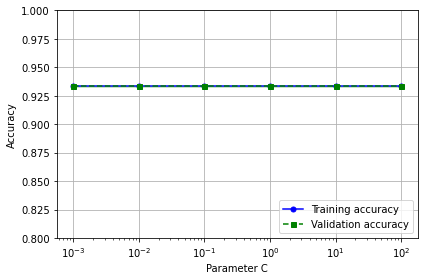

In [18]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(random_state=1))

param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__solver': ['lbfgs']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['saga']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['newton-cg']},
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['sag']},              
              {'logisticregression__C': param_range,
               'logisticregression__solver': ['liblinear']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9333142857142857
{'logisticregression__C': 1e-06, 'logisticregression__solver': 'liblinear'}


In [22]:
clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.933


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=5,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93309524 0.93338095 0.93371429 0.93357143 0.93261905]
CV accuracy: 0.933 +/- 0.000


In [ ]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

from numpy import interp



pca = PCA(n_components=8)
X_train2 = pca.fit_transform(X_train)

cv = list(StratifiedKFold(n_splits=5).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=5)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

In [ ]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

from numpy import interp



pca = PCA(n_components=8)
X_train2 = pca.fit_transform(X_train)

cv = list(StratifiedKFold(n_splits=5).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = gs.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = gs.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [14]:
#choose the columns which is the factor has been choosen by us
X_train = X_train.iloc[:,[1,2]]
X_test = X_test.iloc[:,[1,2]]

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
#read the test set file
df = pd.read_csv('cs-test.csv')
df.head()  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [18]:
#choose the columus which has been choosen as two factors from test set
pred = df.iloc[:,3:5]
prob = lr.predict_proba(pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [20]:
#output the result
output = pd.DataFrame({'Id': df.index,'Probability': prob[:,1]})
output.to_csv('final result.csv', index=False)